In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm
from scipy import stats
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import warnings
warnings.filterwarnings('ignore')
import math
from statistics import mean
from datetime import datetime, timedelta

# **Analisis de series temprales en la atención al público**

---
---
## **1. Buscar 3 (tres) series de tiempo y exponer la problemática de interés analítico (es importante detallar cuáles fueron los motivos de elección y situar al lector en el contexto adecuado).**

---


En el presente trabajo de analizaran cuatro (4) series temporales de una oficina de atención al público:

  a.	Mensajes de WhatsApp recibidos (WAPP).

  b.	Personas atendidas de manera presencial en la oficina (TP).

  c.	Trámites a distancia iniciados (TAD).

  d.	Planes de pagos confeccionados (PP).


In [2]:
# Lee el archivo Excel en un DataFrame de pandas
data = pd.read_excel("ST_ATENCION2.xlsx")
# Ahora puedes trabajar con los datos en el DataFrame
print(data.head())

       FECHA  WAPP  TP  TAD  PP
0 2022-03-15    19  78   53   9
1 2022-03-16    12  70   26  12
2 2022-03-17    14  66   41  14
3 2022-03-18    67  50   20   9
4 2022-03-21    45  65   44   8


In [3]:
data.dtypes

FECHA    datetime64[ns]
WAPP              int64
TP                int64
TAD               int64
PP                int64
dtype: object

In [4]:
data.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset
data.head()

WAPP  TP  TAD  PP
FECHA                        
2022-03-15    19  78   53   9
2022-03-16    12  70   26  12
2022-03-17    14  66   41  14
2022-03-18    67  50   20   9
2022-03-21    45  65   44   8

In [5]:
data.isna().sum()

WAPP    0
TP      0
TAD     0
PP      0
dtype: int64

---
---
## **2. Graficar las series originales. Analizar si es necesario diferenciarlas para convertirlas en estacionarias. Exponer los conceptos relacionados con la estacionariedad de la serie.**

---
### **Graficamos la serie temporal**

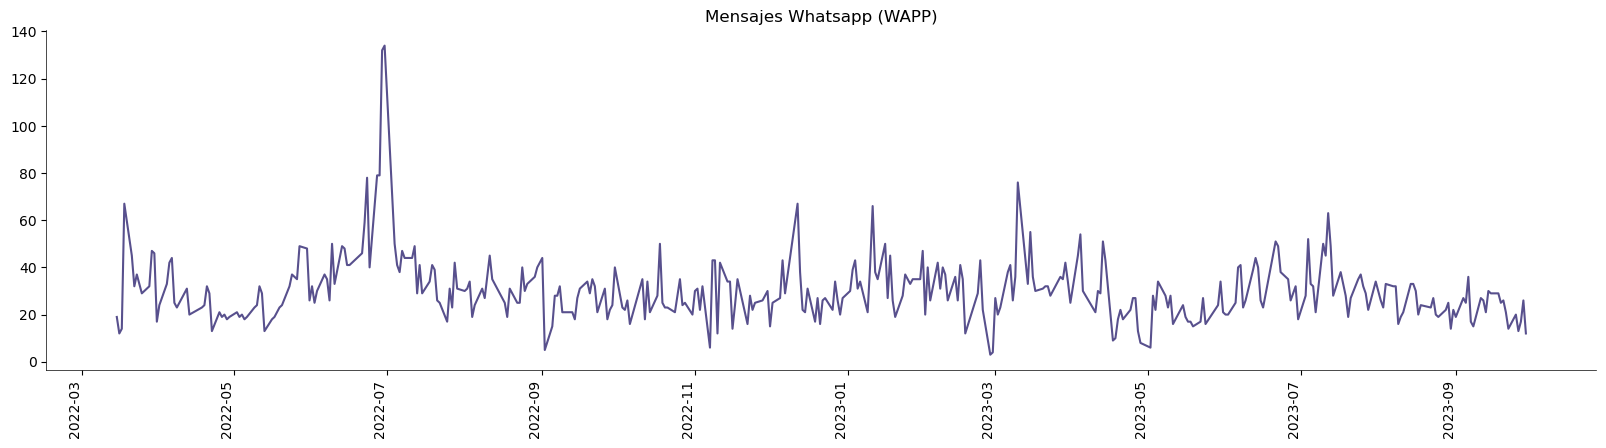

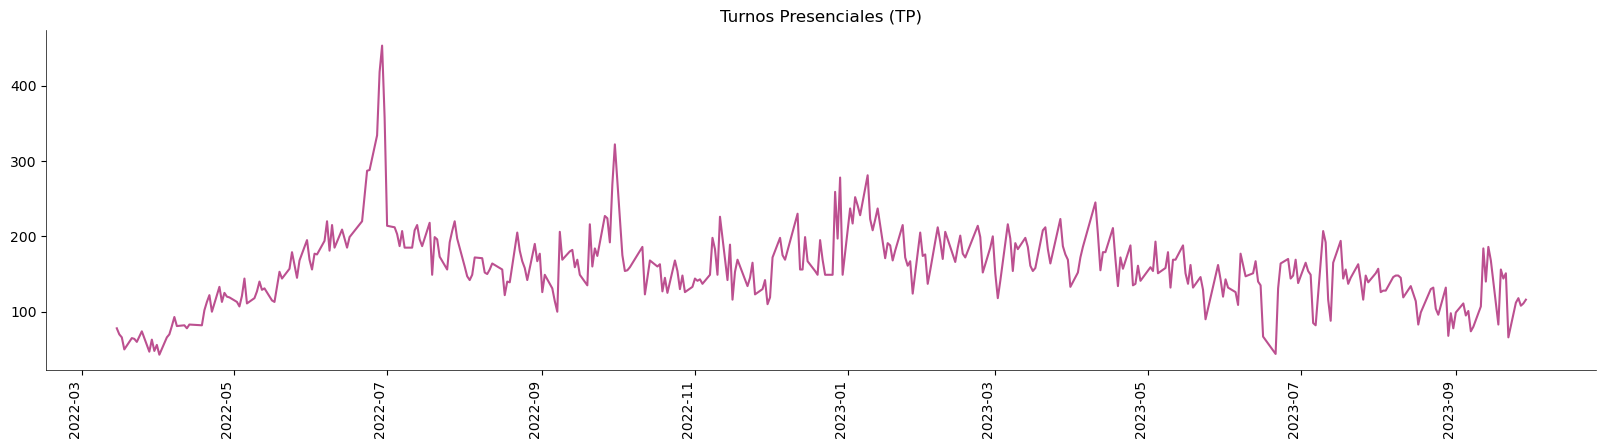

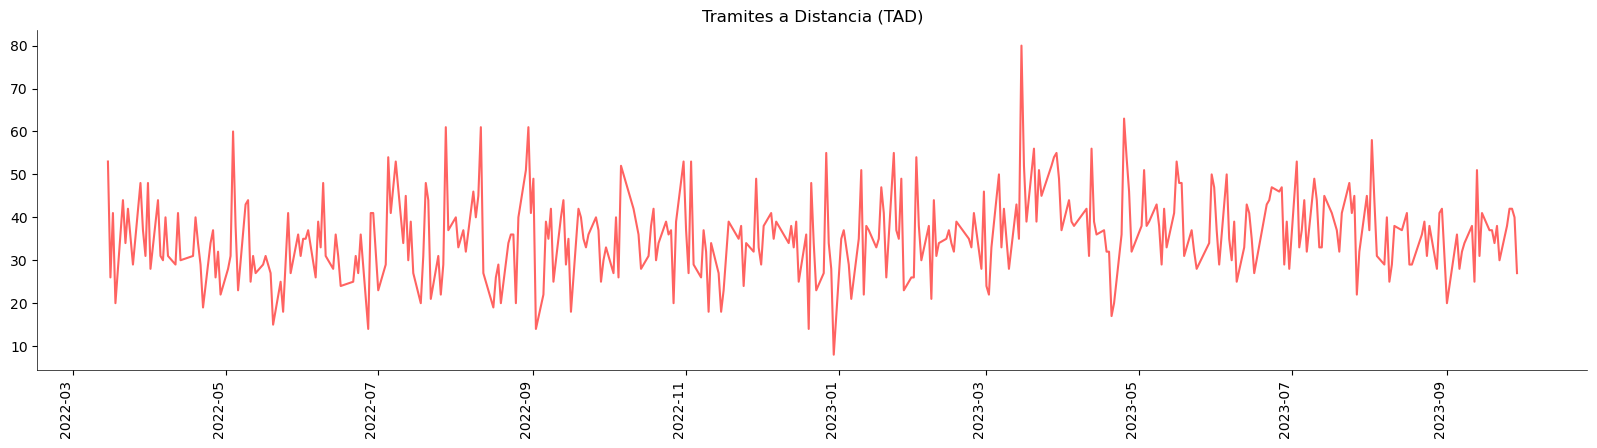

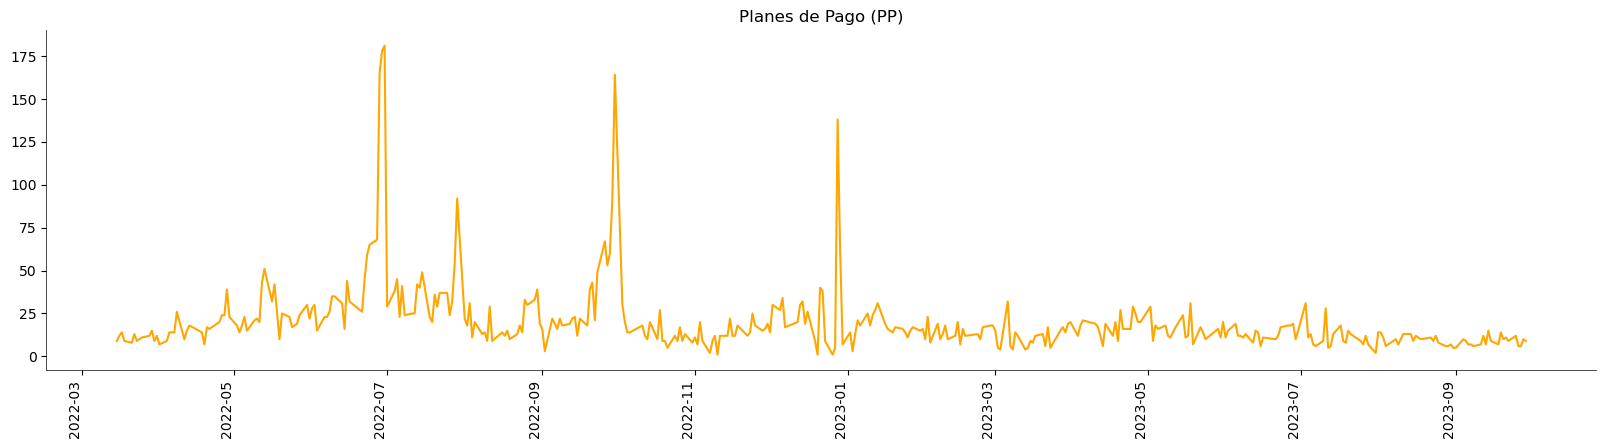

In [6]:
data.WAPP.plot(figsize=(20,5), title = "Mensajes Whatsapp (WAPP)", color='#58508d')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.TP.plot(figsize=(20,5), title = "Turnos Presenciales (TP)", color='#bc5090')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.TAD.plot(figsize=(20,5), title = "Tramites a Distancia (TAD)", color='#ff6361')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.PP.plot(figsize=(20,5), title = "Planes de Pago (PP)", color='#ffa600')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación**

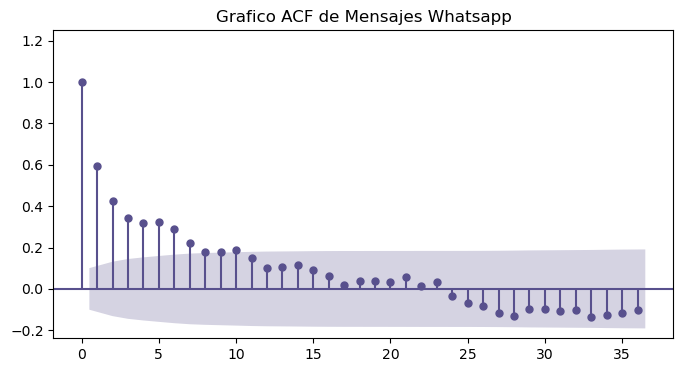

In [7]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_acf(data.WAPP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Mensajes Whatsapp", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

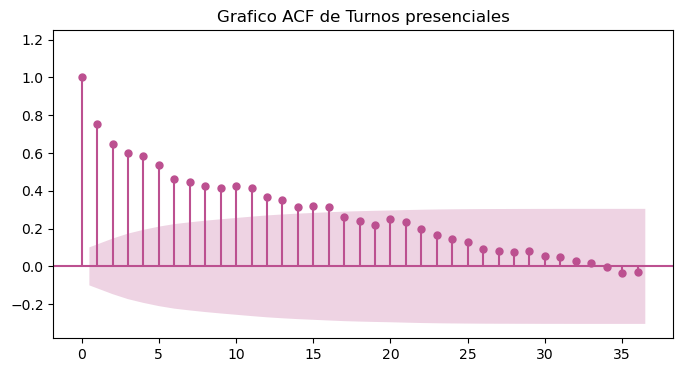

In [8]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_acf(data.TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Turnos presenciales", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

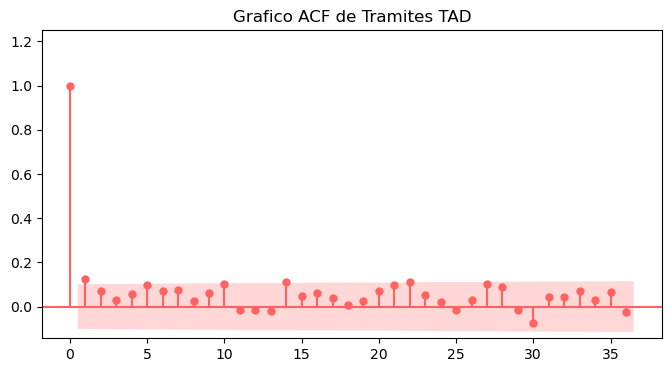

In [9]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_acf(data.TAD, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Tramites TAD", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

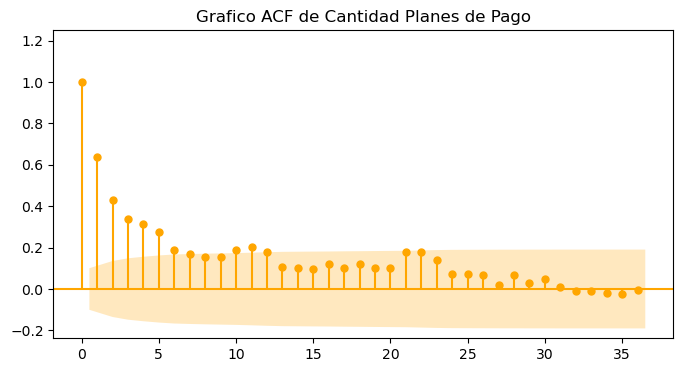

In [10]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_acf(data.PP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Cantidad Planes de Pago", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

---
### **Representación gráfica de la Función de Autocorrelación Parcial**

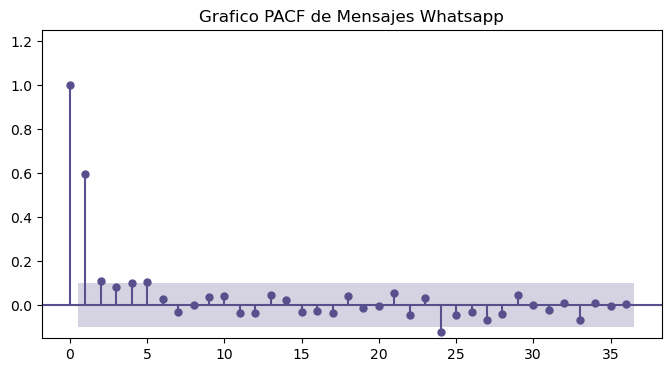

In [11]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_pacf(data.WAPP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Mensajes Whatsapp", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

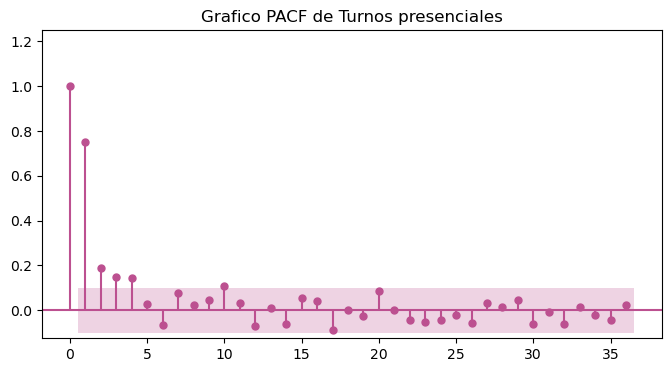

In [12]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_pacf(data.TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Turnos presenciales", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

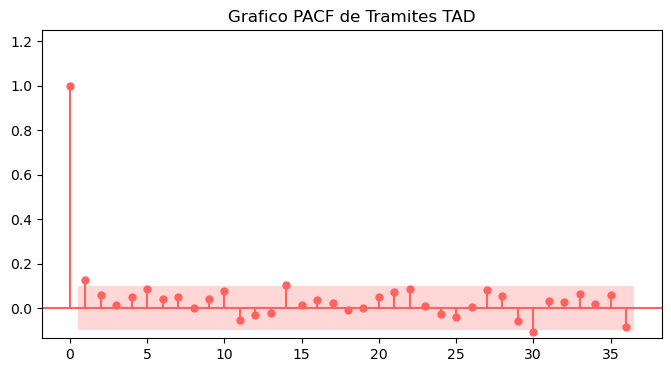

In [13]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_pacf(data.TAD, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Tramites TAD", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

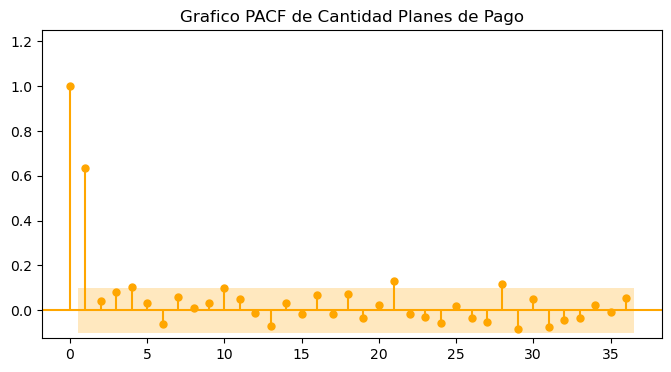

In [14]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_pacf(data.PP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Cantidad Planes de Pago", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

---
### **Representación gráfica de la Función de la Autocovarianza**

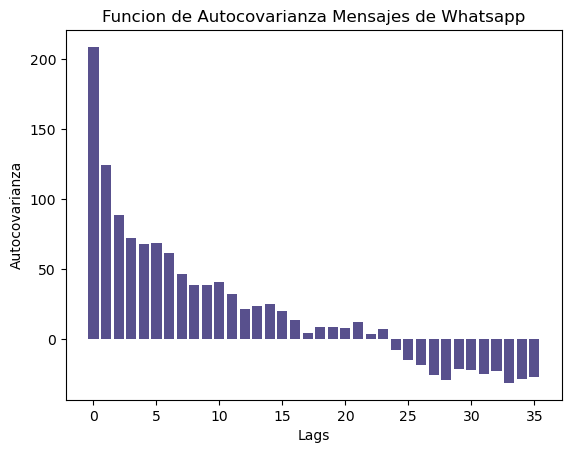

In [15]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.WAPP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(36)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#58508d")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Mensajes de Whatsapp')
plt.show()

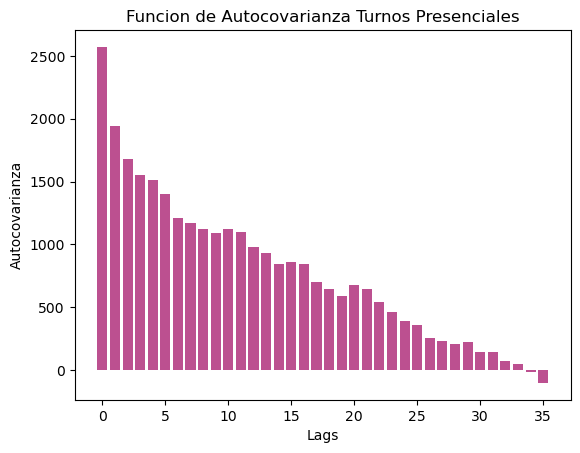

In [16]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.TP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(36)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#bc5090")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Turnos Presenciales')
plt.show()

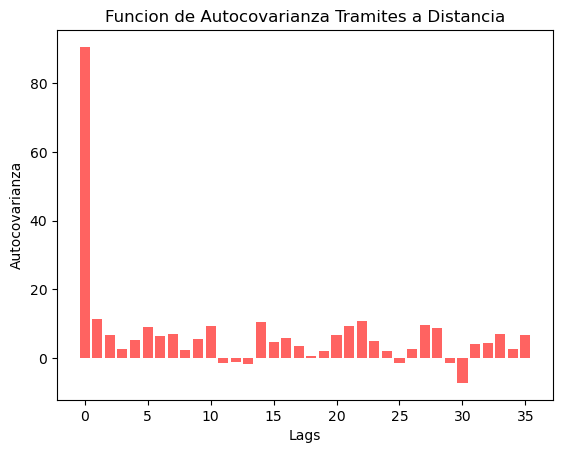

In [17]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.TAD

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(36)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#ff6361")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Tramites a Distancia')
plt.show()

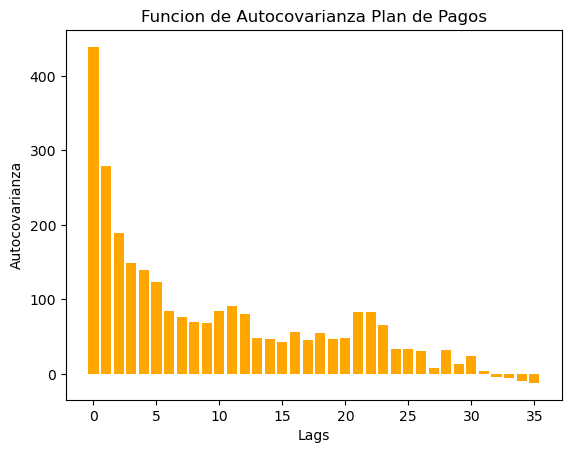

In [18]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.PP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(36)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#ffa600")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Plan de Pagos')
plt.show()

---
### **Descomposición aditiva**

Para visualizar y analizar las componentes de la serie de tiempo descompuesta, lo que puede ayudar a comprender la estructura de los datos y los patrones estacionales y de tendencia que pueden estar presentes. 

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

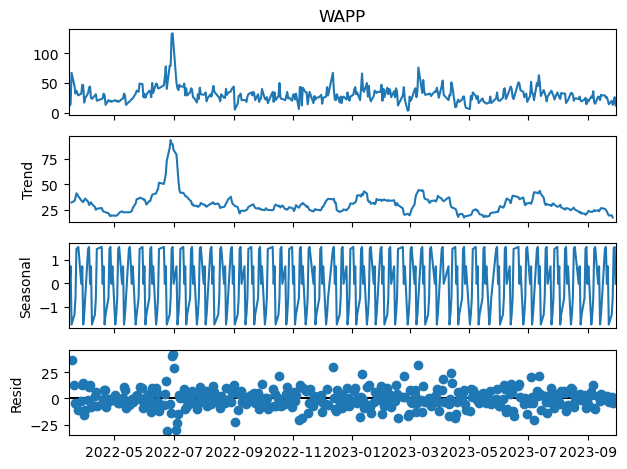

In [20]:
aditiveWP = seasonal_decompose(data.WAPP, model = "aditive", period=7)
aditiveWP.plot()

plt.show()

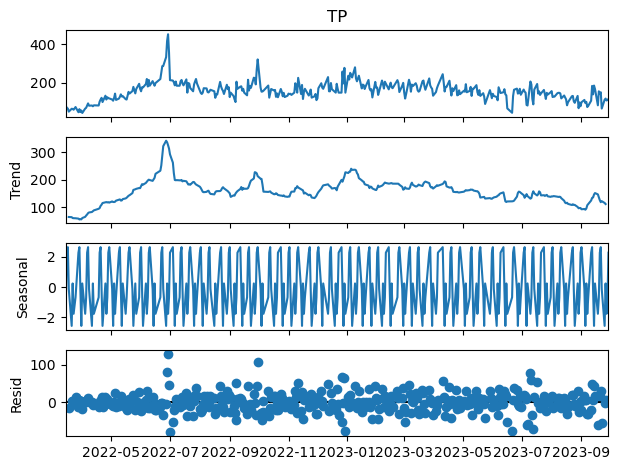

In [21]:
aditiveTP = seasonal_decompose(data.TP, model = "aditive", period=7)
aditiveTP.plot()
plt.show()

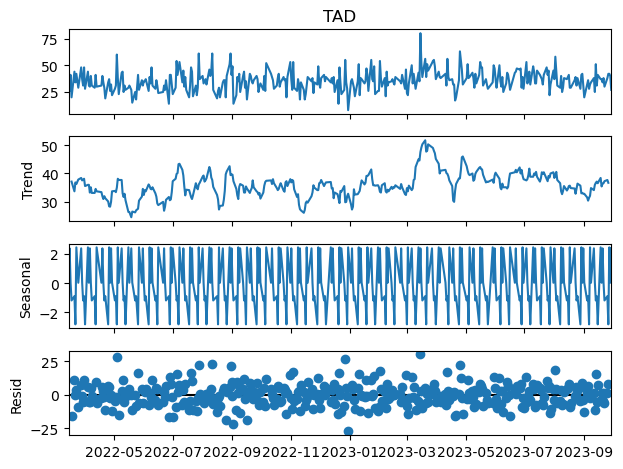

In [22]:
aditiveTAD = seasonal_decompose(data.TAD, model = "aditive", period=7)
aditiveTAD.plot()
plt.show()

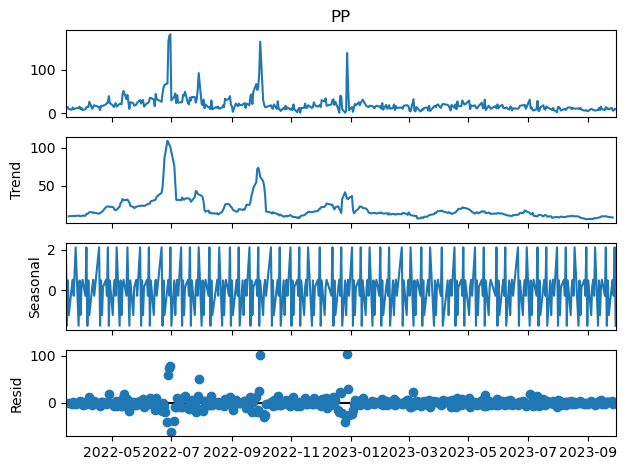

In [23]:
aditivePP = seasonal_decompose(data.PP, model = "aditive", period=7)
aditivePP.plot()
plt.show()

---
---
## **3. Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. Justificar con teoría.**

---
### **Representación gráfica de la Función de Autocorrelación**

In [24]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='MENSAJES DE WHATSAPP')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.delaxes(axes[0, 1])
  p1.delaxes(axes[1, 1])
  p1.delaxes(axes[2, 1]) 
  
  p1.legend()
  plt.show()

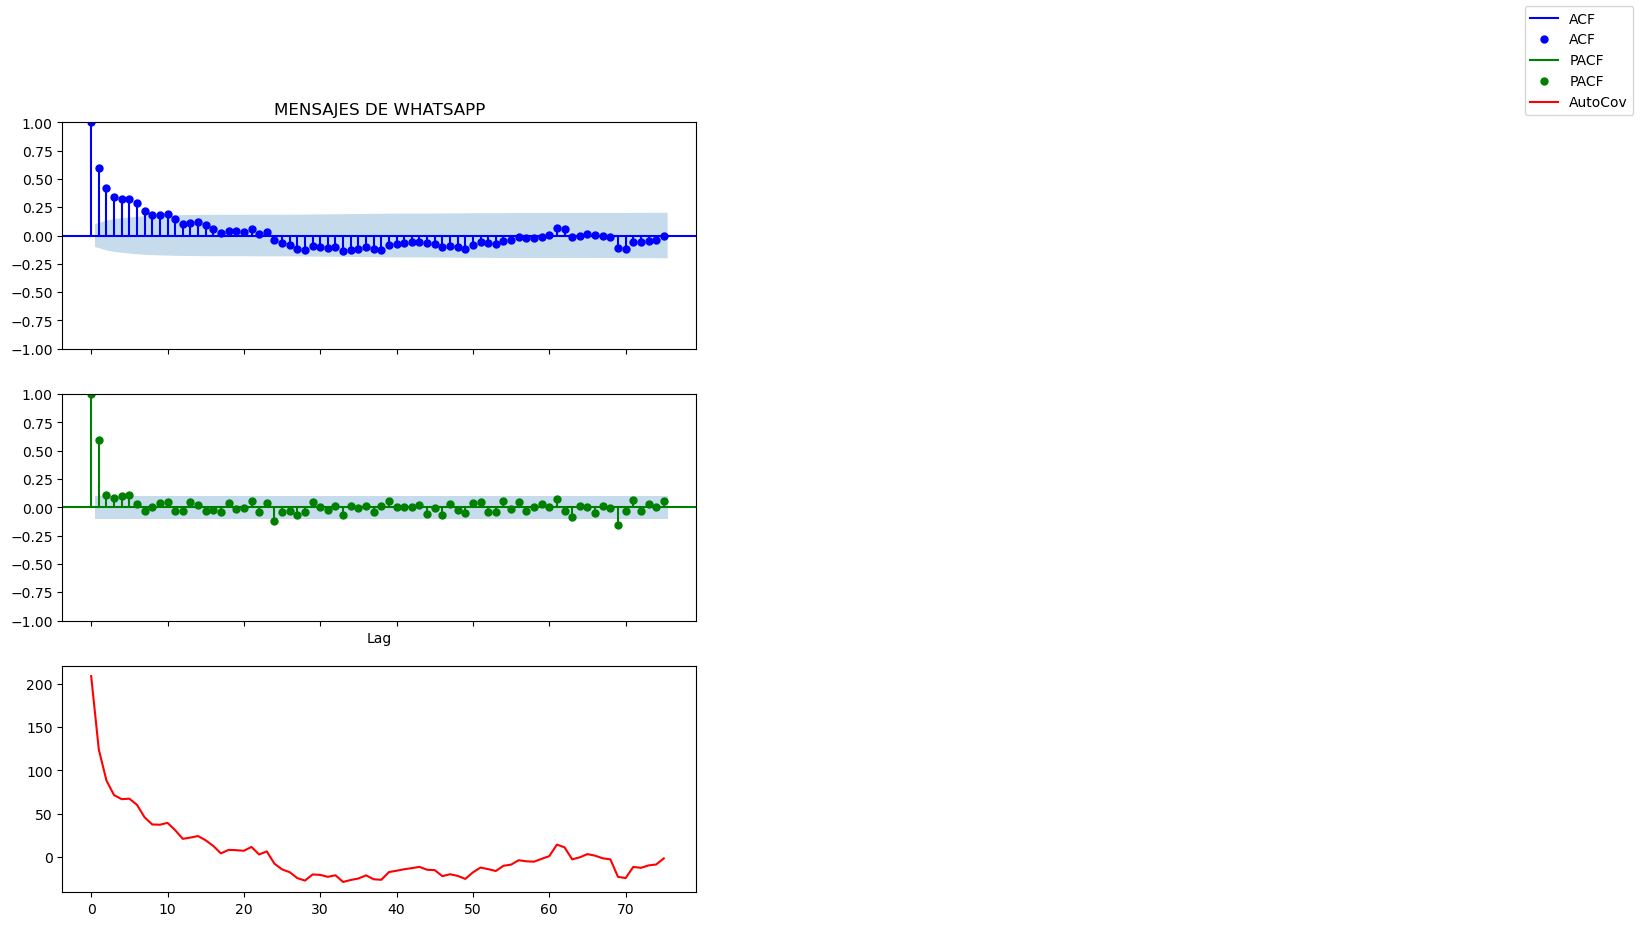

In [25]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.WAPP ,36)

In [26]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='TURNOS PRESENCIALES')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.delaxes(axes[0, 1])
  p1.delaxes(axes[1, 1])
  p1.delaxes(axes[2, 1]) 
  
  p1.legend()
  plt.show()

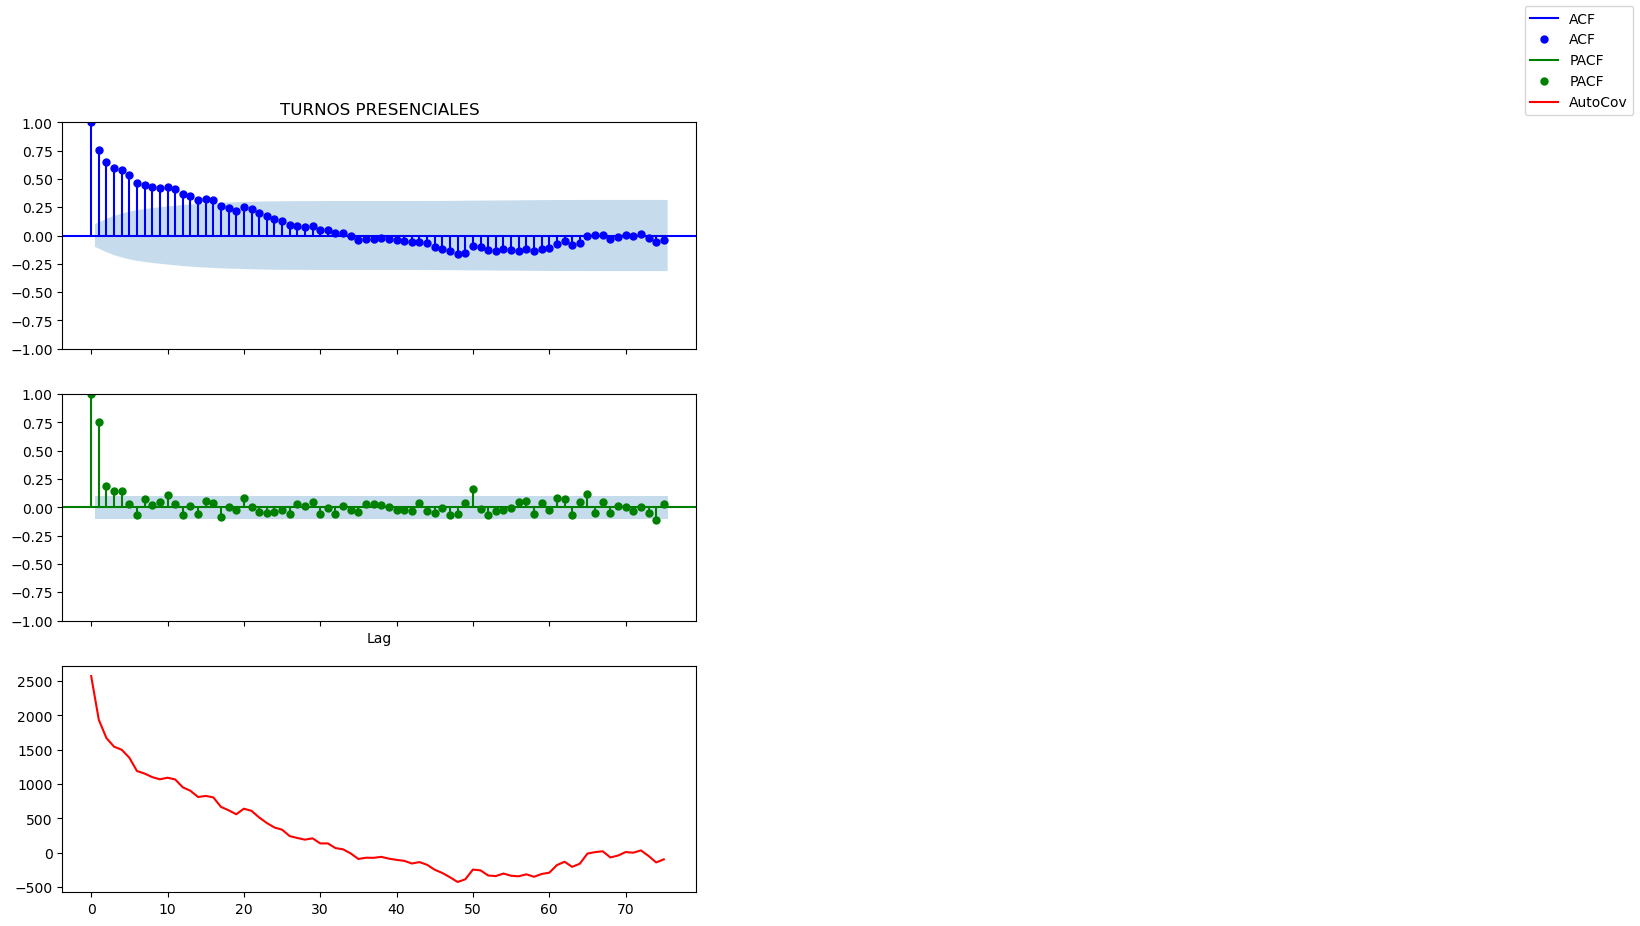

In [27]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.TP ,36)

In [28]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='TRAMITES A DISTANCIA')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.delaxes(axes[0, 1])
  p1.delaxes(axes[1, 1])
  p1.delaxes(axes[2, 1]) 
  
  p1.legend()
  plt.show()

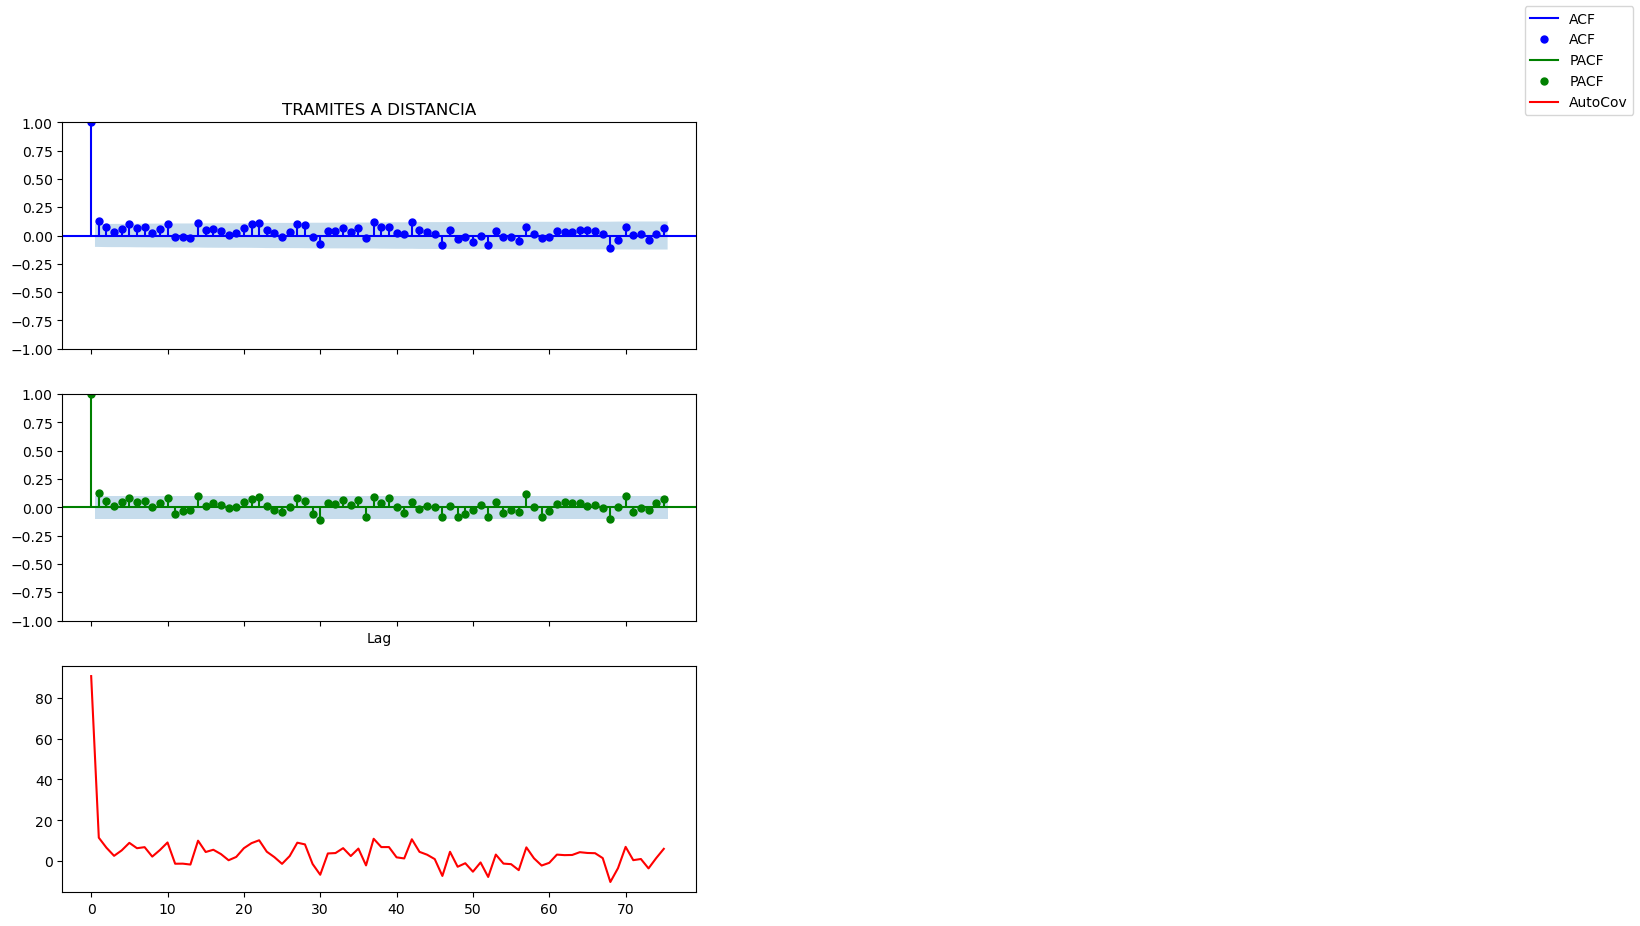

In [29]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.TAD ,36)

In [30]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='PLAN DE PAGOS')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.delaxes(axes[0, 1])
  p1.delaxes(axes[1, 1])
  p1.delaxes(axes[2, 1]) 
  
  p1.legend()
  plt.show()

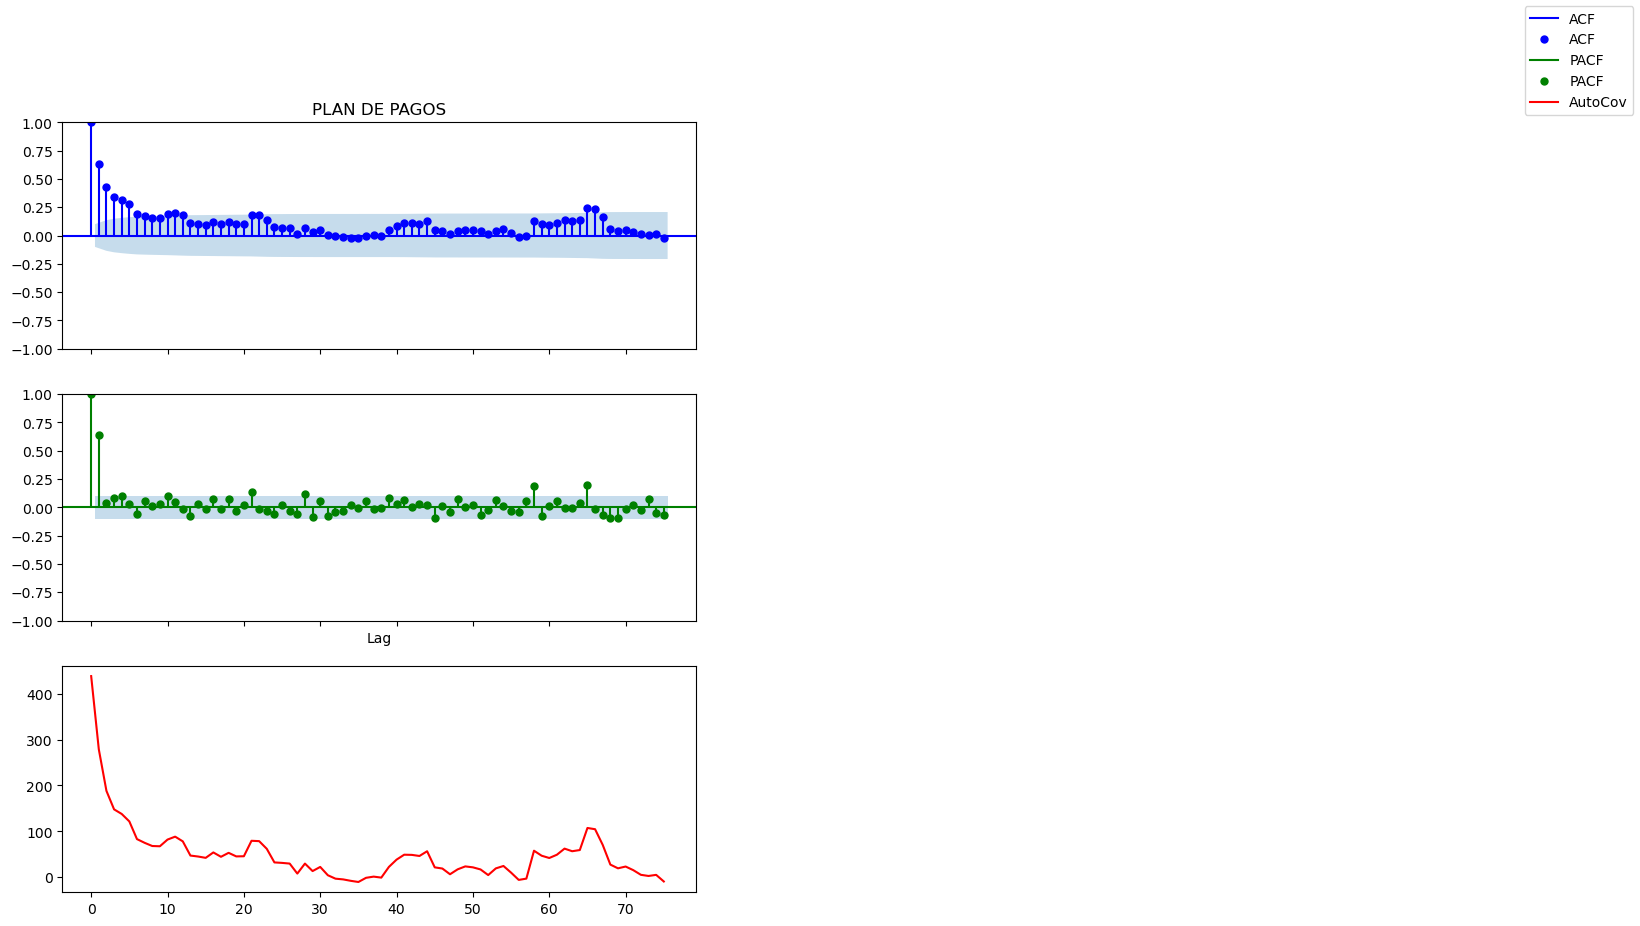

In [31]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.PP ,36)

---
---
## **4. Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias**

--- 
### **TEST de Dickey Fuller y Dickey Fuller Aumentado**

In [36]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.WAPP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.740535928304829,
 7.057244224841149e-05,
 4,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 2788.515168093619)

In [39]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.WAPP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.883945475189167,
 0.00033294838653415403,
 4,
 375,
 {'1%': -3.9831162986429627,
  '5%': -3.422262849758815,
  '10%': -3.1339732688355557},
 2788.8902354396946)

In [40]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.TP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.0569299632346985,
 0.0011400602877526264,
 3,
 376,
 {'1%': -3.4478619826418817,
  '5%': -2.869257669826291,
  '10%': -2.570881358363513},
 3549.28833475007)

In [42]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.TP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.142434044999484,
 0.00546004289009478,
 3,
 376,
 {'1%': -3.983050998155364,
  '5%': -3.4222313639905777,
  '10%': -3.133954779603869},
 3547.5415867306374)

In [48]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.TAD, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-17.138514061512453,
 7.07088646670841e-30,
 0,
 379,
 {'1%': -3.4477224095888497,
  '5%': -2.869196333125208,
  '10%': -2.5708486586002604},
 2656.1151525883392)

In [50]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.TAD, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-17.56046446442063,
 0.0,
 0,
 379,
 {'1%': -3.9828571817306773,
  '5%': -3.42213790916463,
  '10%': -3.1338998997509897},
 2649.3613062332806)

In [51]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.PP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-5.7023596551260685,
 7.624245950438387e-07,
 3,
 376,
 {'1%': -3.4478619826418817,
  '5%': -2.869257669826291,
  '10%': -2.570881358363513},
 3061.049576137924)

In [52]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.PP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-9.751820207913626,
 7.841814374851366e-15,
 0,
 379,
 {'1%': -3.9828571817306773,
  '5%': -3.42213790916463,
  '10%': -3.1338998997509897},
 3051.496575862138)

**RESUMEN TEST DICKEY FULLER:**
Son todas series estacionarias

----
### **TEST KPSS** 

In [57]:
from statsmodels.tsa.stattools import kpss

In [58]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [62]:
kpss_test(data.WAPP) #data1.WAPP es la variable

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.2857467127776876
p-valor: 0.1
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.06194459823169601
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************



In [67]:
kpss_test(data.TP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.34283708625831805
p-valor: 0.1
numero de lags: 11
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.3016045427970026
p-valor: 0.01
numero de lags: 11
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



In [71]:
kpss_test(data.TAD)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9102855351700507
p-valor: 0.01
numero de lags: 5
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.13246296656194806
p-valor: 0.07506858044083692
numero de lags: 3
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



In [73]:
kpss_test(data.PP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9943505796524705
p-valor: 0.01
numero de lags: 9
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.09069697916612782
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



---
### **TEST PHILLIP PERRON** para evaluar estacionariedad

In [74]:
from arch.unitroot import PhillipsPerron

In [75]:
def Phillips_Perron(series, **k):

    params = {'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [76]:
Phillips_Perron(data.WAPP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -11.458632429535527
p-valor: 5.6254904173483205e-21
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -11.56216225318882
p-valor: 2.0951928951102932e-18
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Se valida con el test Phillip Perron que la serie WHATSAPP es estacionaria, y no hay que diferenciar

In [77]:
Phillips_Perron(data.TP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -8.459128653141804
p-valor: 1.584819356930798e-13
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -8.44402186725307
p-valor: 6.747770571477203e-12
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el test Phillip Terron, la serie TURNOS PRESENCIALES es estacionaria y no hay que hacer una diferenciación

In [78]:
Phillips_Perron(data.TAD)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -18.17045337464311
p-valor: 2.447811262062377e-30
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -17.98073467352686
p-valor: 0.0
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el TEST Phillip Terron la serie TAD  es estacionaria y no hay que aplicar una diferenciación.


In [93]:
Phillips_Perron(data.PP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -10.264481589979667
p-valor: 4.153642772298283e-18
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -10.331323435070532
p-valor: 4.692785152690824e-16
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el TEST Phillip Perron la serie PLAN DE PAGOS  es estacionaria y no hay que aplicar una diferenciación

**RESUMEN TEST PHILLIP PERRON:**
Todas las series son estacionarias según este test.

---
##### **CUADRO RESUMEN TESTS DE ESTACIONARIEDAD**



In [108]:
import pandas as pd
datatest = [
    ["Dickey Fuller", "si", "si", "si", "si"],
    ["Dickey Fuller Aumentado", "si", "si", "si", "si"],
    ["KPSS c", "si", "si", "no", "no"],
    ["KPSS t", "si", "no", "si", "si"],    
    ["Phillip Perron c", "si", "si", "si", "si"],
    ["Phillip Perron ct", "si", "si", "si", "si"]
]

# Encabezados de las columnas
headers = ["Test", "wapp", "tp", "tad", "pp"]

# Crear un DataFrame
df = pd.DataFrame(datatest, columns=headers)

# Mostrar el DataFrame
print(df)


                      Test wapp  tp tad  pp
0            Dickey Fuller   si  si  si  si
1  Dickey Fuller Aumentado   si  si  si  si
2                   KPSS c   si  si  no  no
3                   KPSS t   si  no  si  si
4         Phillip Perron c   si  si  si  si
5        Phillip Perron ct   si  si  si  si


Considerando el test de Dickey-Fuller Aumentado podemos determinar que las series son estacionarias.

---
### **HACER DIFERENCIACION**

In [95]:
data.head()

WAPP  TP  TAD  PP
FECHA                        
2022-03-15    19  78   53   9
2022-03-16    12  70   26  12
2022-03-17    14  66   41  14
2022-03-18    67  50   20   9
2022-03-21    45  65   44   8

*WAPP*

In [96]:
# DIFERENCIACION DE LA VARIABLE WHATSAPP (WAPP)
data_diff_WAPP=data.WAPP.copy()
data_diff_WAPP=data_diff_WAPP.diff(periods = 1)
data_diff_WAPP.drop(['2022-03-15'], inplace=True)

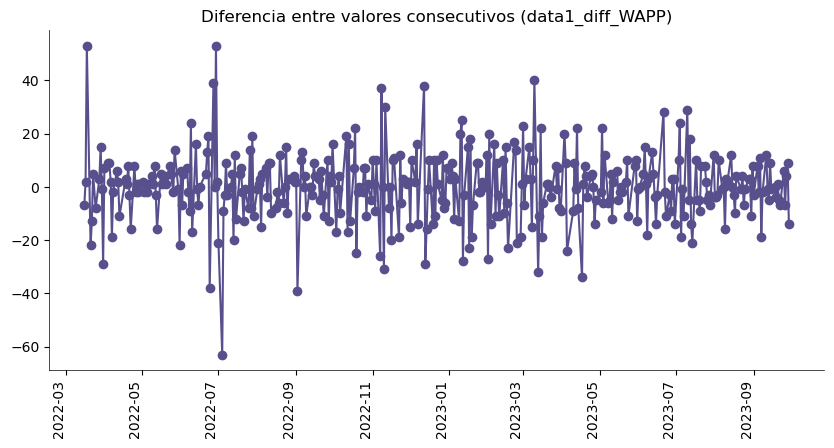

In [97]:
# Traza la Serie data1_diff_WAPP
data_diff_WAPP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#58508d')
# Etiquetas y título del gráfico
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_WAPP)')
# Muestra el gráfico
plt.show()

In [98]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_WAPP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-12.916732705106464,
 1.5071171349421608e-23,
 4,
 374,
 {'1%': -2.5717440049758356,
  '5%': -1.9417416419975033,
  '10%': -1.616128757626885},
 2798.8729176696143)

*TP*

In [99]:
# DIFERENCIACION DE LA VARIABLE TURNOS PRESENCIALES (TP)
data_diff_TP=data.TP.copy()
data_diff_TP=data_diff_TP.diff(periods = 1)
data_diff_TP.drop(['2022-03-15'], inplace=True)

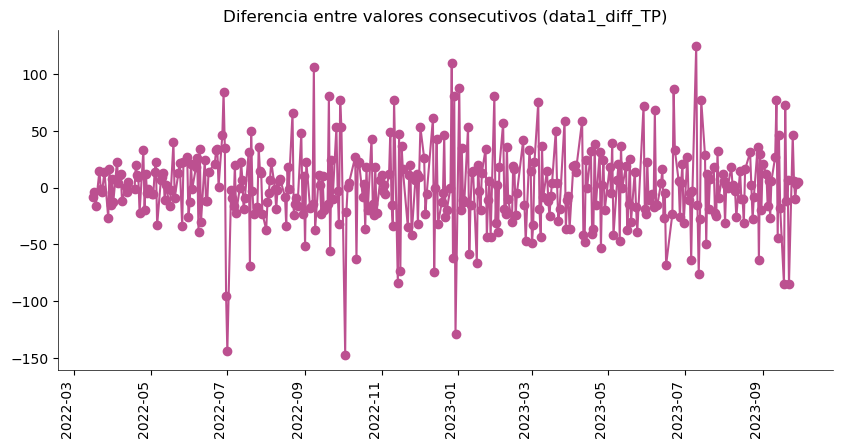

In [100]:
# Traza la Serie data1_diff_TP
data_diff_TP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#bc5090')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_TP)')
# Muestra el gráfico
plt.show()


In [101]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_TP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-9.73639427574136,
 3.817258854824125e-17,
 8,
 370,
 {'1%': -2.571809196493791,
  '5%': -1.9417499095216473,
  '10%': -1.6161214861113853},
 3548.505644951998)

*TAD*

In [102]:
# DIFERENCIACION DE LA VARIABLE TRÁMITES (TAD)
data_diff_TAD=data.TAD.copy()
data_diff_TAD=data_diff_TAD.diff(periods = 1)
data_diff_TAD.drop(['2022-03-15'], inplace=True)

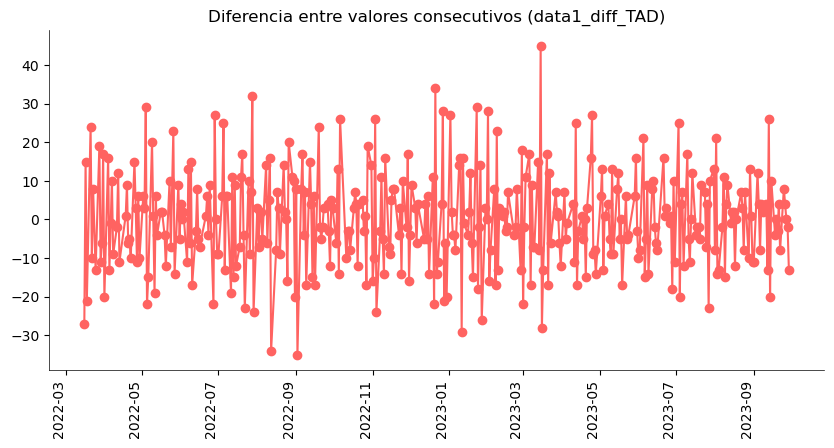

In [103]:
# Traza la Serie data1_diff_TAD
data_diff_TAD.plot(figsize=(10, 5), marker='o', linestyle='-', color='#ff6361')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_TAD)')
# Muestra el gráfico
plt.show()

In [104]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_TAD, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-8.801149383373286,
 4.873461286769415e-15,
 12,
 366,
 {'1%': -2.5718758192242226,
  '5%': -1.9417583631286157,
  '10%': -1.616114059985768},
 2670.1647448552244)

*PLAN DE PAGOS*

In [105]:
# DIFERENCIACION DE LA VARIABLE PLANES DE PAGO (PP)
data_diff_PP=data.PP.copy()
data_diff_PP=data_diff_PP.diff(periods = 1)
data_diff_PP.drop(['2022-03-15'], inplace=True)

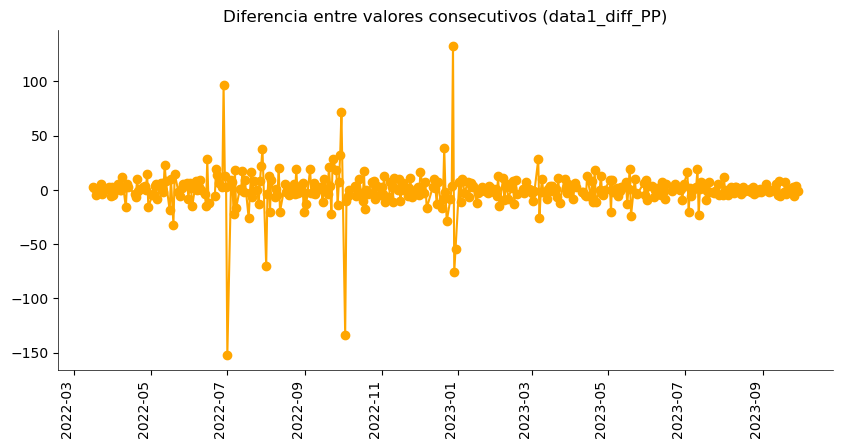

In [106]:
# Traza la Serie data1_diff_PP
data_diff_PP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#ffa600')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_PP)')
# Muestra el gráfico
plt.show()

In [107]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_PP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-9.73092962734764,
 3.92546247502348e-17,
 9,
 369,
 {'1%': -2.5718257161742346,
  '5%': -1.9417520052351545,
  '10%': -1.6161196442657781},
 3067.982374319884)

---
---
## **5. Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual y global de los parámetros del modelo).**

**DIFF WAPP**

In [109]:
auto_arima(data_diff_WAPP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3022.553, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2992.947, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2962.685, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3020.554, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2961.927, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2962.584, Time=0.09 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2964.477, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2940.636, Time=0.07 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2942.310, Time=0.13 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2942.326, Time=0.16 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=2944.284, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2991.729, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2942.619, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=2942.618, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1466.338
Date:                Mon, 13 Nov 2023   AIC                           2938.676
Time:                        07:37:36   BIC                           2950.488
Sample:                             0   HQIC                          2943.364
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4094      0.052      7.935      0.000       0.308       0.510
ma.L1         -0.8714      0.023    -38.094      0.000      -0.916      -0.827
sigma2       134.0392      5.538     24.205      0.000     123.185     144.893
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               391.26
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
modelo_sarima_WAPP = SARIMAX(data_diff_WAPP, order=(1,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_WAPP = modelo_sarima_WAPP.fit()
print(modelo_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1466.338
Date:                Mon, 13 Nov 2023   AIC                           2938.676
Time:                        07:37:42   BIC                           2950.488
Sample:                             0   HQIC                          2943.364
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4094      0.052      7.935      0.000       0.308       0.510
ma.L1         -0.8714      0.023    -38.094      0.000      -0.916      -0.827
sigma2       134.0392      5.538     24.205      0.0

**DIFF TP**

In [111]:
auto_arima(data_diff_TP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3783.506, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3752.239, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3723.049, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3781.509, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=3723.451, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=3723.487, Time=0.30 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=3723.394, Time=0.13 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=3724.293, Time=0.39 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=3785.424, Time=0.03 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=3711.955, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=3710.268, Time=0.10 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=3712.011, Time=0.18 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1851.171
Date:                Mon, 13 Nov 2023   AIC                           3708.342
Time:                        07:37:50   BIC                           3720.154
Sample:                             0   HQIC                          3713.030
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3774      0.056      6.728      0.000       0.267       0.487
ma.L1         -0.8179      0.030    -27.593      0.000      -0.876      -0.760
sigma2      1021.9381     54.378     18.793      0.000     915.359    1128.517
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                61.87
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.38
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
modelo_sarima_TP = SARIMAX(data_diff_TP, order=(1,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_TP = modelo_sarima_TP.fit()
print(modelo_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1851.171
Date:                Mon, 13 Nov 2023   AIC                           3708.342
Time:                        07:38:27   BIC                           3720.154
Sample:                             0   HQIC                          3713.030
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3774      0.056      6.728      0.000       0.267       0.487
ma.L1         -0.8179      0.030    -27.593      0.000      -0.876      -0.760
sigma2      1021.9381     54.378     18.793      0.0

**DIFF TAD**

In [114]:
auto_arima(data_diff_TAD, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2997.127, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2908.685, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2785.271, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2995.138, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2783.401, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2785.254, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2783.765, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2783.426, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2783.506, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2906.721, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=2785.378, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=2781.427, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[7]             : AIC=2783.285, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=2783.302, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[7]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1388.714
Date:                Mon, 13 Nov 2023   AIC                           2781.427
Time:                        07:39:46   BIC                           2789.302
Sample:                             0   HQIC                          2784.552
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9559      0.016    -59.466      0.000      -0.987      -0.924
sigma2        88.5845      5.034     17.599      0.000      78.719      98.450
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):                41.93
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.50
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
modelo_sarima_TAD = SARIMAX(data_diff_TAD, order=(0,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_TAD = modelo_sarima_TAD.fit()
print(modelo_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  379
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1388.714
Date:                Mon, 13 Nov 2023   AIC                           2781.427
Time:                        07:39:50   BIC                           2789.302
Sample:                             0   HQIC                          2784.552
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9559      0.016    -59.466      0.000      -0.987      -0.924
sigma2        88.5845      5.034     17.599      0.000      78.719      98.450
Ljung-Box (L1) (Q):                   2.02   Jarque-

**DIFF PP**

In [116]:
auto_arima(data_diff_PP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3265.837, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3251.428, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3232.818, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3263.837, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=3232.725, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=3232.975, Time=0.09 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=3234.757, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=3205.548, Time=0.06 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=3205.973, Time=0.13 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=3205.912, Time=0.20 sec
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=3207.907, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[7] intercept   : AIC=3197.327, Time=0.10 sec
 ARIMA(0,0,3)(1,0,0)[7] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1591.707
Date:                Mon, 13 Nov 2023   AIC                           3189.414
Time:                        07:40:01   BIC                           3201.227
Sample:                             0   HQIC                          3194.102
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.031     18.364      0.000       0.508       0.629
ma.L1         -0.9659      0.016    -59.907      0.000      -0.998      -0.934
sigma2       259.2176      5.251     49.365      0.000     248.926     269.509
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9745.29
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
modelo_sarima_PP = SARIMAX(data_diff_PP, order=(1,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_PP = modelo_sarima_PP.fit()
print(modelo_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1591.707
Date:                Mon, 13 Nov 2023   AIC                           3189.414
Time:                        07:40:05   BIC                           3201.227
Sample:                             0   HQIC                          3194.102
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.031     18.364      0.000       0.508       0.629
ma.L1         -0.9659      0.016    -59.907      0.000      -0.998      -0.934
sigma2       259.2176      5.251     49.365      0.0

**WHATSAPP (WAPP)**

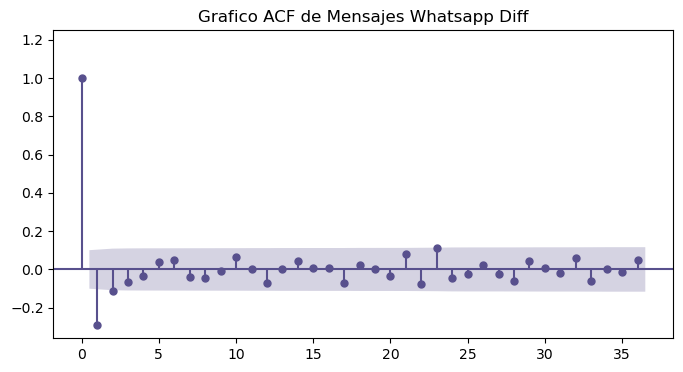

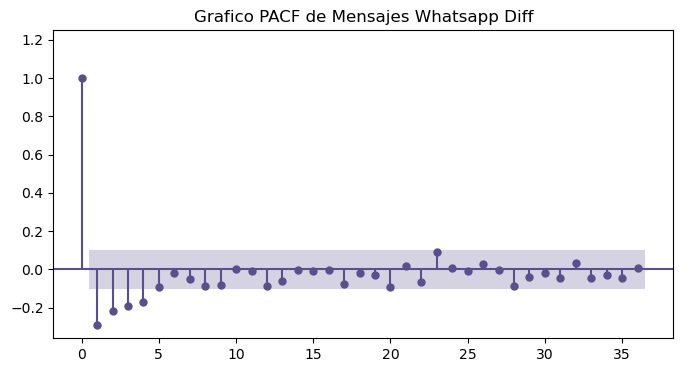

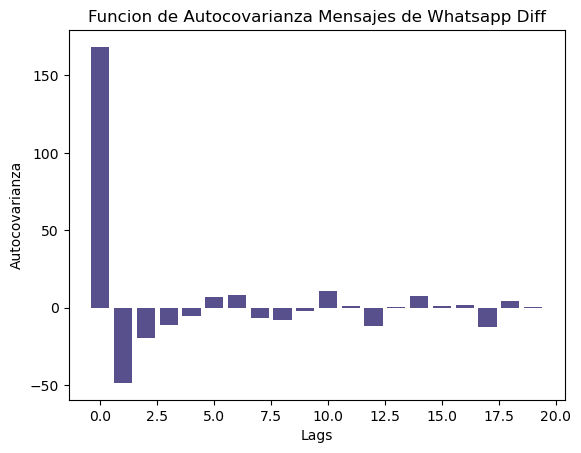

In [118]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_acf(data_diff_WAPP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Mensajes Whatsapp Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_pacf(data_diff_WAPP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Mensajes Whatsapp Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_diff_WAPP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#58508d")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Mensajes de Whatsapp Diff')
plt.show()


**TURNOS PRESENCIALES (TP)**

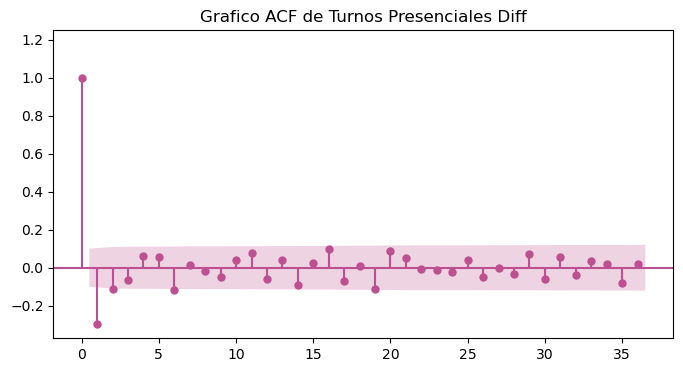

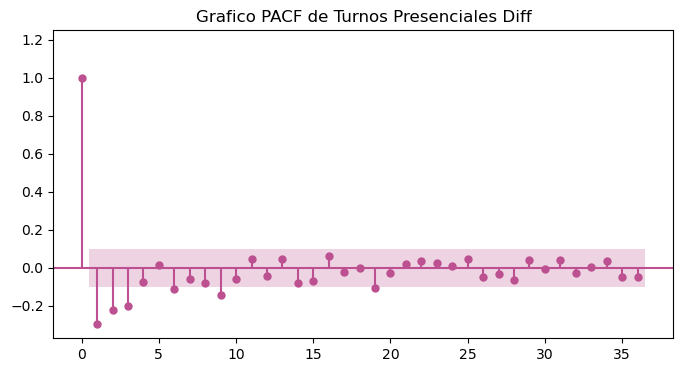

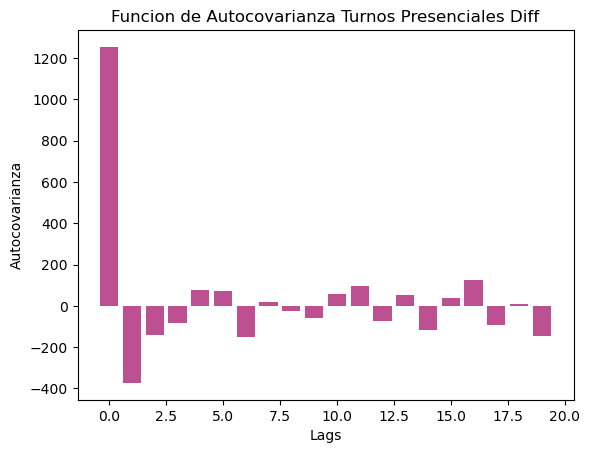

In [119]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_acf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Turnos Presenciales Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_pacf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Turnos Presenciales Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)


plt.show()

def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_diff_TP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#bc5090")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Turnos Presenciales Diff')
plt.show()



**TRAMITES A DISTANCIA (TAD)**

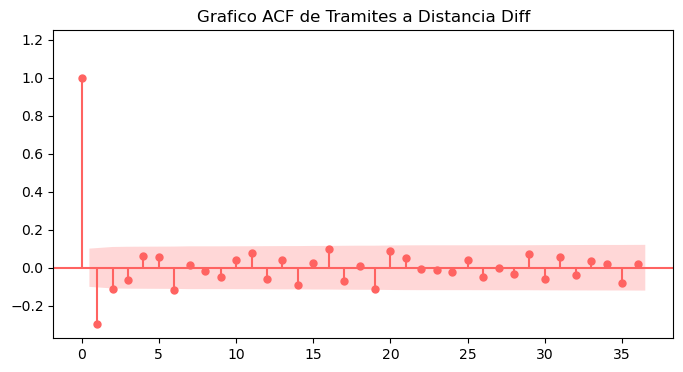

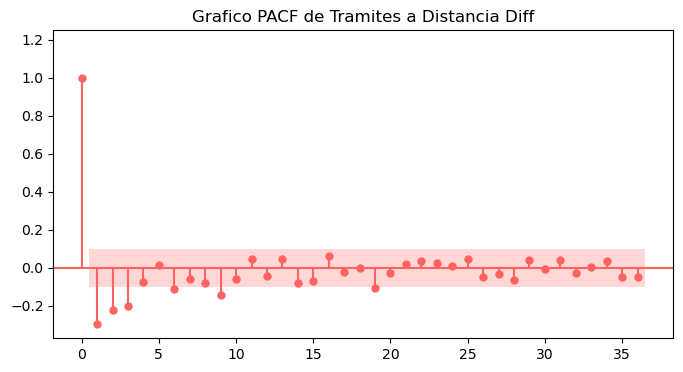

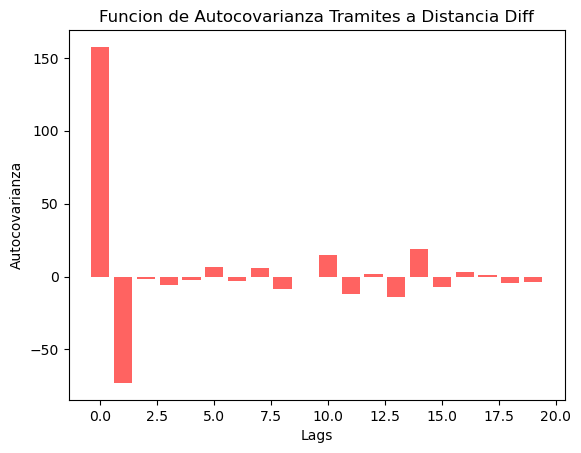

In [120]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_acf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Tramites a Distancia Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_pacf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Tramites a Distancia Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_diff_TAD

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#ff6361")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Tramites a Distancia Diff')
plt.show()


**PLAN DE PAGOS (PP)**

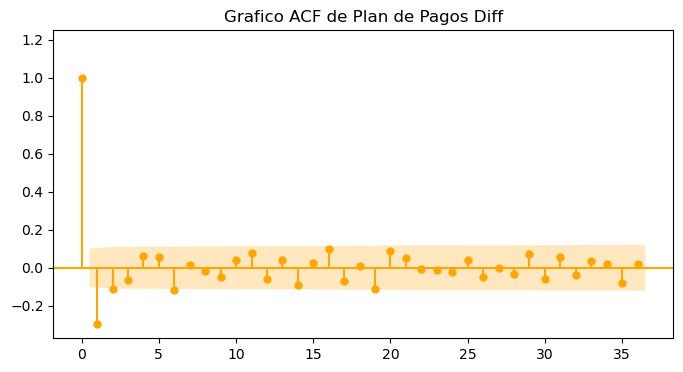

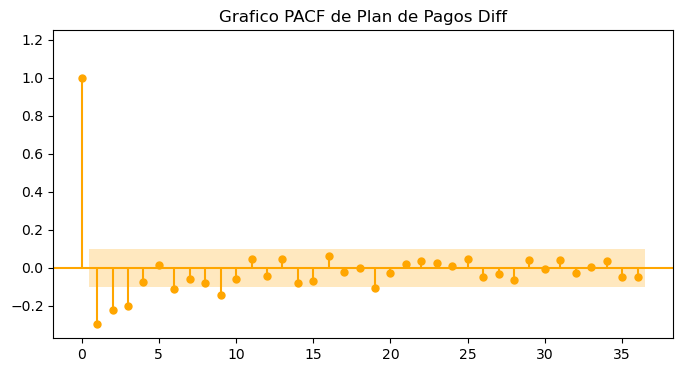

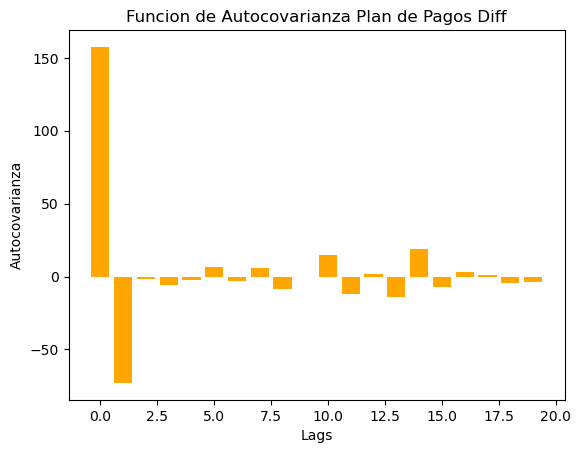

In [121]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_acf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Plan de Pagos Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_pacf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Plan de Pagos Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_diff_TAD

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#ffa600")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Plan de Pagos Diff')
plt.show()

---
## **6. Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.**

**WHATSAPP**

In [122]:
# Seleccionamos el primer 75% para train
train_WAPP = data_diff_WAPP.iloc[:round(len(data_diff_WAPP)*.75)]
# Seleccionamos el 25% restante para test
test_WAPP = data_diff_WAPP.iloc[round(len(data_diff_WAPP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_WAPP, test_WAPP)

FECHA
2022-03-16    -7.0
2022-03-17     2.0
2022-03-18    53.0
2022-03-21   -22.0
2022-03-22   -13.0
              ... 
2023-05-08    -6.0
2023-05-09    -5.0
2023-05-10     5.0
2023-05-11   -12.0
2023-05-12     2.0
Name: WAPP, Length: 284, dtype: float64 FECHA
2023-05-15     6.0
2023-05-16    -5.0
2023-05-17    -2.0
2023-05-18     0.0
2023-05-19    -2.0
              ... 
2023-09-25     6.0
2023-09-26    -7.0
2023-09-27     4.0
2023-09-28     9.0
2023-09-29   -14.0
Name: WAPP, Length: 95, dtype: float64


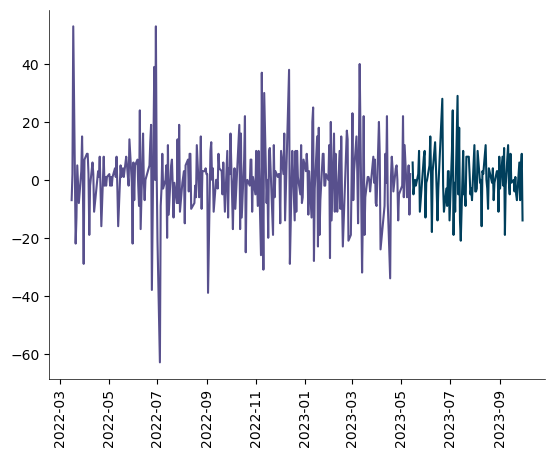

In [123]:
plt.plot(train_WAPP, color="#58508d")
plt.plot(test_WAPP, color="#003f5c")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

In [124]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_WAPP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2306.528, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2284.329, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2264.579, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2304.528, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2262.730, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2264.579, Time=0.09 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2266.579, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2248.614, Time=0.06 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2250.604, Time=0.11 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2250.604, Time=0.15 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=2251.942, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2282.329, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2250.220, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1118.085
Date:                Mon, 13 Nov 2023   AIC                           2248.171
Time:                        07:41:20   BIC                           2270.065
Sample:                             0   HQIC                          2256.948
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0010      0.005     -0.199      0.842      -0.011       0.009
ar.L1          1.2870      0.218      5.896      0.000       0.859       1.715
ar.L2         -0.3324      0.134     -2.488      0.013      -0.594      -0.071
ma.L1         -1.7617      0.217     -8.111      0.000      -2.187      -1.336
ma.L2          0.7656      0.203      3.780      0.000       0.369       1.162
sigma2       152.9426      8.323     18.377      0.000     136.631     169.254
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               291.88
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.97
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
modelo_sarima_WAPP = SARIMAX(train_WAPP, order=(2,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP = modelo_sarima_WAPP.fit()
print(result_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1117.160
Date:                Mon, 13 Nov 2023   AIC                           2244.320
Time:                        07:41:27   BIC                           2262.565
Sample:                             0   HQIC                          2251.635
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2315      0.219      5.630      0.000       0.803       1.660
ar.L2         -0.2963      0.145     -2.050      0.040      -0.580      -0.013
ma.L1         -1.7256      1.798     -0.960      0.3

In [126]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [127]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP = result_sarima_WAPP.get_forecast(len(test_WAPP))

In [128]:
predicciones_WAPP = result_sarima_WAPP.get_forecast(95)

In [129]:
WAPP_pred = predicciones_sarima_WAPP.predicted_mean
WAPP_int = predicciones_sarima_WAPP.conf_int()

In [130]:
WAPP_pred.index = test_WAPP.index
WAPP_int.index = test_WAPP.index

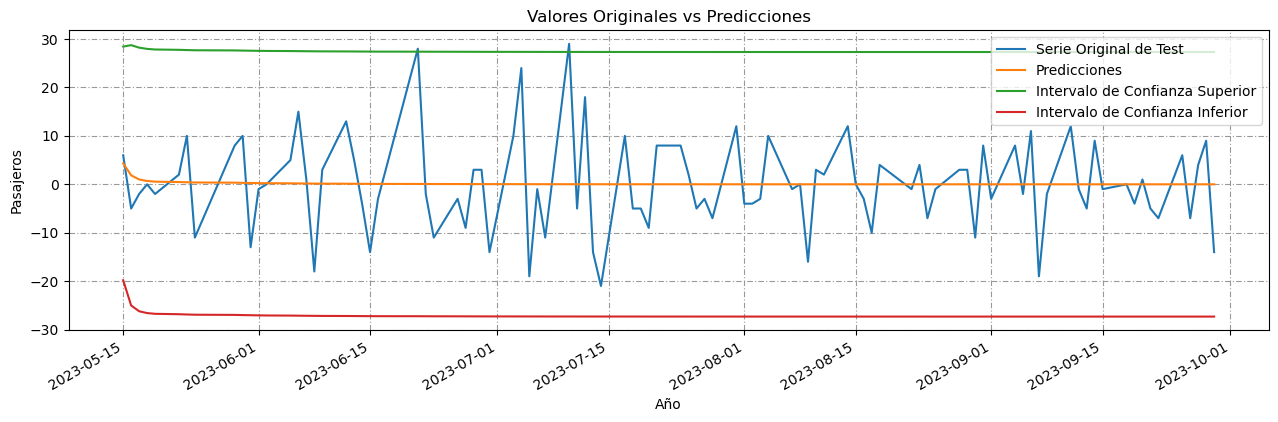

In [131]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_WAPP, WAPP_pred, WAPP_int)

In [132]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [133]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP.predicted_mean)

MSE: 90.9091341701535
MAE: 7.252796302846387
RMSE: 9.534628161084914
MAPE: nan


**TURNOS PRESENCIALES**

In [134]:
# Seleccionamos el primer 75% para train
train_TP = data_diff_TP.iloc[:round(len(data_diff_TP)*.75)]
# Seleccionamos el 25% restante para test
test_TP = data_diff_TP.iloc[round(len(data_diff_TP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_TP, test_TP)

FECHA
2022-03-16    -8.0
2022-03-17    -4.0
2022-03-18   -16.0
2022-03-21    15.0
2022-03-22    -1.0
              ... 
2023-05-08     7.0
2023-05-09    21.0
2023-05-10   -47.0
2023-05-11    37.0
2023-05-12     0.0
Name: TP, Length: 284, dtype: float64 FECHA
2023-05-15    19.0
2023-05-16   -37.0
2023-05-17   -14.0
2023-05-18    25.0
2023-05-19   -30.0
              ... 
2023-09-25    46.0
2023-09-26     6.0
2023-09-27   -10.0
2023-09-28     3.0
2023-09-29     5.0
Name: TP, Length: 95, dtype: float64


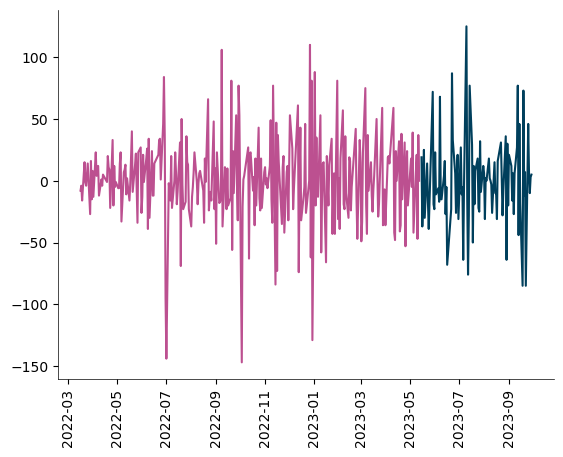

In [135]:
plt.plot(train_TP, color="#bc5090")
plt.plot(test_TP, color="#003f5c")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

In [136]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_TP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2834.211, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2807.119, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2791.746, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2832.234, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2791.950, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2793.491, Time=0.23 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=2793.155, Time=0.26 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2791.992, Time=0.13 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=2794.755, Time=0.32 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=2836.079, Time=0.03 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2788.238, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2787.364, Time=0.08 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2788.412, Time=0.15 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1389.810
Date:                Mon, 13 Nov 2023   AIC                           2785.621
Time:                        07:42:26   BIC                           2796.568
Sample:                             0   HQIC                          2790.010
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1596     63.114     16.496      0.000     917.458    1164.861
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                53.67
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.27
Prob(H) (two-sided):                  0.72   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
modelo_sarima_TP = SARIMAX(train_TP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP = modelo_sarima_TP.fit()
print(result_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1389.810
Date:                Mon, 13 Nov 2023   AIC                           2785.621
Time:                        07:44:18   BIC                           2796.568
Sample:                             0   HQIC                          2790.010
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1596     63.114     16.496      0.0

In [138]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [139]:
# Utilizando el modelo realizamos la prediccion correspondiente
predicciones_sarima_TP = result_sarima_TP.get_forecast(len(test_TP))

In [140]:
predicciones_TP = result_sarima_TP.get_forecast(95)

In [141]:
TP_pred = predicciones_sarima_TP.predicted_mean
TP_int = predicciones_sarima_TP.conf_int()

In [142]:
TP_pred.index = test_TP.index
TP_int.index = test_TP.index

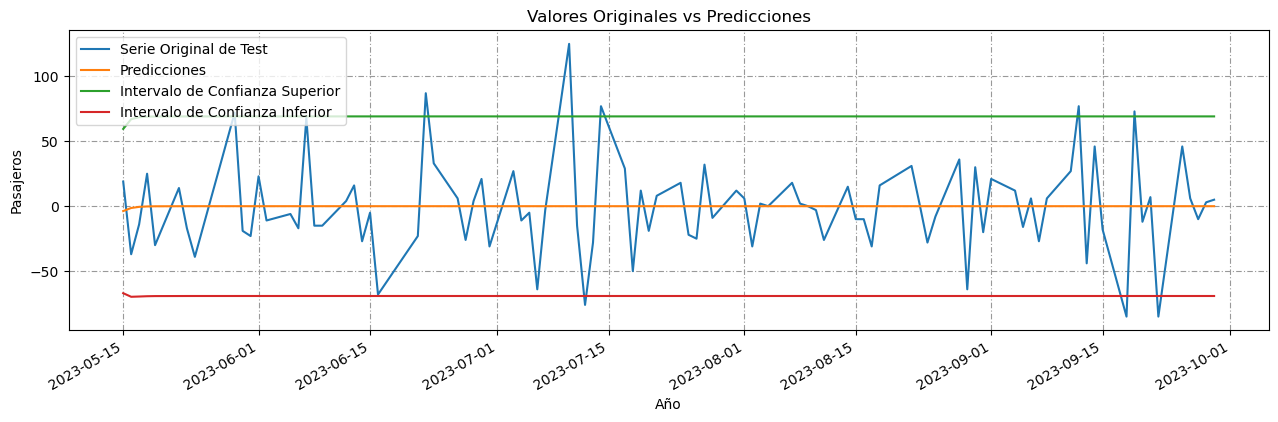

In [143]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TP, TP_pred, TP_int)

In [144]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [145]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP.predicted_mean)

MSE: 1280.0073172953826
MAE: 26.36829489392876
RMSE: 35.77718990216228
MAPE: nan


**TRÁMITES A DISTANCIA**

In [146]:
# Seleccionamos el primer 75% para train
train_TAD = data_diff_TAD.iloc[:round(len(data_diff_TAD)*.75)]
# Seleccionamos el 25% restante para test
test_TAD = data_diff_TAD.iloc[round(len(data_diff_TAD)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_TAD, test_TAD)

FECHA
2022-03-16   -27.0
2022-03-17    15.0
2022-03-18   -21.0
2022-03-21    24.0
2022-03-22   -10.0
              ... 
2023-05-08     4.0
2023-05-09    -5.0
2023-05-10    -9.0
2023-05-11    13.0
2023-05-12    -9.0
Name: TAD, Length: 284, dtype: float64 FECHA
2023-05-15     8.0
2023-05-16    12.0
2023-05-17    -5.0
2023-05-18     0.0
2023-05-19   -17.0
              ... 
2023-09-25     8.0
2023-09-26     4.0
2023-09-27     0.0
2023-09-28    -2.0
2023-09-29   -13.0
Name: TAD, Length: 95, dtype: float64


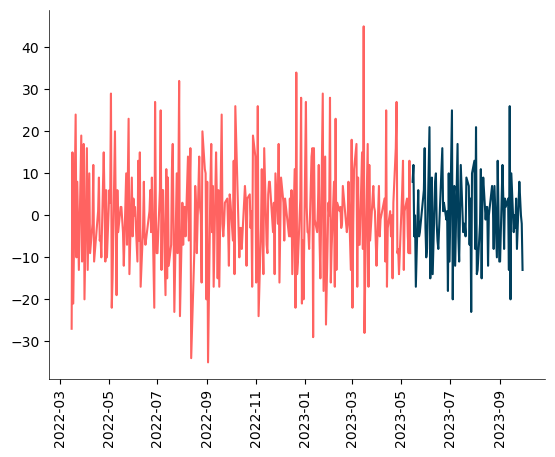

In [147]:
plt.plot(train_TAD, color="#ff6361")
plt.plot(test_TAD, color="#003f5c")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

In [148]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_TAD, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2276.279, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2209.856, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2120.568, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2274.287, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2118.618, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2120.560, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2119.949, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2118.721, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2207.863, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=2117.160, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[7]             : AIC=2119.132, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=2119.135, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[7]             : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1056.580
Date:                Mon, 13 Nov 2023   AIC                           2117.160
Time:                        07:45:11   BIC                           2124.458
Sample:                             0   HQIC                          2120.086
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.020    -48.883      0.000      -0.992      -0.915
sigma2        98.9266      6.484     15.256      0.000      86.218     111.636
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):                31.07
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.52
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
modelo_sarima_TAD = SARIMAX(train_TAD, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD = modelo_sarima_TAD.fit()
print(result_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1056.580
Date:                Mon, 13 Nov 2023   AIC                           2117.160
Time:                        07:45:17   BIC                           2124.458
Sample:                             0   HQIC                          2120.086
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.020    -48.883      0.000      -0.992      -0.915
sigma2        98.9266      6.484     15.256      0.000      86.218     111.636
Ljung-Box (L1) (Q):                   1.73   Jarque-

In [150]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [151]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD = result_sarima_TAD.get_forecast(len(test_TAD))

In [152]:
predicciones_TAD = result_sarima_TAD.get_forecast(95)

In [153]:
TAD_pred = predicciones_sarima_TAD.predicted_mean
TAD_int = predicciones_sarima_TAD.conf_int()

In [154]:
TAD_pred.index = test_TAD.index
TAD_int.index = test_TAD.index

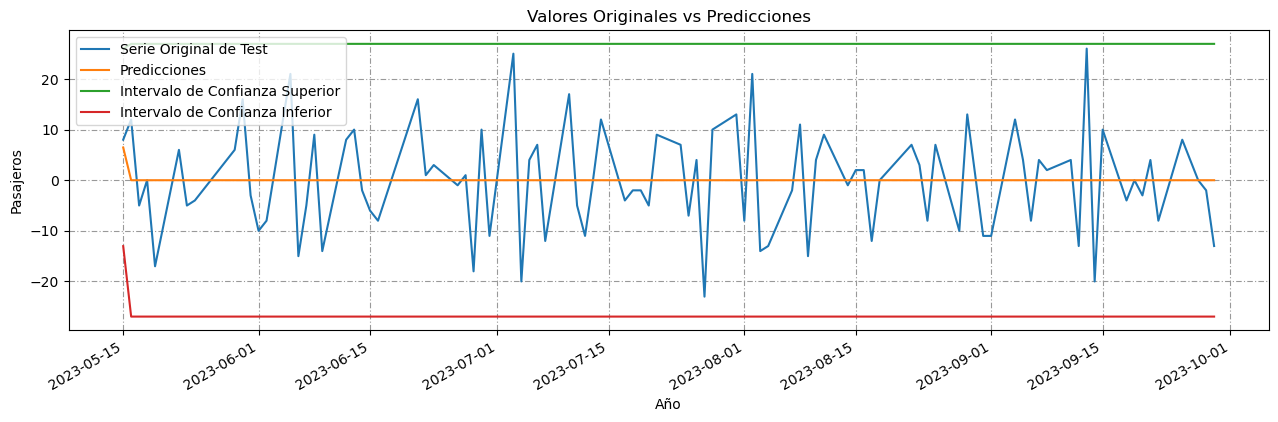

In [155]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TAD, TAD_pred, TAD_int)

In [156]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [157]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD.predicted_mean)

MSE: 105.4981994649892
MAE: 8.26869567898863
RMSE: 10.271231643040148
MAPE: nan


**PLANES DE PAGO**

In [158]:
# Seleccionamos el primer 75% para train
train_PP = data_diff_PP.iloc[:round(len(data_diff_PP)*.75)]
# Seleccionamos el 25% restante para test
test_PP = data_diff_PP.iloc[round(len(data_diff_PP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_PP, test_PP)

FECHA
2022-03-16    3.0
2022-03-17    2.0
2022-03-18   -5.0
2022-03-21   -1.0
2022-03-22    5.0
             ... 
2023-05-08    2.0
2023-05-09   -6.0
2023-05-10   -1.0
2023-05-11    3.0
2023-05-12    3.0
Name: PP, Length: 284, dtype: float64 FECHA
2023-05-15     7.0
2023-05-16   -13.0
2023-05-17     1.0
2023-05-18    19.0
2023-05-19   -24.0
              ... 
2023-09-25     3.0
2023-09-26    -6.0
2023-09-27     0.0
2023-09-28     4.0
2023-09-29    -1.0
Name: PP, Length: 95, dtype: float64


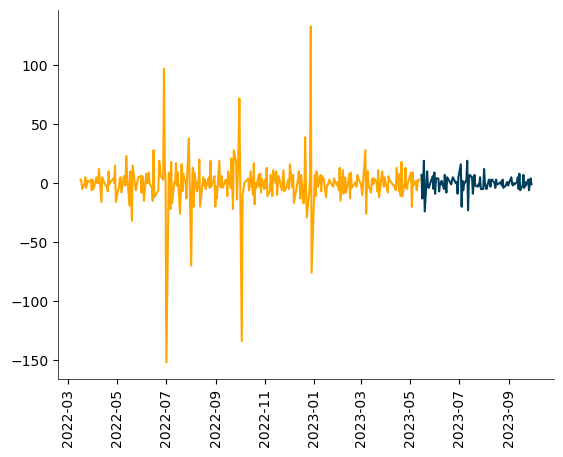

In [159]:
plt.plot(train_PP, color="#ffa600")
plt.plot(test_PP, color="#003f5c")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

In [160]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_PP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2519.718, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2511.156, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2498.718, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2517.719, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2498.066, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2498.820, Time=0.09 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2500.680, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2478.079, Time=0.05 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=2478.803, Time=0.14 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=2478.760, Time=0.14 sec
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=2480.758, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[7] intercept   : AIC=2471.555, Time=0.09 sec
 ARIMA(0,0,3)(1,0,0)[7] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1229.413
Date:                Mon, 13 Nov 2023   AIC                           2464.825
Time:                        07:45:50   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1362      8.871     37.777      0.000     317.748     352.524
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4364.95
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
modelo_sarima_PP = SARIMAX(train_PP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP = modelo_sarima_PP.fit()
print(result_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1229.413
Date:                Mon, 13 Nov 2023   AIC                           2464.825
Time:                        07:45:54   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1362      8.871     37.777      0.0

In [162]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [163]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP = result_sarima_PP.get_forecast(len(test_PP))

In [164]:
predicciones_PP = result_sarima_PP.get_forecast(95)

In [165]:
PP_pred = predicciones_sarima_PP.predicted_mean
PP_int = predicciones_sarima_PP.conf_int()

In [166]:
PP_pred.index = test_PP.index
PP_int.index = test_PP.index

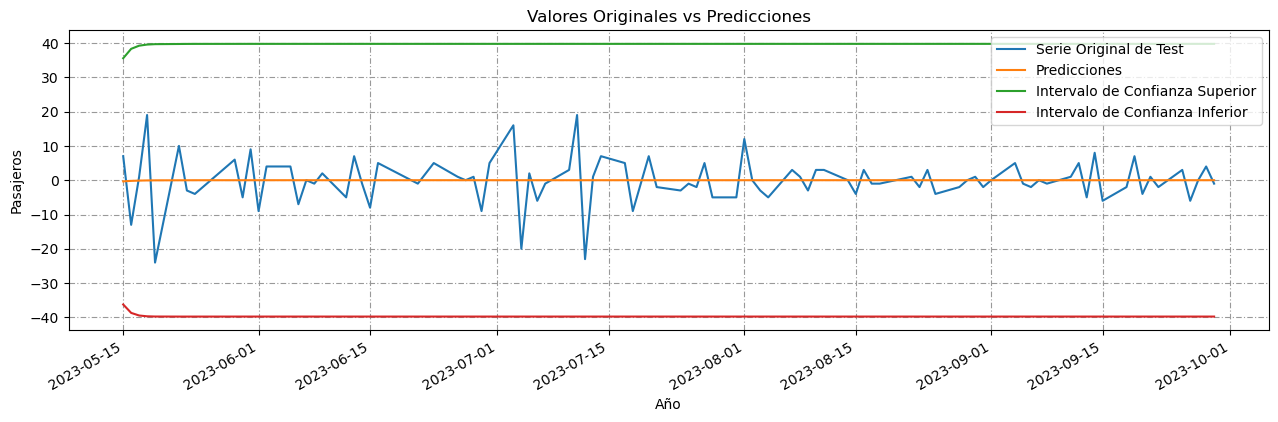

In [167]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_PP, PP_pred, PP_int)

In [168]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [169]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP.predicted_mean)

MSE: 46.17912003062302
MAE: 4.655594921223892
RMSE: 6.795522057253807
MAPE: nan


---
## **7. Detallar una comparación con otros modelos estimados.**

**WAPP**

*WAPP1*

In [170]:
modelo_sarima_WAPP1 = SARIMAX(train_WAPP, order=(1,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP1 = modelo_sarima_WAPP1.fit()
print(result_sarima_WAPP1.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1119.031
Date:                Mon, 13 Nov 2023   AIC                           2246.062
Time:                        07:46:21   BIC                           2260.658
Sample:                             0   HQIC                          2251.914
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7806      0.042     18.549      0.000       0.698       0.863
ma.L1         -1.2862      0.612     -2.101      0.036      -2.486      -0.086
ma.L2          0.2864      0.194      1.474      0.1

In [171]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP1 = result_sarima_WAPP1.get_forecast(len(test_WAPP))

In [172]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [173]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP1.predicted_mean)

MSE: 90.98969137307826
MAE: 7.26445135447051
RMSE: 9.538851680002066
MAPE: nan


*WAPP2*

In [174]:
modelo_sarima_WAPP2 = SARIMAX(train_WAPP, order=(2,0,1), seasonal_order=(0,0,0,7))
result_sarima_WAPP2 = modelo_sarima_WAPP2.fit()
print(result_sarima_WAPP2.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1120.124
Date:                Mon, 13 Nov 2023   AIC                           2248.248
Time:                        07:46:35   BIC                           2262.844
Sample:                             0   HQIC                          2254.100
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4475      0.066      6.790      0.000       0.318       0.577
ar.L2          0.0534      0.064      0.834      0.404      -0.072       0.179
ma.L1         -0.9079      0.041    -22.255      0.0

In [175]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP2 = result_sarima_WAPP2.get_forecast(len(test_WAPP))

In [176]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [177]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP2.predicted_mean)

MSE: 90.97908008385623
MAE: 7.261640803797136
RMSE: 9.538295449599799
MAPE: nan


*WAPP3 - AVERAGE METHOD*

In [178]:
# Lee el archivo Excel en un DataFrame de pandas
wapp = pd.read_excel("ST_ATENCION1wapp.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(wapp.head())

       FECHA  WAPP
0 2022-03-15    19
1 2022-03-16    12
2 2022-03-17    14
3 2022-03-18    67
4 2022-03-21    45


In [179]:
wapp.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset


            WAPP
FECHA           
2022-03-15    19
2022-03-16    12
2022-03-17    14
2022-03-18    67
2022-03-21    45
...          ...
2023-06-06    40
2023-06-07    41
2023-06-08    23
2023-06-09    26
2023-06-12    39

[304 rows x 1 columns]             WAPP
FECHA           
2023-06-13    44
2023-06-14    40
2023-06-15    26
2023-06-16    23
2023-06-21    51
...          ...
2023-09-25    20
2023-09-26    13
2023-09-27    17
2023-09-28    26
2023-09-29    12

[76 rows x 1 columns]


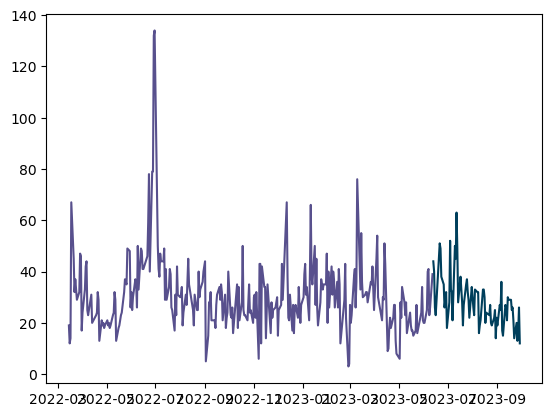

In [180]:
# Seleccionamos el primer 80% para train
train_wapp1 = wapp.iloc[:round(len(wapp)*.80)]

# Seleccionamos el 20% restante para test
test_wapp1 = wapp.iloc[round(len(wapp)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_wapp1, test_wapp1)

plt.plot(train_wapp1, color='#58508d')
plt.plot(test_wapp1,color='#003f5c')

In [181]:
numerado = train_wapp1["WAPP"].sum()
denominador = len(train_wapp1)
resultado = numerado / denominador

In [182]:
test_wapp1['prediccion_Average_M'] = resultado

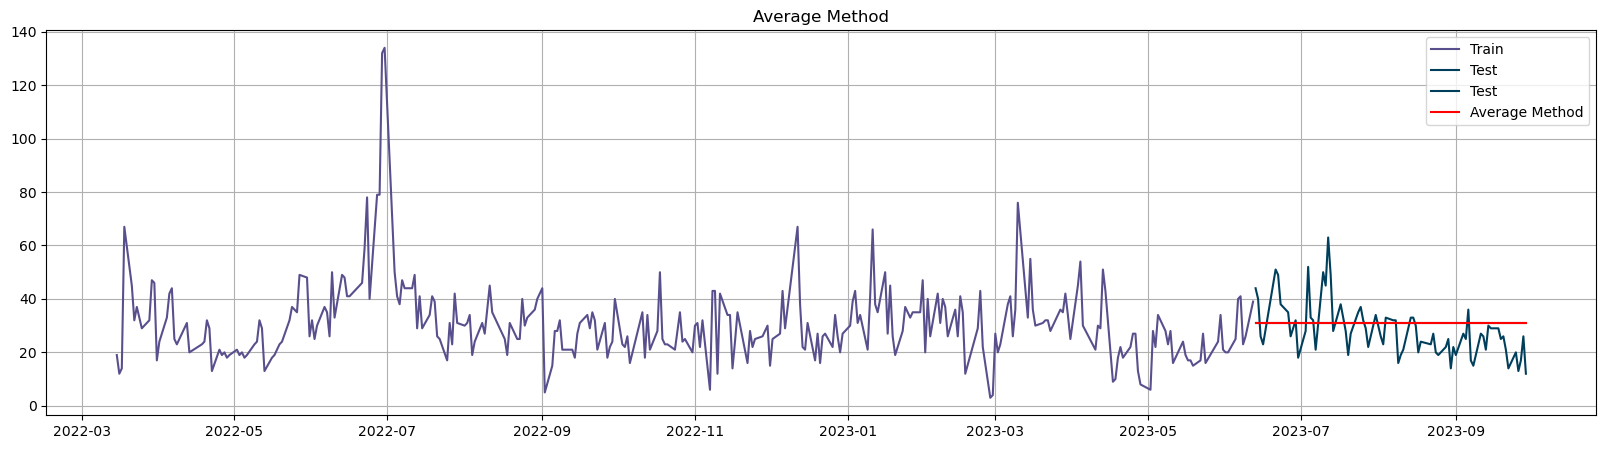

In [183]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_wapp1, label='Train', color="#58508d")
plt.plot(test_wapp1, label='Test', color="#003f5c")
plt.plot(test_wapp1['prediccion_Average_M'], label='Average Method', color="red")
plt.legend(loc='best')
plt.title('Average Method')
plt.show()

In [184]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [185]:
MAE_AV_METHOD_WAPP = mean_absolute_error(test_wapp1["WAPP"], test_wapp1['prediccion_Average_M'])
RMSE_AV_METHOD_WAPP = math.sqrt(MAE_AV_METHOD_WAPP)
MAPE_AV_METHOD_WAPP = mean_absolute_percentage_error(test_wapp1["WAPP"], test_wapp1['prediccion_Average_M'])

In [186]:
resultados_AV_METHOD_WAPP = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD_WAPP] ,'RMSE': [RMSE_AV_METHOD_WAPP], 'MAPE': [MAPE_AV_METHOD_WAPP]})
resultados_AV_METHOD_WAPP = resultados_AV_METHOD_WAPP[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD_WAPP

Metodo       MAE      RMSE      MAPE
0  Average Method  8.220914  2.867214  0.349066

- - - -

In [187]:
modelo_sarima_TP1 = SARIMAX(train_TP, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP1 = modelo_sarima_TP1.fit()
print(result_sarima_TP1.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1393.025
Date:                Mon, 13 Nov 2023   AIC                           2790.050
Time:                        07:47:26   BIC                           2797.348
Sample:                             0   HQIC                          2792.976
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4666      0.033    -14.199      0.000      -0.531      -0.402
sigma2      1065.5454     55.218     19.297      0.000     957.320    1173.771
Ljung-Box (L1) (Q):                   0.76   Jarque-

In [188]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP1 = result_sarima_TP1.get_forecast(len(test_TP))

In [189]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [190]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP1.predicted_mean)

MSE: 1281.3646901398856
MAE: 26.391444056051096
RMSE: 35.7961546837071
MAPE: nan


*TP2*

In [191]:
modelo_sarima_TP2 = SARIMAX(train_TP, order=(1,0,0), seasonal_order=(0,0,0,7))
result_sarima_TP2 = modelo_sarima_TP2.fit()
print(result_sarima_TP2.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1399.916
Date:                Mon, 13 Nov 2023   AIC                           2803.832
Time:                        07:47:56   BIC                           2811.130
Sample:                             0   HQIC                          2806.758
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3181      0.040     -8.024      0.000      -0.396      -0.240
sigma2      1119.1088     59.271     18.881      0.000    1002.941    1235.277
Ljung-Box (L1) (Q):                   0.91   Jarque-

In [192]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP2 = result_sarima_TP2.get_forecast(len(test_TP))

In [193]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [194]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP2.predicted_mean)

MSE: 1279.5052631578947
MAE: 26.347368421052632
RMSE: 35.77017281420226
MAPE: nan


**TP 3 - AVERAGE METHOD**

In [195]:
# Lee el archivo Excel en un DataFrame de pandas
tp = pd.read_excel("ST_ATENCION1tp.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(tp.head())


       FECHA  TP
0 2022-01-03  37
1 2022-01-04  24
2 2022-01-05  39
3 2022-01-06  33
4 2022-01-07  29


In [196]:
tp.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset

             TP
FECHA          
2022-01-03   37
2022-01-04   24
2022-01-05   39
2022-01-06   33
2022-01-07   29
...         ...
2023-05-19  132
2023-05-22  146
2023-05-23  129
2023-05-24   90
2023-05-29  162

[343 rows x 1 columns]              TP
FECHA          
2023-05-30  143
2023-05-31  120
2023-06-01  143
2023-06-02  132
2023-06-05  126
...         ...
2023-09-25  112
2023-09-26  118
2023-09-27  108
2023-09-28  111
2023-09-29  116

[86 rows x 1 columns]


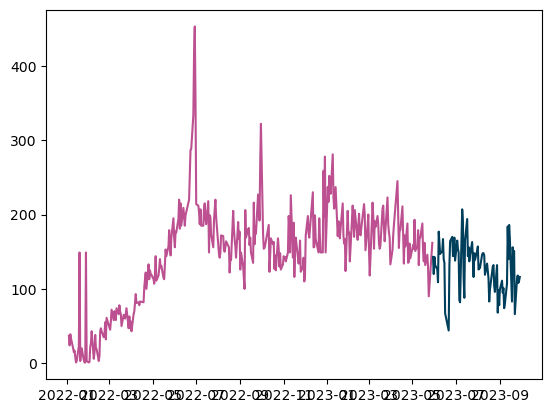

In [197]:
# Seleccionamos el primer 80% para train
train_tp1 = tp.iloc[:round(len(tp)*.80)]

# Seleccionamos el 20% restante para test
test_tp1 = tp.iloc[round(len(tp)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_tp1, test_tp1)

plt.plot(train_tp1,  color= "#bc5090")
plt.plot(test_tp1, color="#003f5c")


In [198]:
numerado = train_tp1["TP"].sum()
denominador = len(train_tp1)
resultado = numerado / denominador


In [199]:
test_tp1['prediccion_Average_M'] = resultado

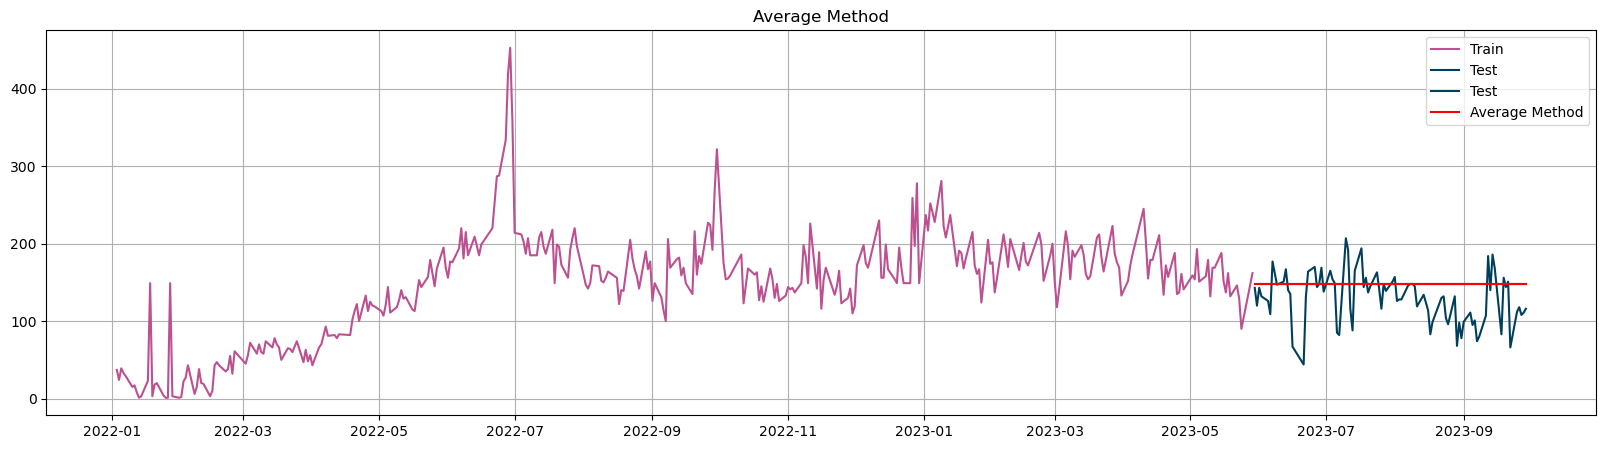

In [200]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_tp1, label='Train', color="#bc5090")
plt.plot(test_tp1, label='Test', color="#003f5c")
plt.plot(test_tp1['prediccion_Average_M'], label='Average Method', color="red")
plt.legend(loc='best')
plt.title('Average Method')
plt.show()


In [201]:
MAE_AV_METHOD_TP = mean_absolute_error(test_tp1["TP"], test_tp1['prediccion_Average_M'])
RMSE_AV_METHOD_TP = math.sqrt(MAE_AV_METHOD_TP)
MAPE_AV_METHOD_TP = mean_absolute_percentage_error(test_tp1["TP"], test_tp1['prediccion_Average_M'])


In [202]:
resultados_AV_METHOD_TP = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD_TP] ,'RMSE': [RMSE_AV_METHOD_TP], 'MAPE': [MAPE_AV_METHOD_TP]})
resultados_AV_METHOD_TP = resultados_AV_METHOD_TP[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD_TP


Metodo        MAE      RMSE      MAPE
0  Average Method  27.974202  5.289064  0.285819

- - - --

*TAD1*

In [203]:
modelo_sarima_TAD1 = SARIMAX(train_TAD, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD1 = modelo_sarima_TAD1.fit()
print(result_sarima_TAD1.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1055.745
Date:                Mon, 13 Nov 2023   AIC                           2117.490
Time:                        07:48:23   BIC                           2128.437
Sample:                             0   HQIC                          2121.879
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0817      0.067      1.223      0.221      -0.049       0.213
ma.L1         -0.9636      0.019    -50.912      0.000      -1.001      -0.926
sigma2        98.3183      6.429     15.293      0.0

In [204]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD1 = result_sarima_TAD1.get_forecast(len(test_TAD))

In [205]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [206]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD1.predicted_mean)

MSE: 105.412165934983
MAE: 8.271369847756617
RMSE: 10.267042706397154
MAPE: nan


*TAD2*

In [208]:
modelo_sarima_TAD2 = SARIMAX(train_TAD, order=(1,0,0), seasonal_order=(0,0,0,7))
result_sarima_TAD2 = modelo_sarima_TAD2.fit()
print(result_sarima_TAD2.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1100.933
Date:                Mon, 13 Nov 2023   AIC                           2205.867
Time:                        07:50:19   BIC                           2213.165
Sample:                             0   HQIC                          2208.793
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4715      0.052     -9.079      0.000      -0.573      -0.370
sigma2       136.2215     10.211     13.341      0.000     116.208     156.235
Ljung-Box (L1) (Q):                   4.91   Jarque-

In [209]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD2 = result_sarima_TAD2.get_forecast(len(test_TAD))

In [210]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [211]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD2.predicted_mean)

MSE: 106.37243621316266
MAE: 8.331325411971331
RMSE: 10.313701382780222
MAPE: nan


**TAD 3 - AVERAGE METHOD**

In [214]:
# Lee el archivo Excel en un DataFrame de pandas
tad = pd.read_excel("ST_ATENCION1tad.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(tad.head())


       FECHA  TAD
0 2022-01-03   31
1 2022-01-04   24
2 2022-01-05   18
3 2022-01-06   26
4 2022-01-07    9


In [215]:

tad.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset


            TAD
FECHA          
2022-01-03   31
2022-01-04   24
2022-01-05   18
2022-01-06   26
2022-01-07    9
...         ...
2023-05-19   31
2023-05-22   37
2023-05-23   32
2023-05-24   28
2023-05-29   34

[343 rows x 1 columns]             TAD
FECHA          
2023-05-30   50
2023-05-31   47
2023-06-01   37
2023-06-02   29
2023-06-05   50
...         ...
2023-09-25   38
2023-09-26   42
2023-09-27   42
2023-09-28   40
2023-09-29   27

[86 rows x 1 columns]


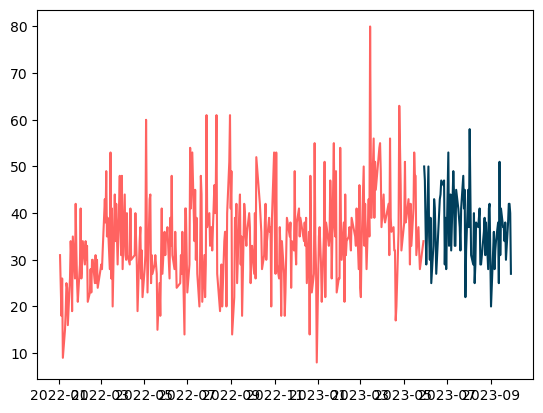

In [216]:
# Seleccionamos el primer 80% para train
train_tad1 = tad.iloc[:round(len(tad)*.80)]

# Seleccionamos el 20% restante para test
test_tad1 = tad.iloc[round(len(tad)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_tad1, test_tad1)

plt.plot(train_tad1, color="#ff6361")
plt.plot(test_tad1, color="#003f5c")


In [217]:
numerado = train_tad1["TAD"].sum()
denominador = len(train_tad1)
resultado = numerado / denominador


In [218]:
test_tad1['prediccion_Average_M'] = resultado

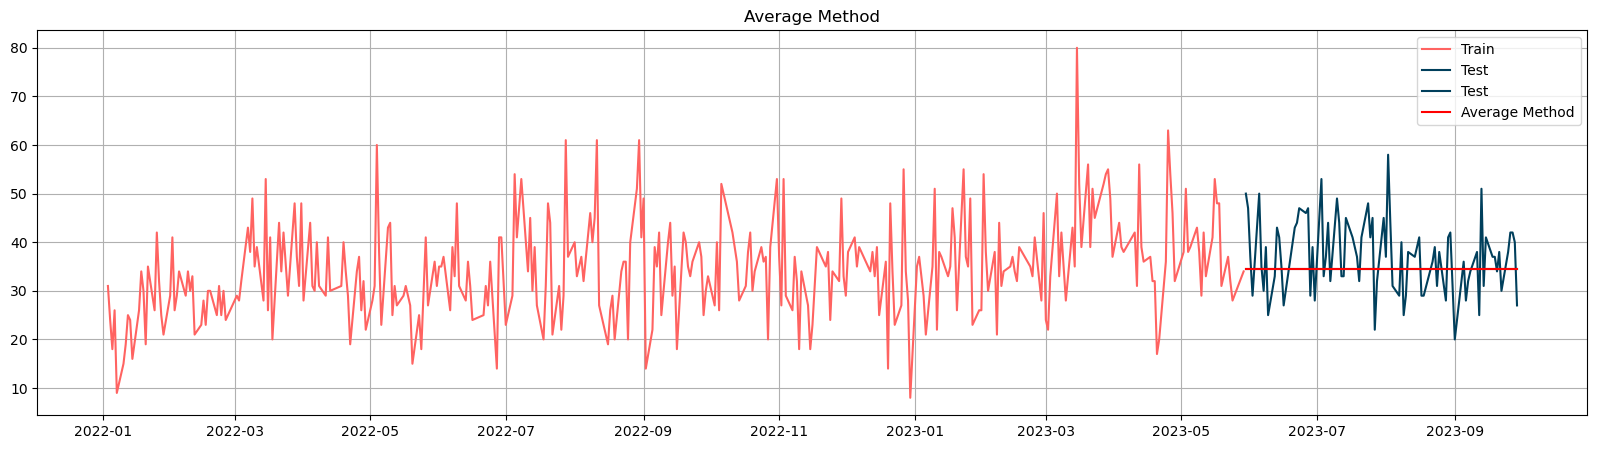

In [219]:

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_tad1, label='Train', color="#ff6361")
plt.plot(test_tad1, label='Test', color="#003f5c")
plt.plot(test_tad1['prediccion_Average_M'], label='Average Method', color="red")
plt.legend(loc='best')
plt.title('Average Method')
plt.show()


In [220]:
MAE_AV_METHOD_TAD = mean_absolute_error(test_tad1["TAD"], test_tad1['prediccion_Average_M'])
RMSE_AV_METHOD_TAD = math.sqrt(MAE_AV_METHOD_TP)
MAPE_AV_METHOD_TAD = mean_absolute_percentage_error(test_tad1["TAD"], test_tad1['prediccion_Average_M'])


In [221]:
resultados_AV_METHOD_TAD = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD_TAD] ,'RMSE': [RMSE_AV_METHOD_TAD], 'MAPE': [MAPE_AV_METHOD_TAD]})
resultados_AV_METHOD_TAD = resultados_AV_METHOD_TAD[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD_TAD


Metodo       MAE      RMSE      MAPE
0  Average Method  6.490847  5.289064  0.174366

- - - -

*PP1*

In [222]:
modelo_sarima_PP1 = SARIMAX(train_PP, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP1 = modelo_sarima_PP1.fit()
print(result_sarima_PP1.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1246.033
Date:                Mon, 13 Nov 2023   AIC                           2496.066
Time:                        07:52:23   BIC                           2503.364
Sample:                             0   HQIC                          2498.992
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4162      0.023    -17.942      0.000      -0.462      -0.371
sigma2       378.5429     10.207     37.086      0.000     358.537     398.548
Ljung-Box (L1) (Q):                   3.04   Jarque-

In [223]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP1 = result_sarima_PP1.get_forecast(len(test_PP))

In [224]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [225]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP1.predicted_mean)

MSE: 46.419465330015974
MAE: 4.6687913121333295
RMSE: 6.813183200972653
MAPE: nan


*PP2*

In [226]:
modelo_sarima_PP2 = SARIMAX(train_PP, order=(1,0,0), seasonal_order=(0,0,0,7))
result_sarima_PP2 = modelo_sarima_PP2.fit()
print(result_sarima_PP2.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1251.715
Date:                Mon, 13 Nov 2023   AIC                           2507.431
Time:                        07:52:36   BIC                           2514.728
Sample:                             0   HQIC                          2510.356
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2054      0.028     -7.424      0.000      -0.260      -0.151
sigma2       394.2007      9.136     43.146      0.000     376.294     412.108
Ljung-Box (L1) (Q):                   0.55   Jarque-

In [227]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP2 = result_sarima_PP2.get_forecast(len(test_PP))

In [228]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [229]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP2.predicted_mean)

MSE: 46.29586931340763
MAE: 4.660654532634971
RMSE: 6.804106797619187
MAPE: nan


*PP 3 - AVERAGE METHOD*

In [230]:
# Lee el archivo Excel en un DataFrame de pandas
pp = pd.read_excel("ST_ATENCION1pp.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(pp.head())


       FECHA  PP
0 2022-01-03   4
1 2022-01-04   5
2 2022-01-05  12
3 2022-01-06   5
4 2022-01-07   6


In [231]:
pp.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset


            PP
FECHA         
2022-01-03   4
2022-01-04   5
2022-01-05  12
2022-01-06   5
2022-01-07   6
...         ..
2023-05-19   7
2023-05-22  17
2023-05-23  14
2023-05-24  10
2023-05-29  16

[343 rows x 1 columns]             PP
FECHA         
2023-05-30  11
2023-05-31  20
2023-06-01  11
2023-06-02  15
2023-06-05  19
...         ..
2023-09-25  12
2023-09-26   6
2023-09-27   6
2023-09-28  10
2023-09-29   9

[86 rows x 1 columns]


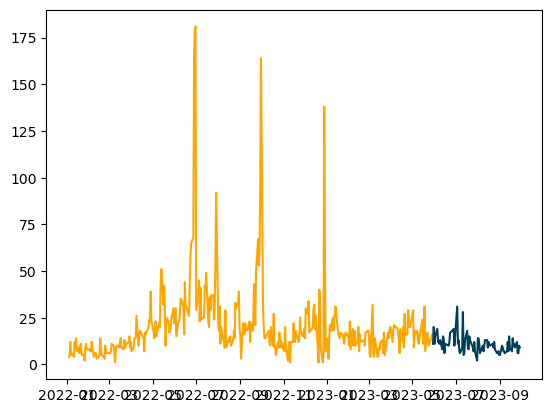

In [232]:
# Seleccionamos el primer 80% para train
train_pp1 = pp.iloc[:round(len(pp)*.80)]

# Seleccionamos el 20% restante para test
test_pp1 = pp.iloc[round(len(pp)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_pp1, test_pp1)

plt.plot(train_pp1, color="#ffa600")
plt.plot(test_pp1, color="#003f5c")

In [233]:
numerado = train_pp1["PP"].sum()
denominador = len(train_pp1)
resultado = numerado / denominador


In [234]:
test_pp1['prediccion_Average_M'] = resultado

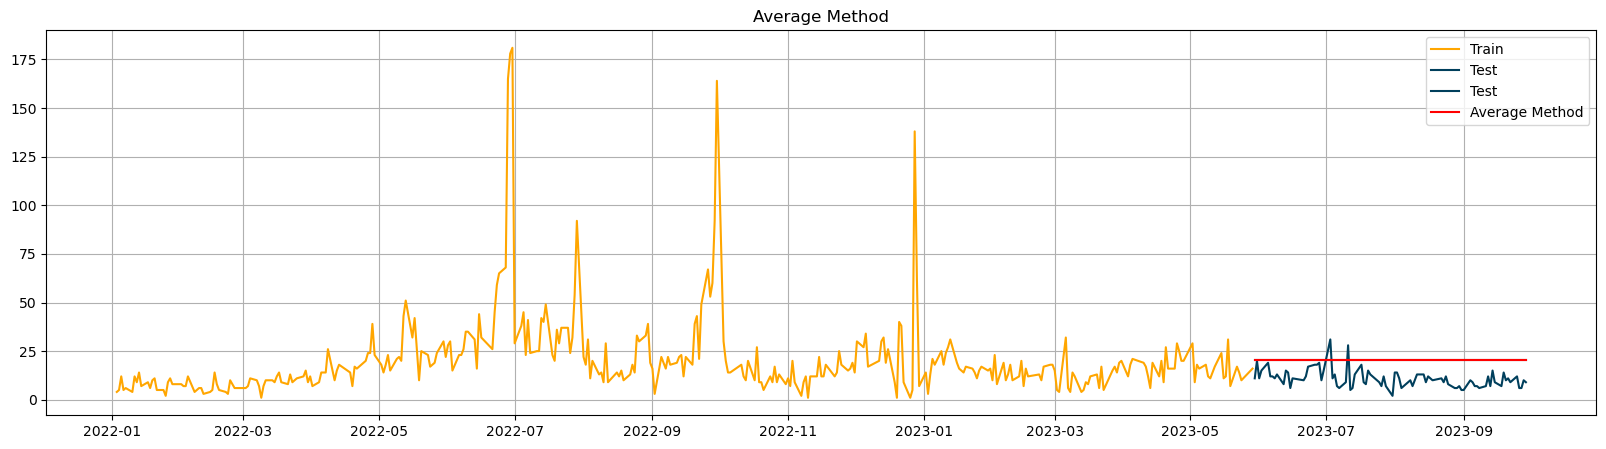

In [235]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_pp1, label='Train', color="#ffa600")
plt.plot(test_pp1, label='Test', color="#003f5c")
plt.plot(test_pp1['prediccion_Average_M'], label='Average Method', color="red")
plt.legend(loc='best')
plt.title('Average Method')
plt.show()


In [236]:
MAE_AV_METHOD_PP= mean_absolute_error(test_pp1["PP"], test_pp1['prediccion_Average_M'])
RMSE_AV_METHOD_PP = math.sqrt(MAE_AV_METHOD_PP)
MAPE_AV_METHOD_PP = mean_absolute_percentage_error(test_pp1["PP"], test_pp1['prediccion_Average_M'])


In [237]:
resultados_AV_METHOD_PP = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD_PP] ,'RMSE': [RMSE_AV_METHOD_PP], 'MAPE': [MAPE_AV_METHOD_PP]})
resultados_AV_METHOD_PP = resultados_AV_METHOD_PP[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD_PP


Metodo        MAE      RMSE      MAPE
0  Average Method  10.041325  3.168805  1.263727

In [238]:
dataframes = [resultados_AV_METHOD_WAPP, resultados_AV_METHOD_TP, 
              resultados_AV_METHOD_TAD, resultados_AV_METHOD_PP]

# Concatenar verticalmente los DataFrames
Resultados = pd.concat(dataframes, ignore_index=True)

Resultados=Resultados.drop('Metodo', axis=1)

Resultados.insert(0, 'SERIE', ['WAPP', 'TP', 'TAD', 'PP'])


# Mostrar el DataFrame unificado
print(Resultados)

  SERIE        MAE      RMSE      MAPE
0  WAPP   8.220914  2.867214  0.349066
1    TP  27.974202  5.289064  0.285819
2   TAD   6.490847  5.289064  0.174366
3    PP  10.041325  3.168805  1.263727


In [239]:
datos_wapp = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MSE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MAE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae]}
modelos_residuos_wapp = pd.DataFrame(datos_wapp)
modelos_residuos_wapp


Modelos          AIC          BIC         MSE       MAE
0    WAPP  2244.320477  2262.565348  153.391354  8.669881
1   WAPP1  2246.061817  2260.657714  155.356016  8.741961
2   WAPP2  2248.247747  2262.843644  156.630968  8.837095

**COMPARACIÓN DE MODELOS**

In [240]:
datos = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MAE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MSE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

Modelos          AIC          BIC         MAE       MSE
0    WAPP  2244.320477  2262.565348  153.391354  8.669881
1   WAPP1  2246.061817  2260.657714  155.356016  8.741961
2   WAPP2  2248.247747  2262.843644  156.630968  8.837095

---
## **8. Efectuar un Análisis de Diagnóstico de las series temporales (Análisis sobre los Residuos del modelo, análisis gráfico de FAC, test de Ljung-Box, etc.).**

**EVALUACIÓN DE RESIDUOS**

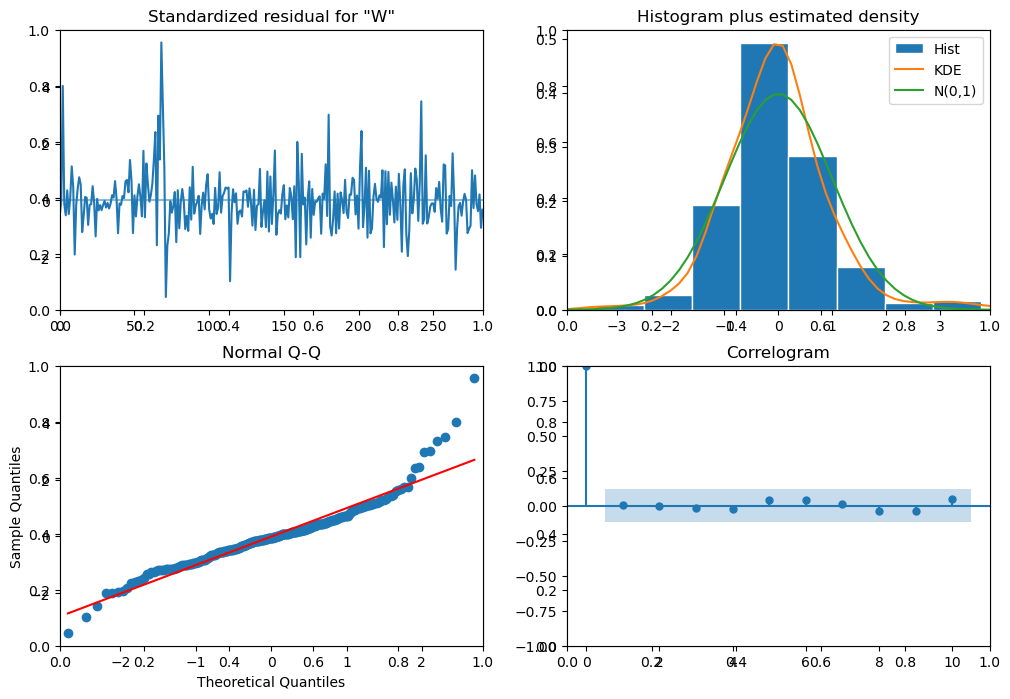

In [241]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP.plot_diagnostics(fig=fig)
plt.show()

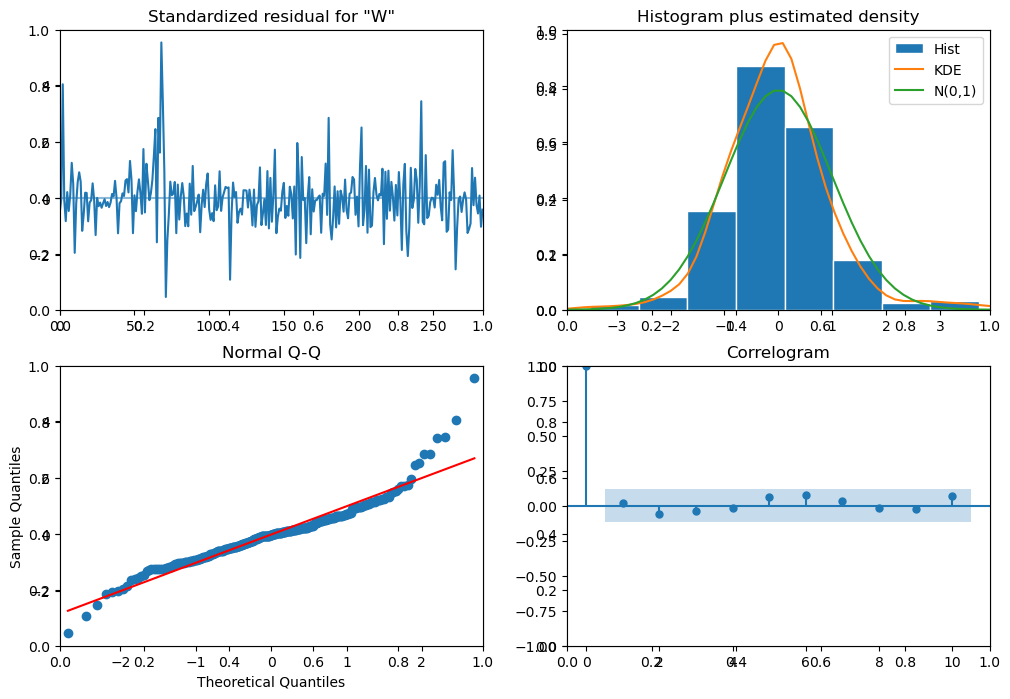

In [242]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP1.plot_diagnostics(fig=fig)
plt.show()

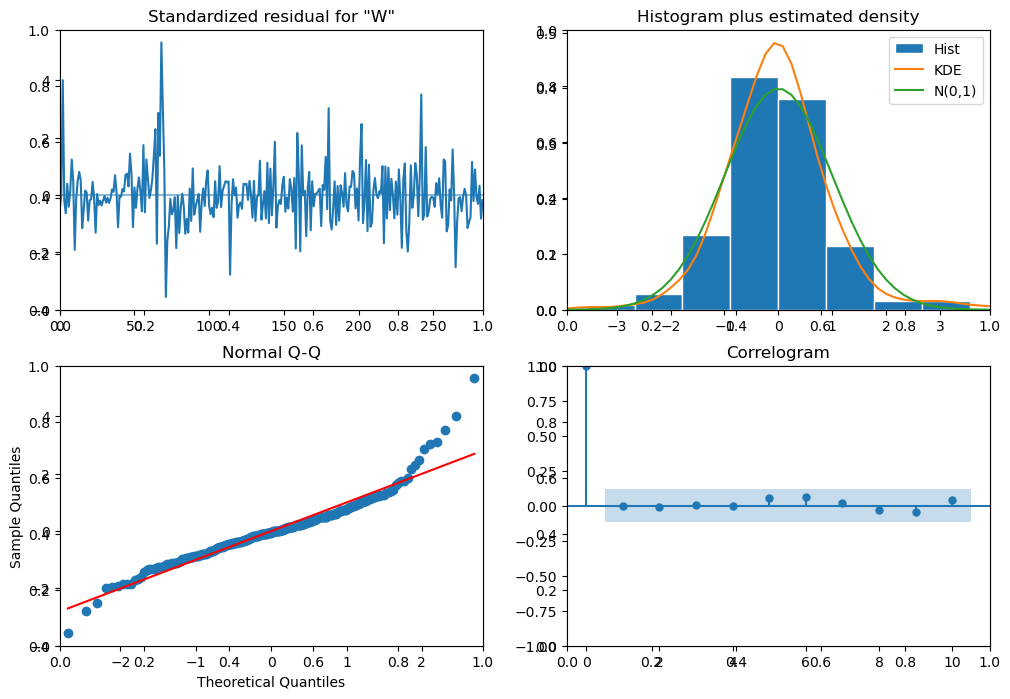

In [243]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP2.plot_diagnostics(fig=fig)
plt.show()

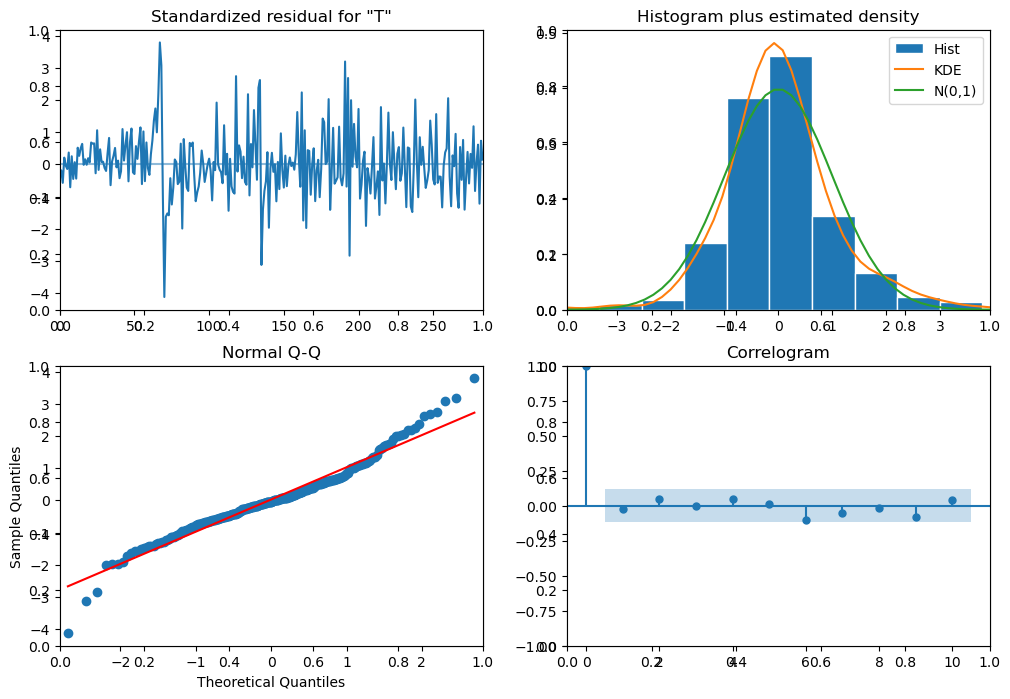

In [244]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP.plot_diagnostics(fig=fig)
plt.show()

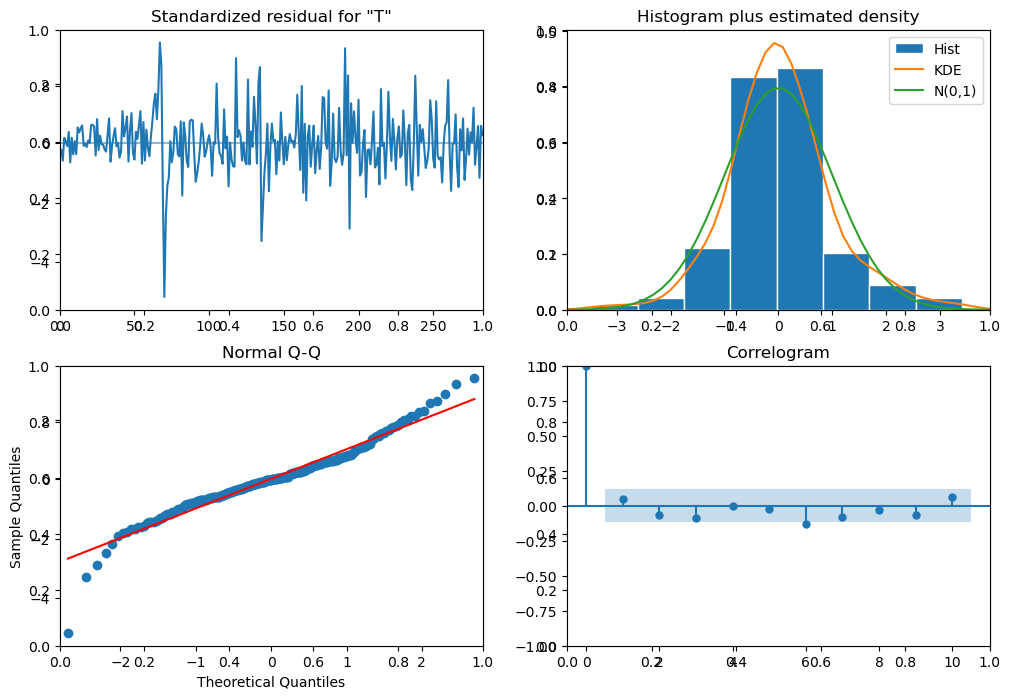

In [245]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP1.plot_diagnostics(fig=fig)
plt.show()

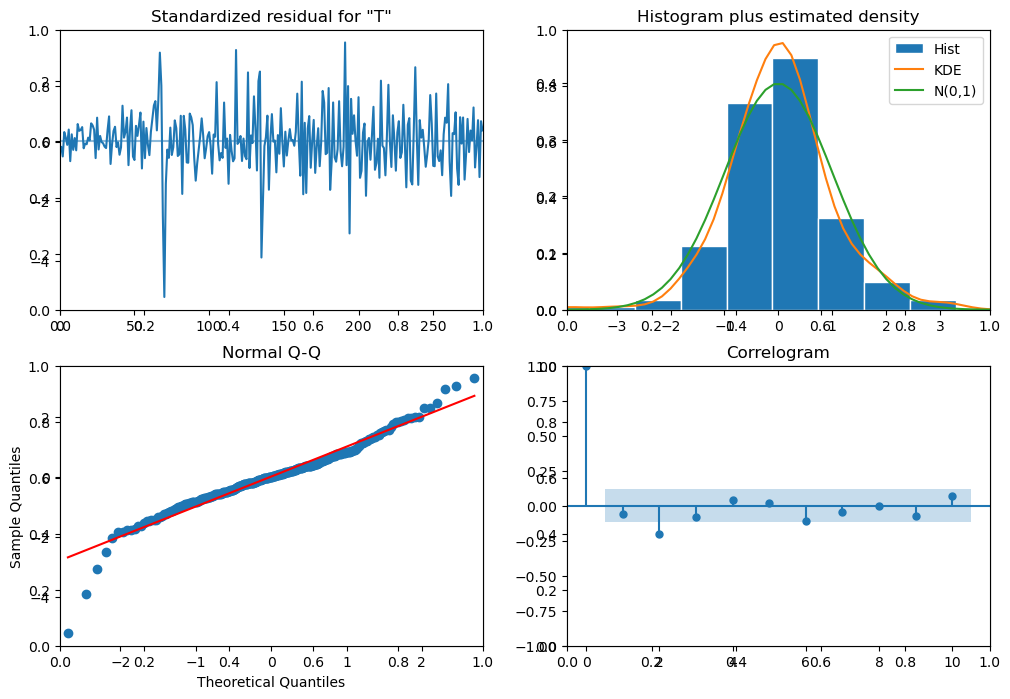

In [246]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP2.plot_diagnostics(fig=fig)
plt.show()

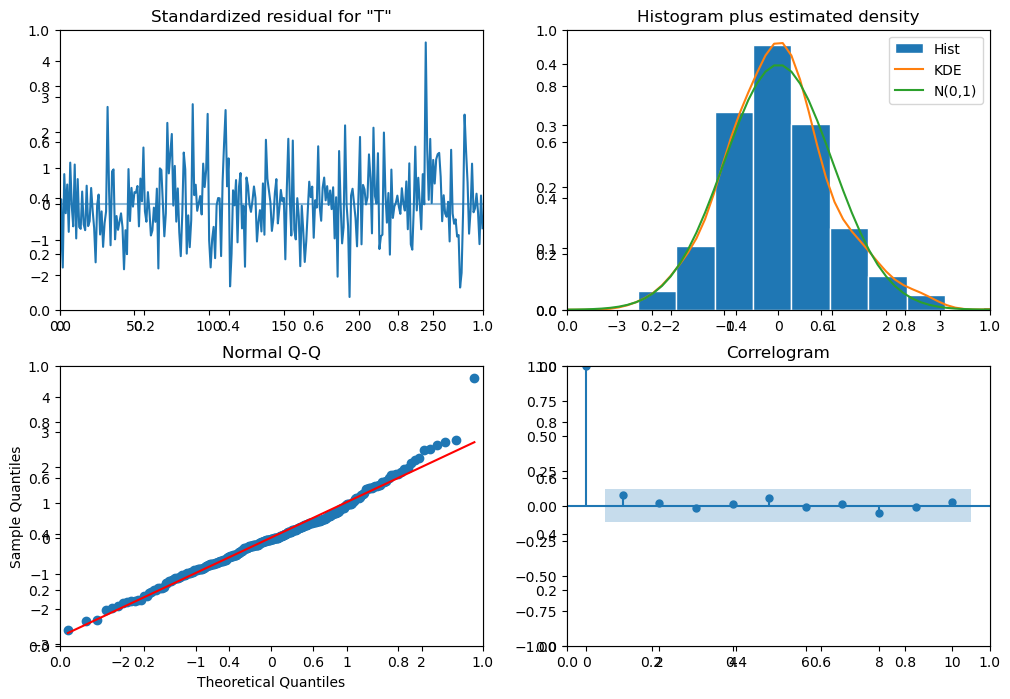

In [247]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD.plot_diagnostics(fig=fig)
plt.show()

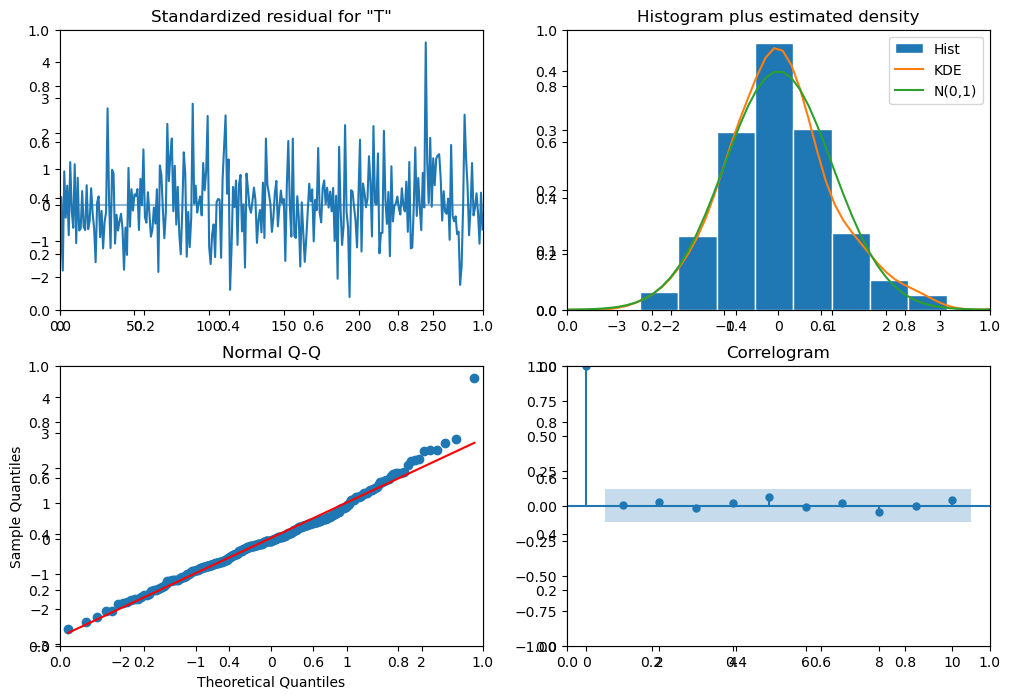

In [248]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD1.plot_diagnostics(fig=fig)
plt.show()

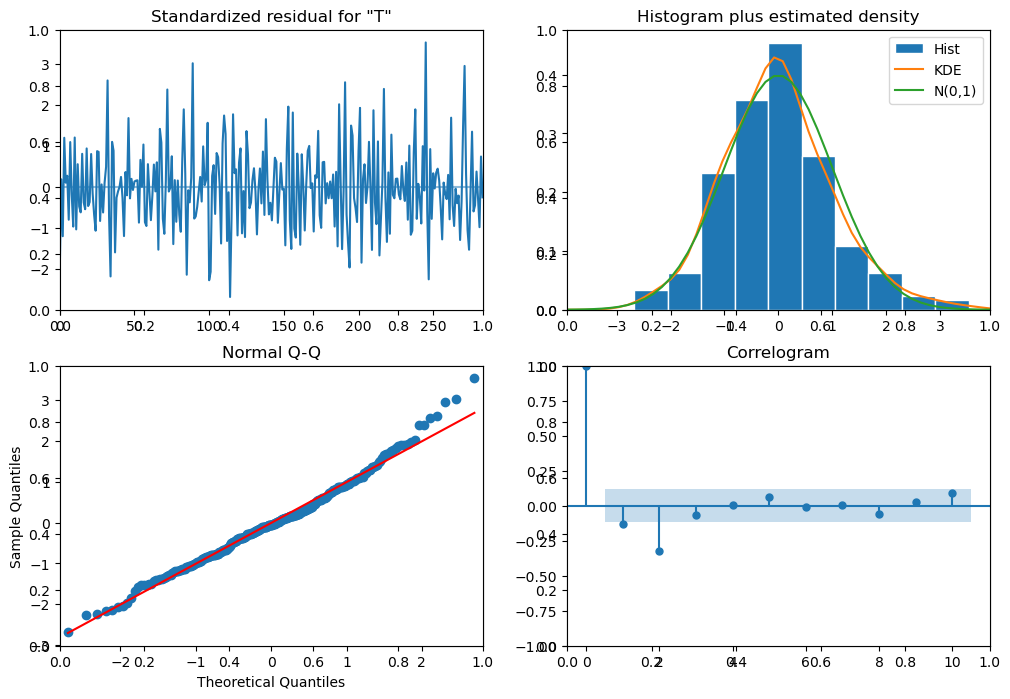

In [249]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD2.plot_diagnostics(fig=fig)
plt.show()

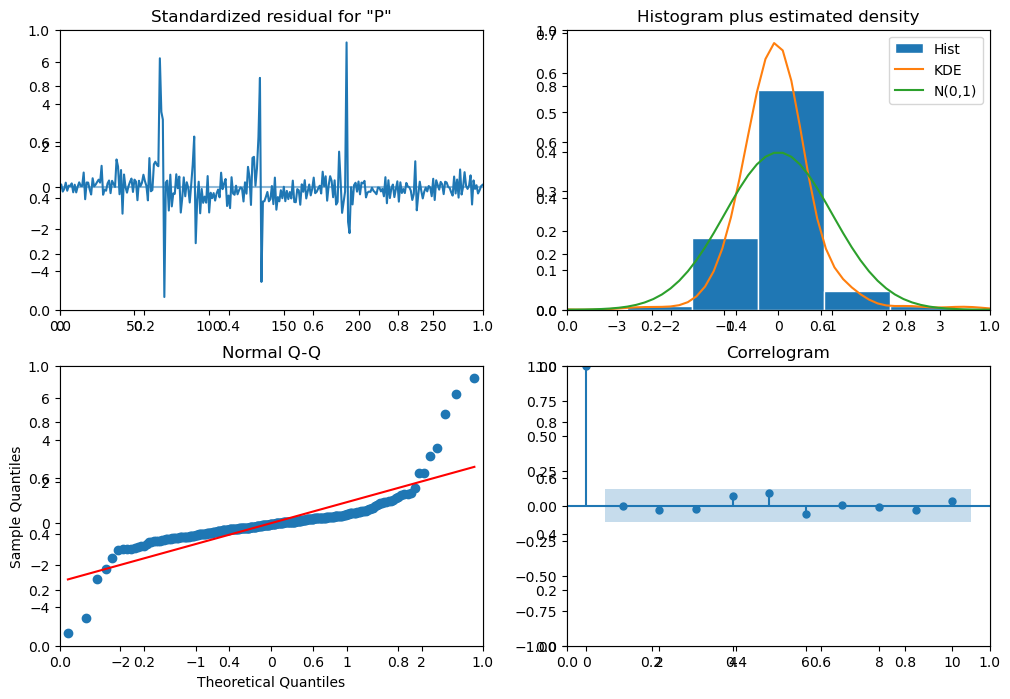

In [250]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP.plot_diagnostics(fig=fig)
plt.show()

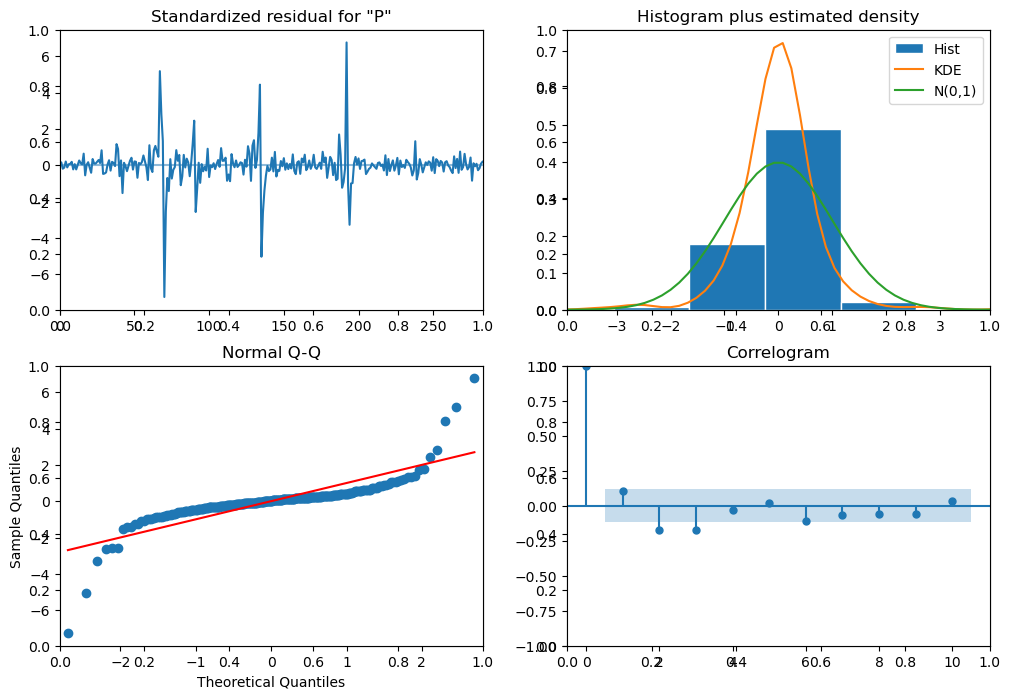

In [251]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP1.plot_diagnostics(fig=fig)
plt.show()

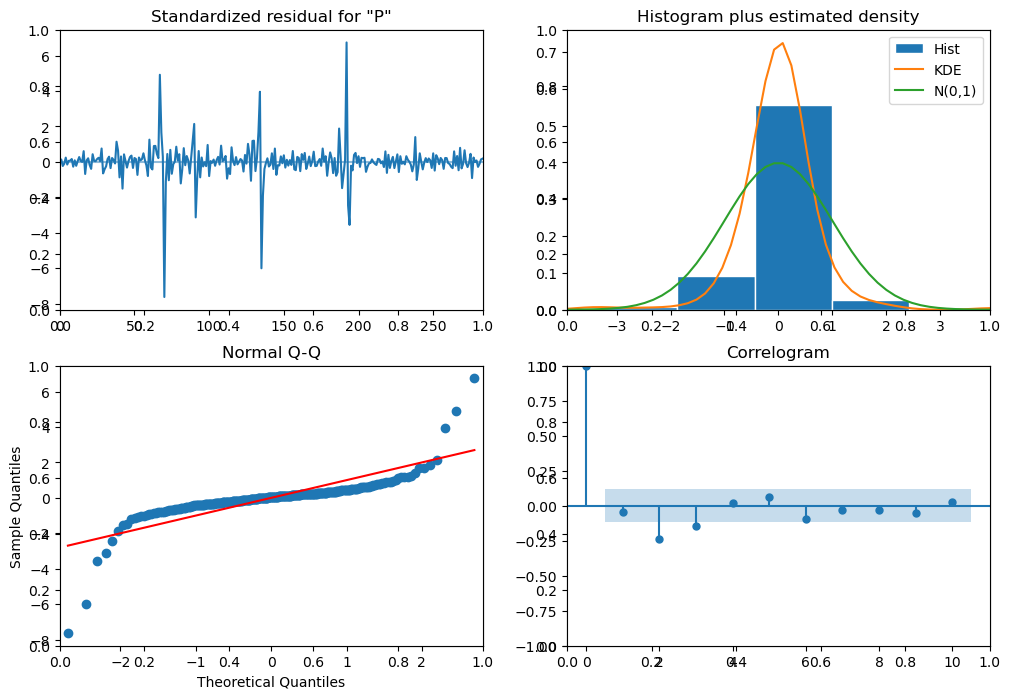

In [252]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP2.plot_diagnostics(fig=fig)
plt.show()

**Test de Breusch-Godfrey, test Ljung-Box de correlación serial y test de Jarque-Bera de normalidad**

**WAPP**

In [254]:
import statsmodels.api as sm
bg_WAPP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_WAPP, nlags=3)
fstat = bg_WAPP[2]
fpval = bg_WAPP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.01961190155931089

fpval: 0.9962614190583873



In [255]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
residuos_WAPP = result_sarima_WAPP.resid
# Test de Ljung-Box
lb_test_WAPP = acorr_ljungbox(residuos_WAPP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_WAPP)

    lb_stat  lb_pvalue
1  0.001808    0.96608


In [256]:
import statsmodels.stats.stattools
from statsmodels.stats.stattools import jarque_bera
residuos_WAPP = result_sarima_WAPP.resid
# Test de Jarque-Bera
jb_test_WAPP = jarque_bera(residuos_WAPP)
print(f"Estadístico de Jarque-Bera: {jb_test_WAPP[0]}")
print(f"P-valor: {jb_test_WAPP[1]}")

Estadístico de Jarque-Bera: 341.99821967945206
P-valor: 5.445405005680975e-75


**TP**

In [257]:
bg_TP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_TP, nlags=3)
fstat = bg_TP[2]
fpval = bg_TP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.24871708680270008

fpval: 0.8622189621375662



In [258]:
residuos_TP = result_sarima_TP.resid
# Test de Ljung-Box
lb_test_TP = acorr_ljungbox(residuos_TP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_TP)

    lb_stat  lb_pvalue
1  0.140075   0.708207


In [259]:
residuos_TP = result_sarima_TP.resid
# Test de Jarque-Bera
jb_test_TP = jarque_bera(residuos_TP)
print(f"Estadístico de Jarque-Bera: {jb_test_TP[0]}")
print(f"P-valor: {jb_test_TP[1]}")

Estadístico de Jarque-Bera: 53.62560393730779
P-valor: 2.266460009945491e-12


**TAD**

In [260]:
bg_TAD = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_TAD, nlags=3)
fstat = bg_TAD[2]
fpval = bg_TAD[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.6186872988784698

fpval: 0.6034197046108545



In [261]:
residuos_TAD = result_sarima_TAD.resid
# Test de Ljung-Box
lb_test_TAD = acorr_ljungbox(residuos_TAD, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_TAD)

    lb_stat  lb_pvalue
1  1.545548   0.213794


In [262]:
residuos_TAD = result_sarima_TAD.resid
# Test de Jarque-Bera
jb_test_TAD = jarque_bera(residuos_TAD)
print(f"Estadístico de Jarque-Bera: {jb_test_TAD[0]}")
print(f"P-valor: {jb_test_TAD[1]}")

Estadístico de Jarque-Bera: 29.194294983959573
P-valor: 4.576562447390208e-07


**PP**

In [263]:
bg_PP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_PP, nlags=3)
fstat = bg_PP[2]
fpval = bg_PP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.12242983628597488

fpval: 0.9468303904402394



In [264]:
residuos_PP = result_sarima_PP.resid
# Test de Ljung-Box
lb_test_PP = acorr_ljungbox(residuos_PP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_PP)

    lb_stat  lb_pvalue
1  0.000009   0.997608


In [265]:
residuos_PP = result_sarima_PP.resid
# Test de Breusch-Godfrey
lags = 1  # Número de rezagos a incluir en el test
# Test de Jarque-Bera
jb_test_PP = jarque_bera(residuos_PP)
print(f"Estadístico de Jarque-Bera: {jb_test_PP[0]}")
print(f"P-valor: {jb_test_PP[1]}")

Estadístico de Jarque-Bera: 4357.927666727082
P-valor: 0.0


**Test de Breusch-Pagan**

**WAPP**

In [266]:
import statsmodels.api as sm
residuos_WAPP = result_sarima_WAPP.resid
exog = sm.add_constant(np.arange(len(residuos_WAPP)))
bp_WAPP = sm.stats.het_breuschpagan(residuos_WAPP, exog_het=exog)
bp_statistic = bp_WAPP[0]
bp_pval = bp_WAPP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

bp_statistic: 0.8451535748557553

bp_pval: 0.35792699331075595



**TP**

In [267]:
residuos_TP = result_sarima_TP.resid
exog = sm.add_constant(np.arange(len(residuos_TP)))
bp_TP = sm.stats.het_breuschpagan(residuos_TP, exog_het=exog)
bp_statistic = bp_TP[0]
bp_pval = bp_TP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')


bp_statistic: 0.15444445805248774

bp_pval: 0.6943237493933425



**TAD**

In [268]:
residuos_TAD = result_sarima_TAD.resid
exog = sm.add_constant(np.arange(len(residuos_TAD)))
bp_TAD = sm.stats.het_breuschpagan(residuos_TAD, exog_het=exog)
bp_statistic = bp_TAD[0]
bp_pval = bp_TAD[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

bp_statistic: 0.35837677240150745

bp_pval: 0.5494091194426596



**PP**

In [269]:
residuos_PP = result_sarima_PP.resid
exog = sm.add_constant(np.arange(len(residuos_PP)))
bp_PP = sm.stats.het_breuschpagan(residuos_PP, exog_het=exog)
bp_statistic = bp_PP[0]
bp_pval = bp_PP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')


bp_statistic: 0.806622396719356

bp_pval: 0.3691207280770302



---
## **9. Pronosticar con el modelo seleccionado para cada serie para una ventana temporal razonable, en función de la periodicidad y el comportamiento de las mismas.**

In [270]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [271]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [272]:
def invert_transformation(train_df, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = train_df.columns
    for col in columns:
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (train_df[col].iloc[-1]-train_df[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = train_df[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [273]:
def train_test_split(df: pd.DataFrame, train_end, test_end):
    """
    Splits input dataframe into test and train set.
    
    Args:
        df (pd.DataFrame): dataframe to split with datetime index.
        train_end (datetime): end date of the train set (inclusive)
        test_end (datetime): end date of the test set

    Returns:
        train_df (pd.DataFrame): Train Dataframe
        test_df (pd.DataFrame):  Test Dataframe
    """
    df = df.sort_index()

    train_df = df[df.index <= train_end]
    test_df = df[(df.index >= train_end) & (df.index <= test_end)]

    return train_df, test_df

In [274]:
def plot_sarima_forecast(train_df: pd.DataFrame, test_df: pd.DataFrame, fc_series: pd.DataFrame, serie_name) -> None:
    """
    This function plots the train, test and forecast values.
    ---
    Args:
        train_df (pd.DataFrame):  training set dataframe
        test_df (pd.DataFrame):  test set dataframe
        fc_series (pd.Series):  forecast values as series
        
    Returns: None
    """
    fig, ax = plt.subplots(figsize=(7,4), facecolor='w')
    xmin = datetime(2023, 3, 16)
    xmax = datetime(2023, 10, 13)

    # Plot Train, Test and Forecast.
    ax.plot(train_df[xmin:], label='Training')
    ax.plot(test_df, label='Testing')
    ax.plot(fc_series, label='Forecast')

    # Labels
    ax.set_title(f"{serie_name} Forecast", fontsize=15, pad=20)
    ax.set_ylabel("Cantidad", fontsize=12)
    ax.set_xlabel("Fecha", fontsize=12)

    # Ajustar para mejor visualización
    ax = plt.gca()
    ax.set_xlim([xmin, xmax])
    
    # Legend & Grid
    ax.grid(linestyle=":", color='grey')
    ax.legend()
    
    plt.show()

**Para realizar los pronósticos seleccionamos los 4 mejores modelos del punto 6**

**WAPP:(ARIMA 2,0,2)**

**TP:(ARIMA 2,0,1)**

**TAD:(ARIMA 1,0,1)**

**PP:(ARIMA 1,0,1)**

In [227]:
# Fechas train/test
train_end = '2023-05-12'
test_end = '2023-09-29'
train_df, test_df = train_test_split(data, train_end, test_end)

In [228]:
# Fechas forecast
start_date = '2023-09-29'
end_date = '2023-10-13'
days = 15
new_index_values = pd.date_range(start=start_date, end=end_date)

**WAPP**

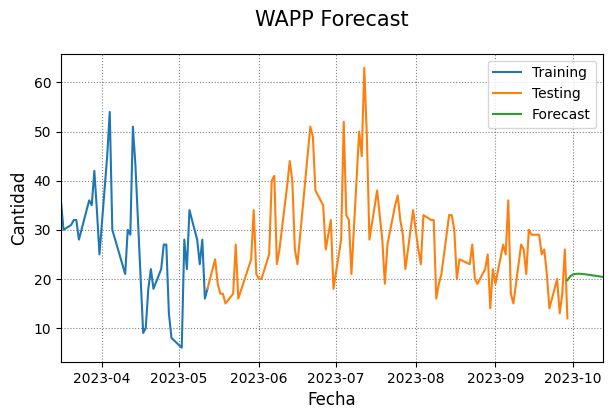

In [229]:
modelo_sarima_WAPP = SARIMAX(train_df.WAPP, order=(2,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP = modelo_sarima_WAPP.fit()

sarima_forecast_WAPP = result_sarima_WAPP.forecast(days)
forecast_WAPP =pd.DataFrame(data=sarima_forecast_WAPP.to_list(), index=new_index_values, columns=['predicted_WAPP'])

plot_sarima_forecast(train_df.WAPP, test_df.WAPP, forecast_WAPP, 'WAPP')

**TP**

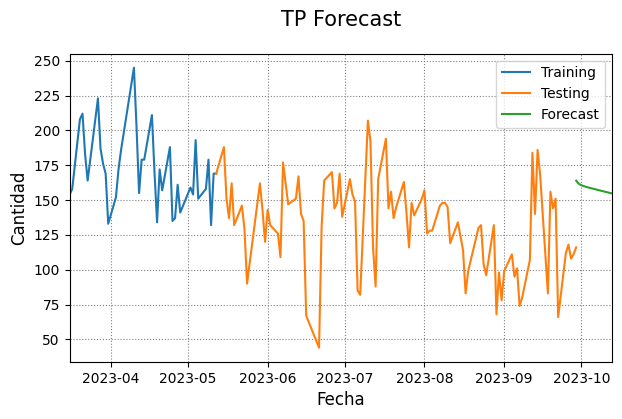

In [230]:
modelo_sarima_TP = SARIMAX(train_df.TP, order=(2,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP = modelo_sarima_TP.fit()

sarima_forecast_TP = result_sarima_TP.forecast(days)
forecast_TP =pd.DataFrame(data=sarima_forecast_TP.to_list(), index=new_index_values, columns=['predicted_TP'])

plot_sarima_forecast(train_df.TP, test_df.TP, forecast_TP, 'TP')

**TAD**

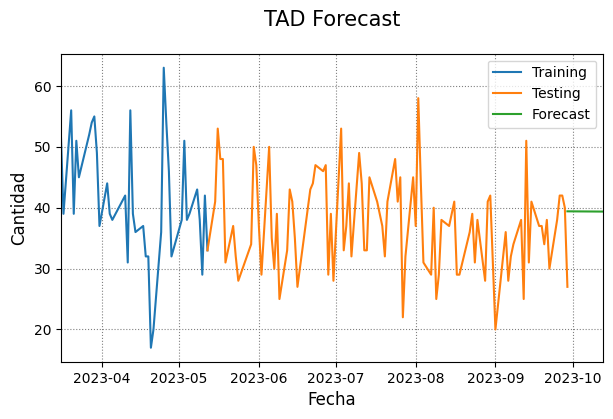

In [231]:
modelo_sarima_TAD = SARIMAX(train_df.TAD, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD = modelo_sarima_TAD.fit()

sarima_forecast_TAD = result_sarima_TAD.forecast(days)
forecast_TAD =pd.DataFrame(data=sarima_forecast_TAD.to_list(), index=new_index_values, columns=['predicted_TAD'])

plot_sarima_forecast(train_df.TAD, test_df.TAD, forecast_TAD, 'TAD')

**PP**

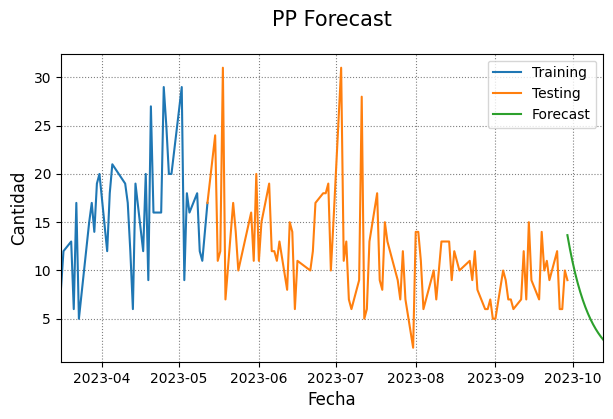

In [232]:
modelo_sarima_PP = SARIMAX(train_df.PP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP = modelo_sarima_PP.fit()

sarima_forecast_PP = result_sarima_PP.forecast(days)
forecast_PP =pd.DataFrame(data=sarima_forecast_PP.to_list(), index=new_index_values, columns=['predicted_TP'])

plot_sarima_forecast(train_df.PP, test_df.PP, forecast_PP, 'PP')

---
## **10. Construir un modelo de Vectores Autorregresivos (VAR) con las series elegidas para realizar predicciones sobre cada una de ellas.**

##### **Grafico de las series originales:**

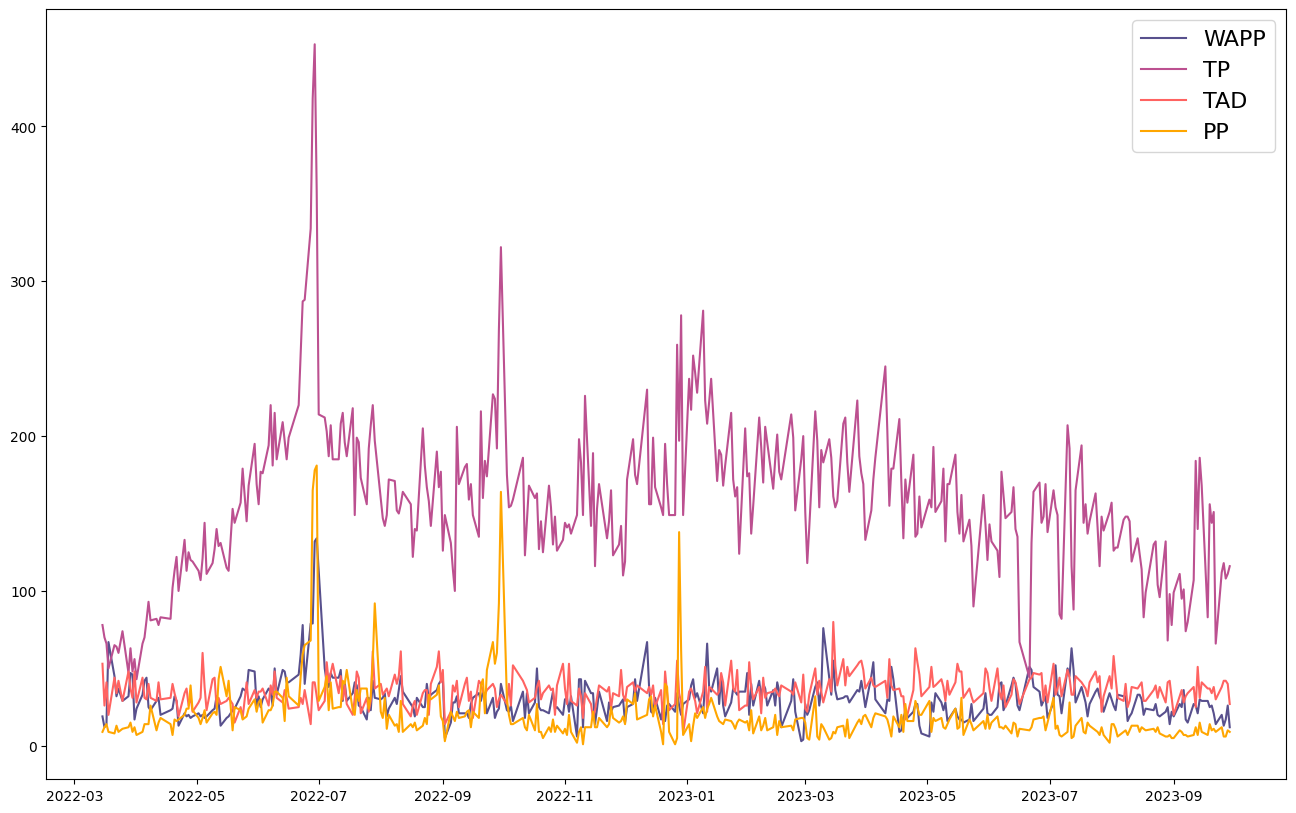

In [233]:
plt.figure(figsize=(16,10))
WAPP, = plt.plot(data ["WAPP"], color='#58508d')
TP, = plt.plot(data ['TP'], color='#bc5090')
TAD, = plt.plot(data ['TAD'], color='#ff6361')
PP, = plt.plot(data ['PP'], color='#ffa600')


#for year in range(2022, 2023):
 #   plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['WAPP','TP',"TAD", "PP"], fontsize=16)

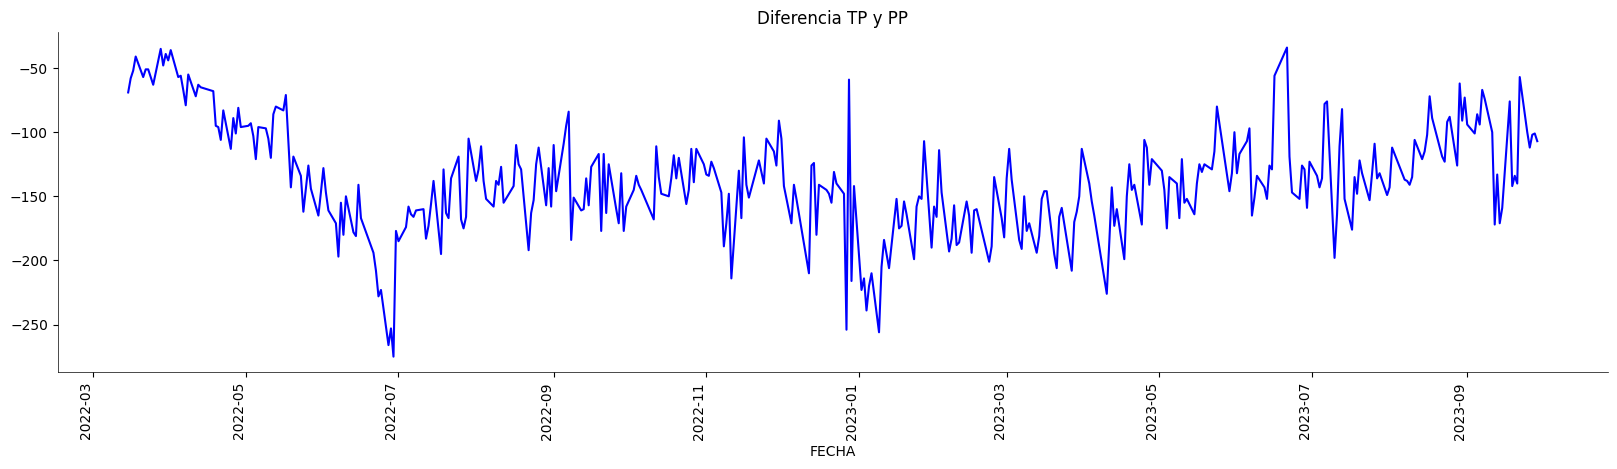

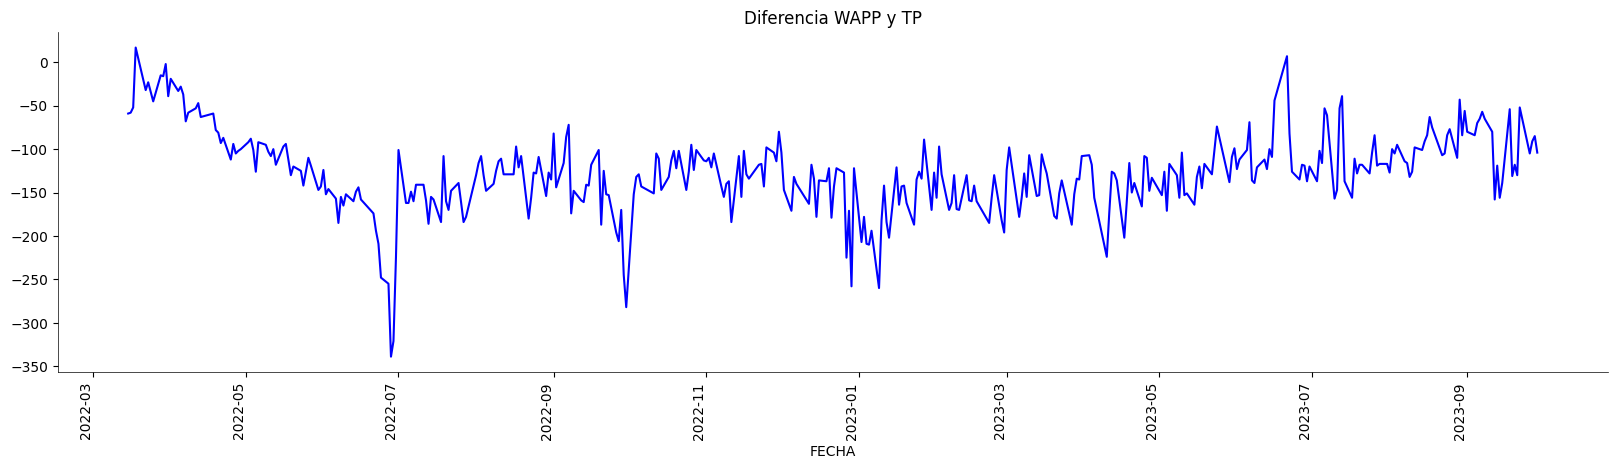

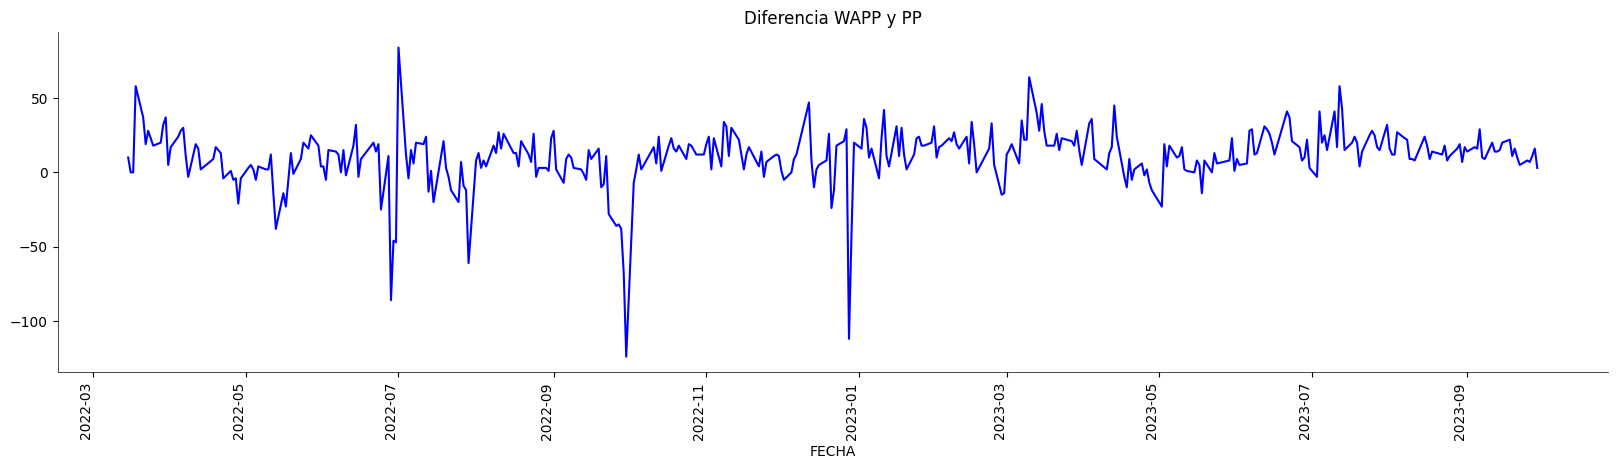

In [271]:
PP_TP = data.PP - data.TP
PP_TP.plot(figsize=(20,5), title = "Diferencia TP y PP", color="blue")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

WAPP_TP = data.WAPP - data.TP
WAPP_TP.plot(figsize=(20,5), title = "Diferencia WAPP y TP", color="blue")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

WAPP_PP = data.WAPP - data.PP
WAPP_PP.plot(figsize=(20,5), title = "Diferencia WAPP y PP", color="blue")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

##### **Grafico de las series diferenciadas:**

In [234]:
serieVAR=pd.concat([data_diff_WAPP, data_diff_TP, data_diff_TAD, data_diff_PP], axis=1)

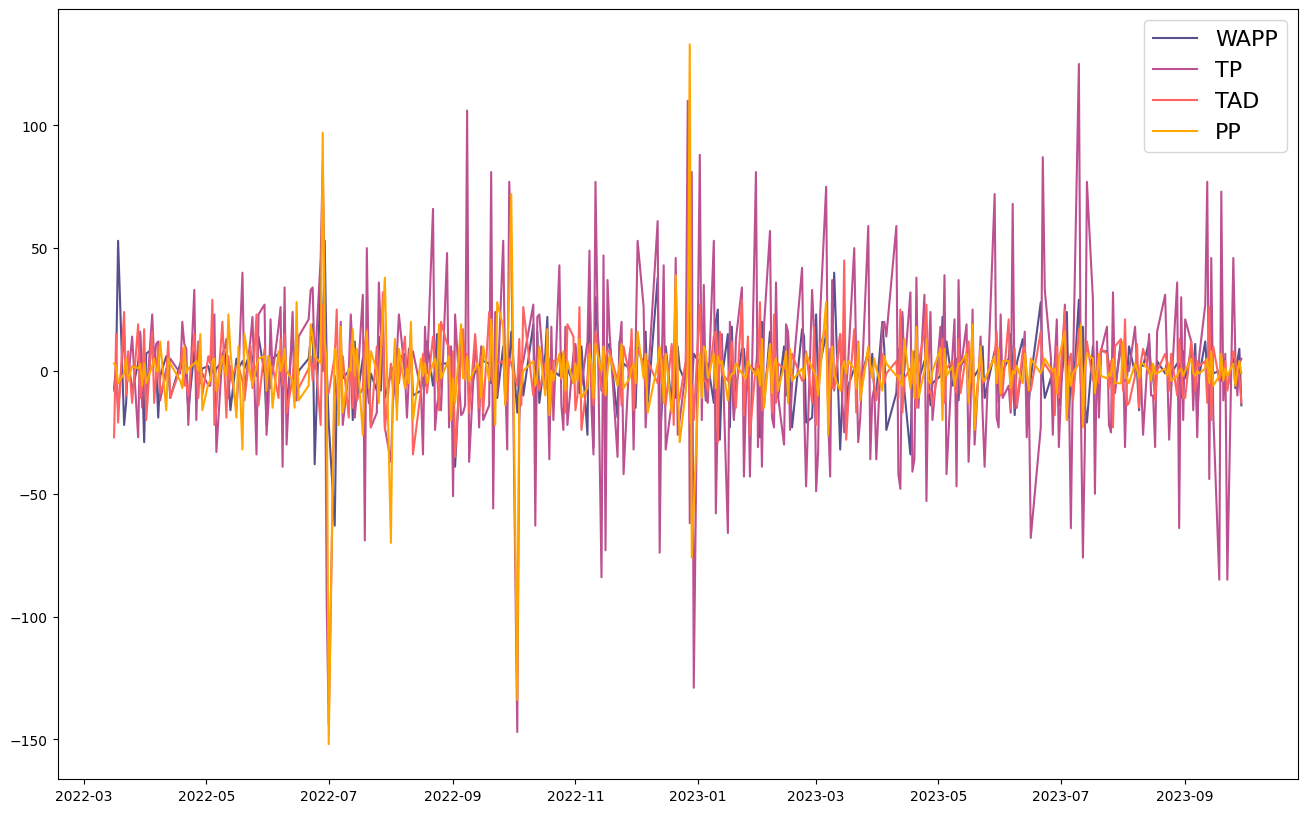

In [235]:
plt.figure(figsize=(16,10))
WAPP, = plt.plot(serieVAR ["WAPP"], color='#58508d')
TP, = plt.plot(serieVAR ['TP'], color='#bc5090')
TAD, = plt.plot(serieVAR ['TAD'], color='#ff6361')
PP, = plt.plot(serieVAR ['PP'], color='#ffa600')


#for year in range(2022, 2023):
 #   plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['WAPP','TP',"TAD", "PP"], fontsize=16)

In [236]:
serieVAR.head()

WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0

In [237]:
serieVAR.tail()

WAPP    TP   TAD   PP
FECHA                            
2023-09-25   6.0  46.0   8.0  3.0
2023-09-26  -7.0   6.0   4.0 -6.0
2023-09-27   4.0 -10.0   0.0  0.0
2023-09-28   9.0   3.0  -2.0  4.0
2023-09-29 -14.0   5.0 -13.0 -1.0

In [238]:
# Separacion Train/Test

# Variable que guarda el porcentaje de train
split = .75

# Seleccion de train
train = serieVAR.iloc[:round(len(serieVAR)*split)]

# Seleccionamos de test
test = serieVAR.iloc[round(len(serieVAR)*split):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train,"\n\n", test)

            WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0
...          ...   ...   ...  ...
2023-05-08  -6.0   7.0   4.0  2.0
2023-05-09  -5.0  21.0  -5.0 -6.0
2023-05-10   5.0 -47.0  -9.0 -1.0
2023-05-11 -12.0  37.0  13.0  3.0
2023-05-12   2.0   0.0  -9.0  3.0

[284 rows x 4 columns] 

             WAPP    TP   TAD    PP
FECHA                             
2023-05-15   6.0  19.0   8.0   7.0
2023-05-16  -5.0 -37.0  12.0 -13.0
2023-05-17  -2.0 -14.0  -5.0   1.0
2023-05-18   0.0  25.0   0.0  19.0
2023-05-19  -2.0 -30.0 -17.0 -24.0
...          ...   ...   ...   ...
2023-09-25   6.0  46.0   8.0   3.0
2023-09-26  -7.0   6.0   4.0  -6.0
2023-09-27   4.0 -10.0   0.0   0.0
2023-09-28   9.0   3.0  -2.0   4.0
2023-09-29 -14.0   5.0 -13.0  -1.0

[95 rows x 4 columns]


In [239]:
train

WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0
...          ...   ...   ...  ...
2023-05-08  -6.0   7.0   4.0  2.0
2023-05-09  -5.0  21.0  -5.0 -6.0
2023-05-10   5.0 -47.0  -9.0 -1.0
2023-05-11 -12.0  37.0  13.0  3.0
2023-05-12   2.0   0.0  -9.0  3.0

[284 rows x 4 columns]

In [240]:
test

WAPP    TP   TAD    PP
FECHA                             
2023-05-15   6.0  19.0   8.0   7.0
2023-05-16  -5.0 -37.0  12.0 -13.0
2023-05-17  -2.0 -14.0  -5.0   1.0
2023-05-18   0.0  25.0   0.0  19.0
2023-05-19  -2.0 -30.0 -17.0 -24.0
...          ...   ...   ...   ...
2023-09-25   6.0  46.0   8.0   3.0
2023-09-26  -7.0   6.0   4.0  -6.0
2023-09-27   4.0 -10.0   0.0   0.0
2023-09-28   9.0   3.0  -2.0   4.0
2023-09-29 -14.0   5.0 -13.0  -1.0

[95 rows x 4 columns]

**Criterio de Granger**

In [241]:
from statsmodels.tsa.stattools import grangercausalitytests

In [242]:
# P-valores menores al nivel de significancia (0.05) implica que la hipotesis nula (X no causa Y) puede rechazarse.
# testgr: Es el tipo de prueba que se utilizará para evaluar la causalidad de Granger. Por defecto, se utiliza 'ssr_chi2test', que es una prueba basada en chi-cuadrado,

def grangers_causation_matrix(data, variables, maxlag, testgr='ssr_chi2test', verbose=False):


    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [(test_result[i+1][0][testgr][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# se agrega '_x' al final de los nombres de las columnas para indicar que son las variables "causantes" y '_y' al final de los nombres de las filas para indicar que son las variables "afectadas".

In [243]:
testgr = 'ssr_chi2test'
grangers_causation_matrix(train, variables = train.columns, maxlag=10)

WAPP_x          TP_x     TAD_x          PP_x
WAPP_y  1.000000  1.761922e-10  0.008664  5.905575e-07
TP_y    0.148711  1.000000e+00  0.258131  8.678813e-04
TAD_y   0.161726  1.941150e-01  1.000000  5.885956e-04
PP_y    0.058835  1.264096e-07  0.035532  1.000000e+00

In [244]:
from statsmodels.tsa.api import VAR

In [245]:
model = VAR(train)

In [246]:
x = model.select_order(maxlags=36)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [247]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Nov, 2023
Time:                     19:04:09
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    23.0793
Nobs:                     280.000    HQIC:                   22.5507
Log likelihood:          -4628.74    FPE:                4.36642e+09
AIC:                      22.1966    Det(Omega_mle):     3.44931e+09
--------------------------------------------------------------------
Results for equation WAPP
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.271528         0.699706           -0.388           0.698
L1.WAPP        -0.570077         0.062158           -9.171           0.000
L1.TP           0.091347         0.026286            3.475           0.001
L1.TAD    

In [248]:
# Funcion que recibe listas con las predicciones e intervalos de confianza de las 4 series y devuelve un
# dataframe para la serie indicada por la variable indice
def serializar(predicciones_, test_, indice, futuro_, intervalos=True):

    serie = {
        "FECHA": test_.index[:futuro_],
        "serie"+str(indice): predicciones_[0][:,indice-1].tolist(),
        "serie"+str(indice)+"_inf": predicciones_[1][:,indice-1].tolist(),
        "serie"+str(indice)+"_sup": predicciones_[2][:,indice-1].tolist()}
    serie = pd.DataFrame(serie, columns=["FECHA", "serie"+str(indice),
                                         "serie"+str(indice)+"_inf", "serie"+str(indice)+"_sup"])
    serie.set_index("FECHA", inplace=True)
    if (intervalos==False):
        serie.loc[serie["serie"+str(indice)+"_inf"] < 0, "serie"+str(indice)+"_inf"] = 0
        serie.loc[serie["serie"+str(indice)+"_sup"] < 0, "serie"+str(indice)+"_sup"] = 0
    return serie

In [249]:
def graficar_pred(serie_test, serie_pred, titulo="Valores Originales vs Predicciones",
                  xlabel="Fecha", ylabel="Valor", intervalos=True):
    # serie_test:
    # serie_pred:

    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.iloc[:,0].plot(label="Predicciones")
    if (intervalos==True):
        serie_pred.iloc[:,2].plot(label="Intervalo de Confianza Superior")
        serie_pred.iloc[:,1].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.5', dashes=(5,2,1,2))

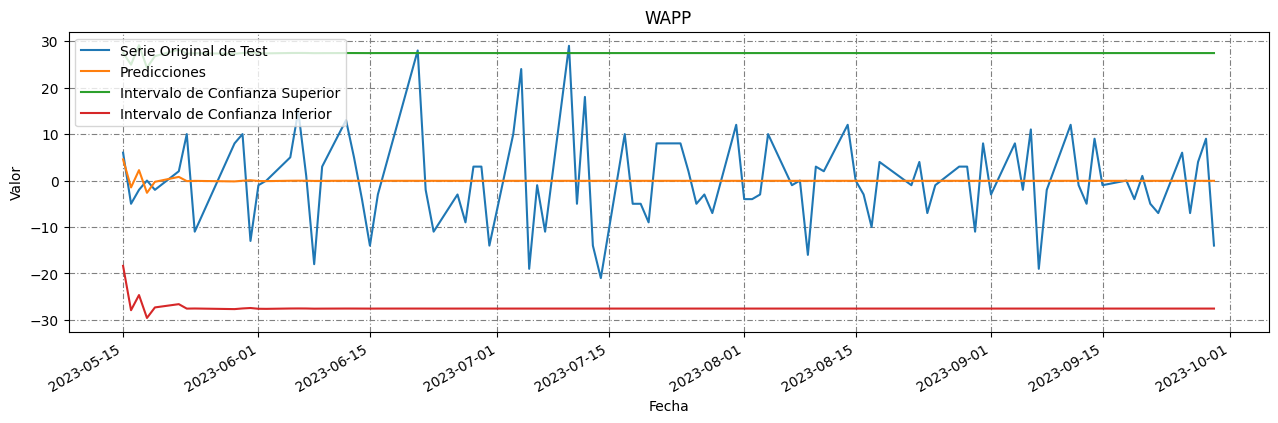

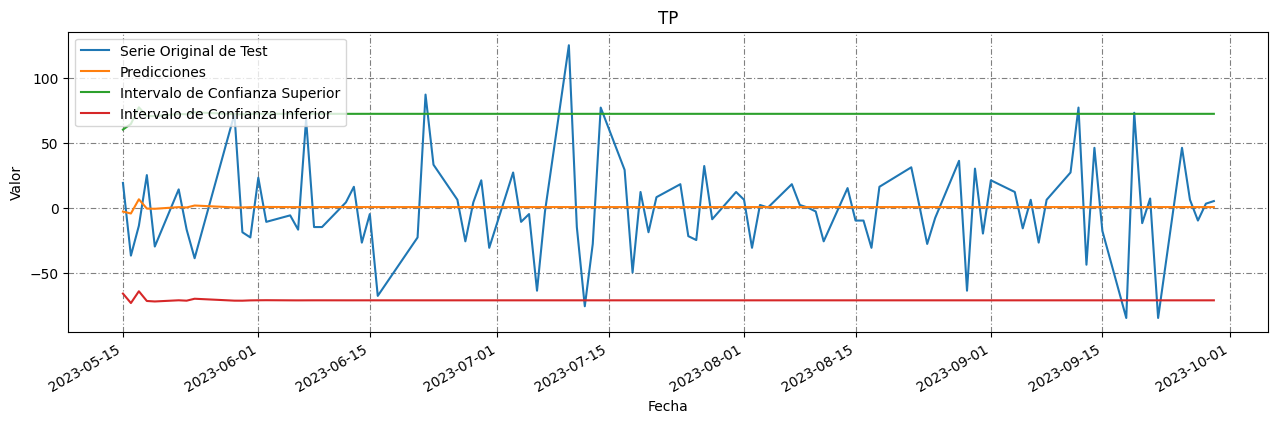

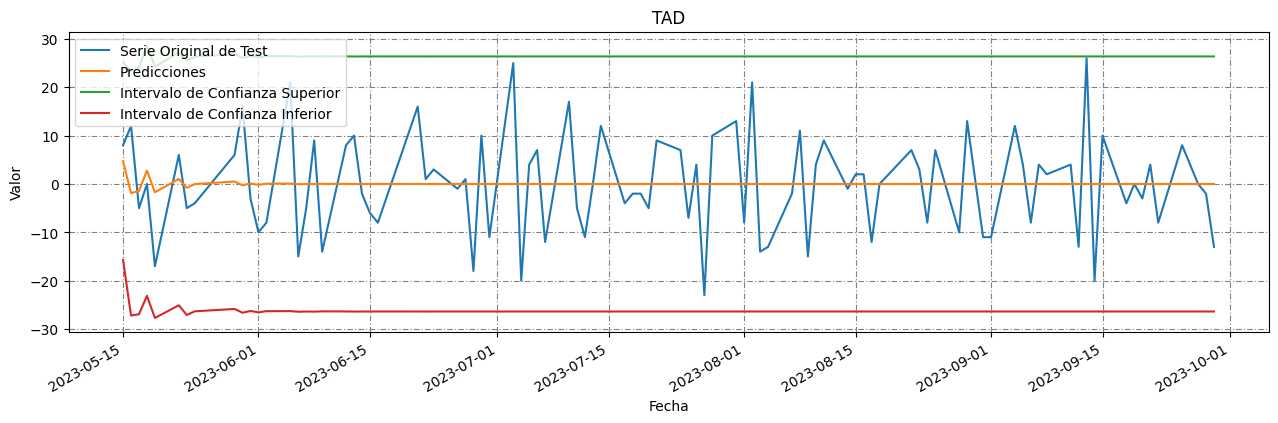

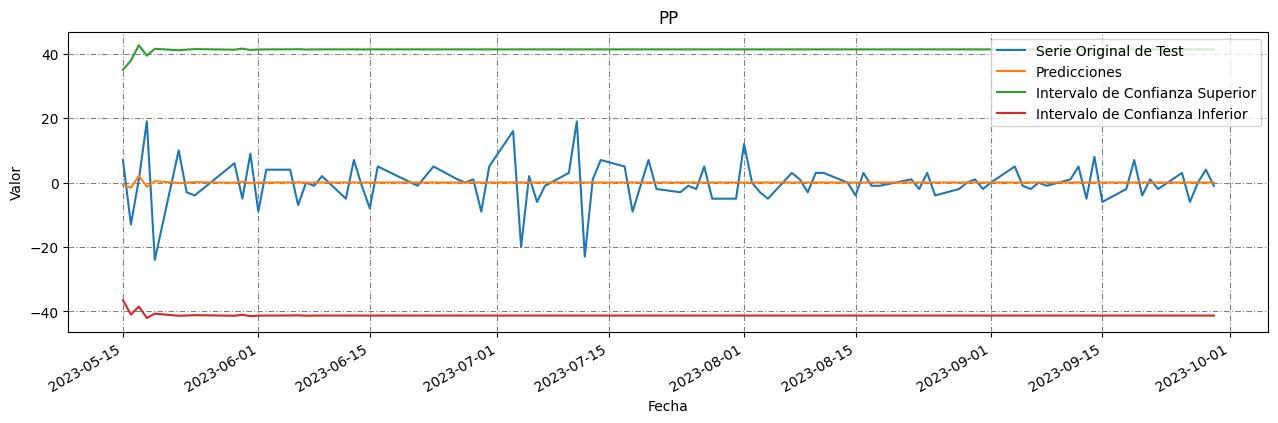

In [250]:
# Con la variable futuro se indican cuantas unidades en tiempo
# hacia adelante se quieren predecir
futuro = 95
lag_orden = 4

predicciones = model_fitted.forecast_interval(train.values[-lag_orden:], steps=futuro)

df = list()
for i in [1, 2, 3, 4]:
    df.append(serializar(predicciones, test, i, futuro))

for i, serie in enumerate(serieVAR):
    graficar_pred(test[serie][:futuro], df[i], titulo=serie)

**Análisis de Residuos**

In [251]:
def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [252]:
def test_residuos(residuos):
    # Test de Jarque Bera
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    jarquebera = jarque_bera(residuos)
    print('Jarque-Bera')
    print(f'p-valor: {jarquebera[1]}\n')

    # Test de Shapiro Wilks
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    shapir = shapiro(residuos)
    print('Shapiro')
    print(f'p-valor: {shapir[1]}\n')

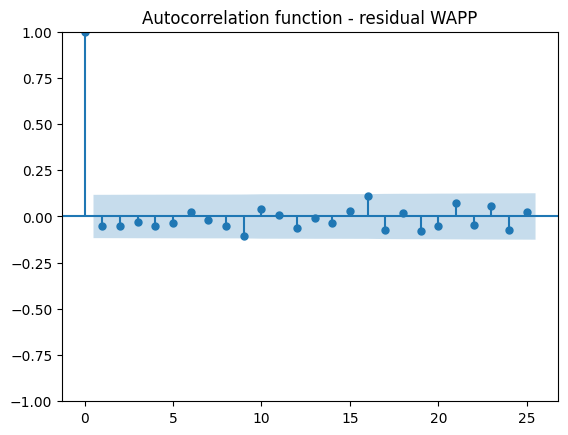

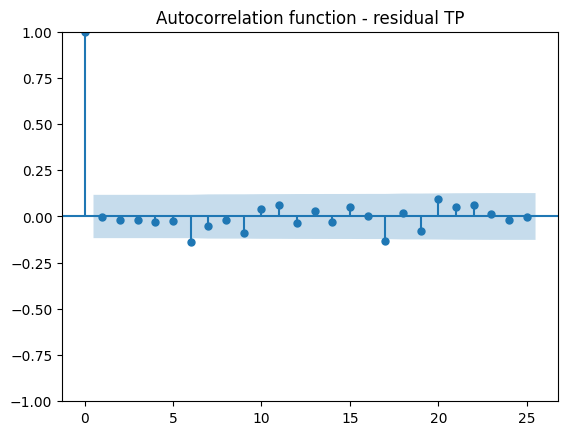

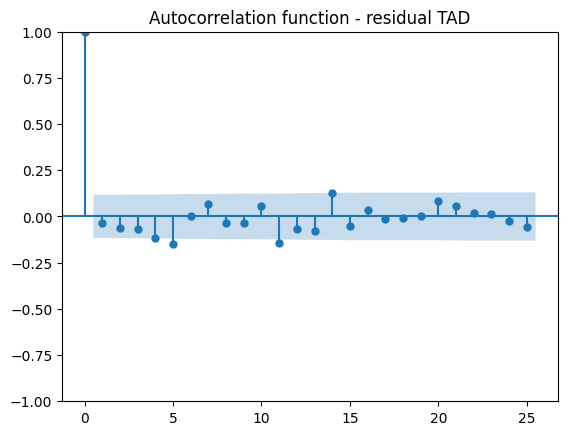

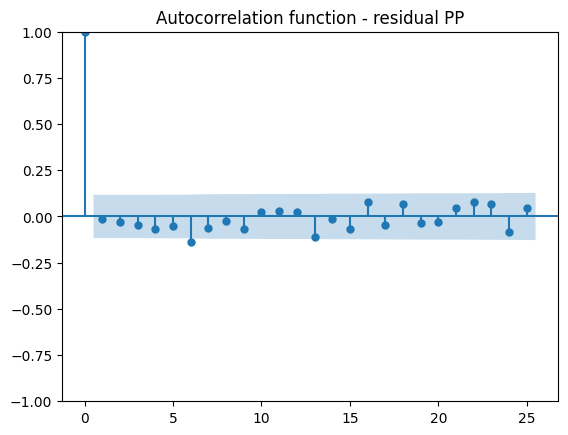

In [290]:
for quant in serieVAR.columns:
    plot_acf(results.resid[quant],title='Autocorrelation function - residual {}'.format(quant))

In [253]:
def evaluar_residuos(residuos):
    residuos.plot(title='Residuos', figsize=(12, 3))
    plt.axhline(0, linestyle='--', color='k')
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    ax[0].set_title('Residuos KDE')
    ax[1].set_title('Q-Q Plot')
    residuos.plot(kind='kde', ax=ax[0])
    probplot(residuos, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(residuos)
    acf.set_size_inches(12,3)
    plt.show()
    print('Descriptivo Residuos\n')
    print(f'{residuos.describe()}\n\n')
    print('Test sobre los Residuos\n')
    test_residuos(residuos)

In [254]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey

In [255]:
futuro

95

**WAPP**

In [310]:
print(f"Evaluacion de residuos de Serie ")
#evaluar_residuos(test[serie][:futuro]-df[0].iloc[:,0])

Evaluacion de residuos de Serie 


**TP**

In [307]:
evaluar_metricas(test[serie][:futuro], df[1].iloc[:,0])
#print(f"Evaluacion de residuos de Serie ")
#evaluar_residuos(test[serie][:futuro]-df[1].iloc[:,0])

MSE: 46.081901089758816
MAE: 4.738871993738462
RMSE: 6.7883651264320495
MAPE: inf


**TAD**

In [309]:
evaluar_metricas(test[serie][:futuro], df[2].iloc[:,0])
#print(f"Evaluacion de residuos de Serie ")
#evaluar_residuos(test[serie][:futuro]-df[2].iloc[:,0])

MSE: 43.00170058768184
MAE: 4.5179677183383244
RMSE: 6.557568191615077
MAPE: inf


**PP**

In [312]:
evaluar_metricas(test[serie][:futuro], df[3].iloc[:,0])
#print(f"Evaluacion de residuos de Serie ")
#evaluar_residuos(test[serie][:futuro]-df[3].iloc[:,0])

MSE: 46.75920041461102
MAE: 4.675215252971493
RMSE: 6.838069933439627
MAPE: inf


---
## **11. Analizar la función impulso respuesta y realizar distintas pruebas para analizar la causalidad. Justificar la elección del modelo con todo lo visto en clase. Es posible complementar con otros análisis.**

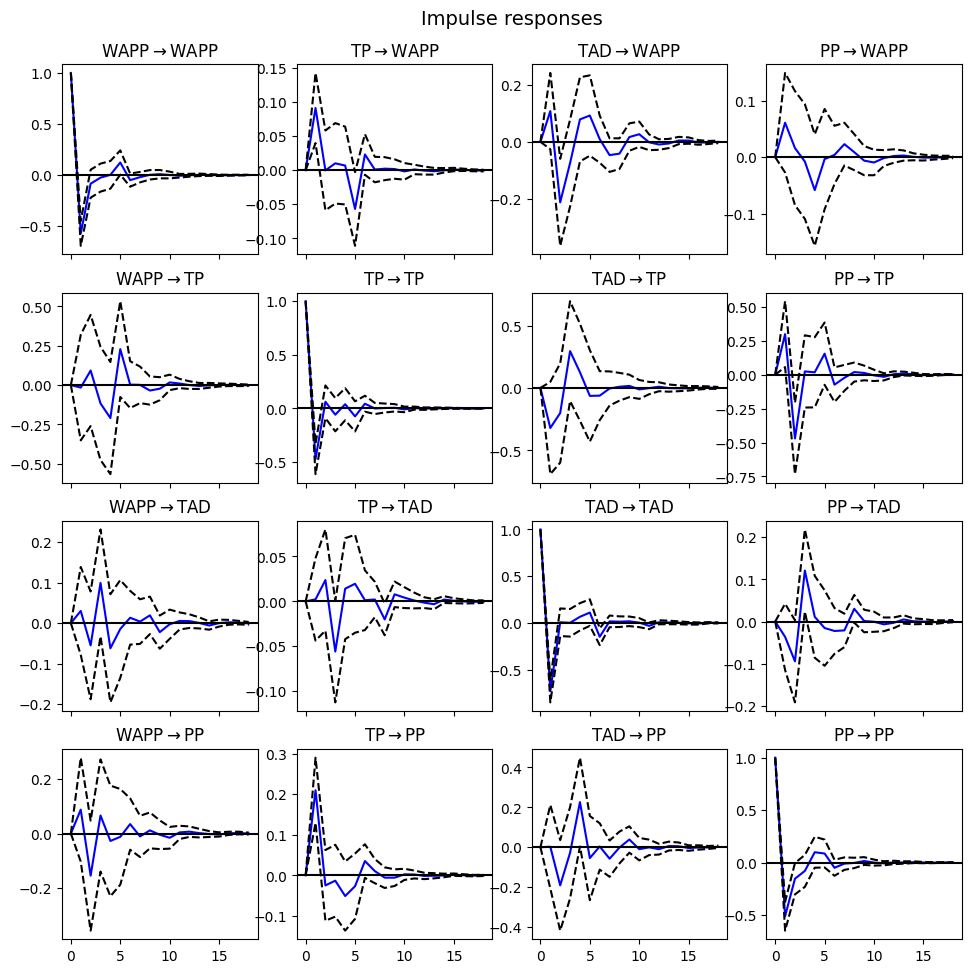

In [296]:
model_fitted.irf(18).plot();

In [297]:
fevd = model_fitted.fevd(18)

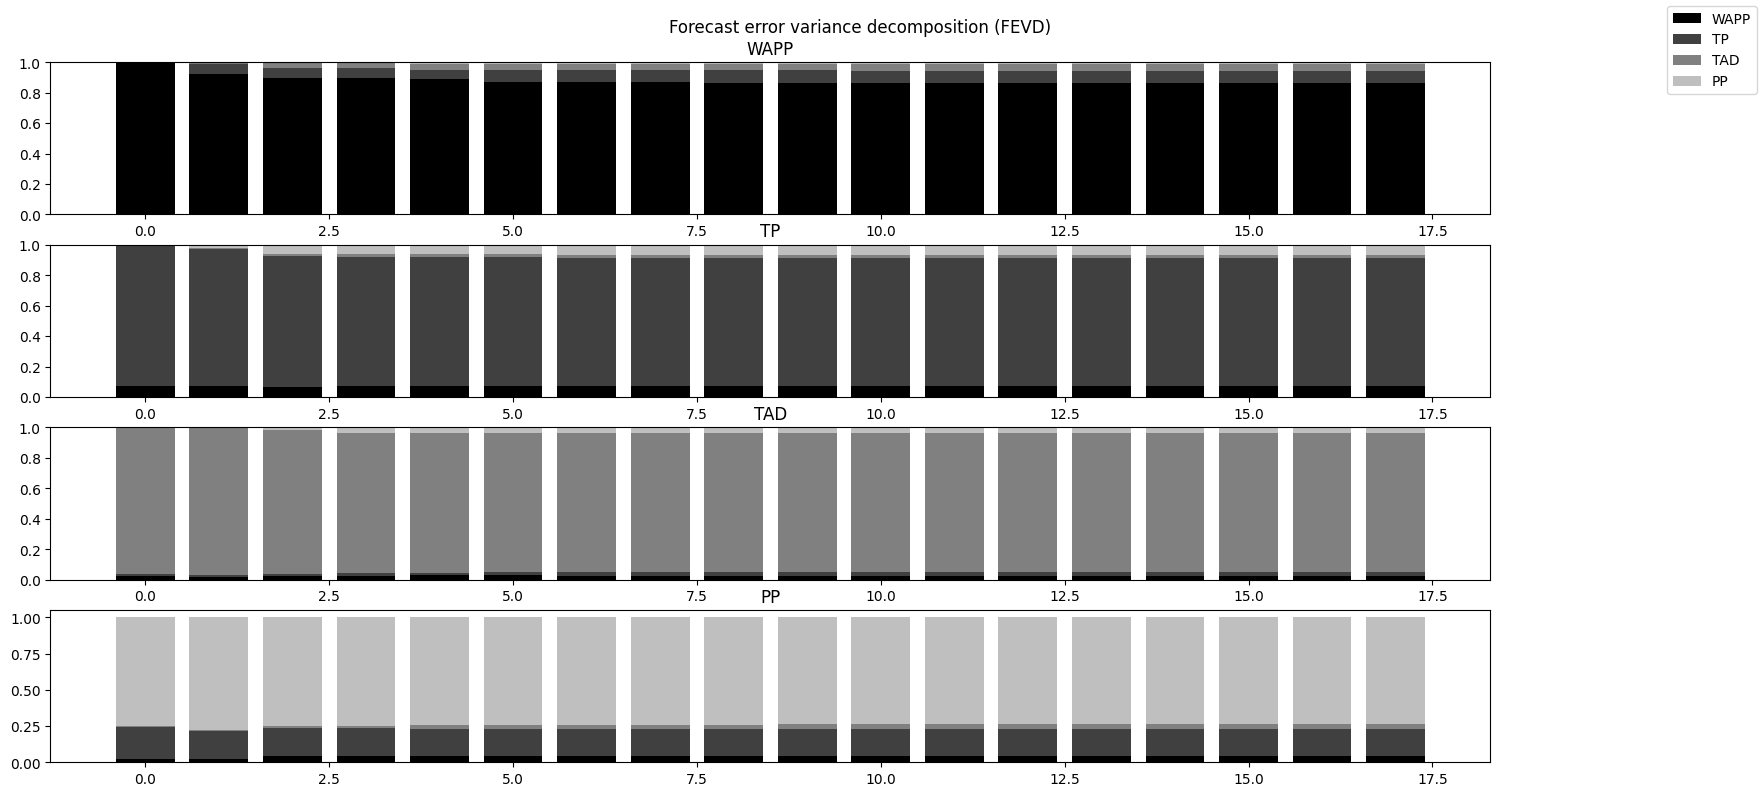

In [298]:
#Impulse response function plot (Forecast Error Vriance Decomposition - FEVD)
fevd.plot(figsize=(18,8)) 
plt.show()

In [299]:
fevd.summary()

FEVD for WAPP
          WAPP        TP       TAD        PP
0     1.000000  0.000000  0.000000  0.000000
1     0.920765  0.066574  0.007554  0.005107
2     0.898138  0.064396  0.032191  0.005275
3     0.895163  0.064277  0.035225  0.005334
4     0.888356  0.063988  0.037899  0.009757
5     0.871979  0.076977  0.041518  0.009526
6     0.869410  0.079660  0.041419  0.009512
7     0.867811  0.079641  0.042382  0.010167
8     0.866921  0.079607  0.043218  0.010254
9     0.866767  0.079587  0.043347  0.010299
10    0.866315  0.079599  0.043679  0.010407
11    0.866312  0.079599  0.043680  0.010409
12    0.866269  0.079595  0.043722  0.010414
13    0.866242  0.079597  0.043737  0.010424
14    0.866231  0.079596  0.043748  0.010424
15    0.866218  0.079599  0.043758  0.010425
16    0.866215  0.079599  0.043761  0.010426
17    0.866211  0.079600  0.043763  0.010426

FEVD for TP
          WAPP        TP       TAD        PP
0     0.072582  0.927418  0.000000  0.000000
1     0.073120  0.901755  0.

**Forecast**

In [264]:
results = model_fitted

# Get the lag order
lag_order = results.k_ar
print(lag_order)

# Input data for forecasting
forecast_input = train.values[-lag_order:]
forecast_input

4


array([[ -5.,  21.,  -5.,  -6.],
       [  5., -47.,  -9.,  -1.],
       [-12.,  37.,  13.,   3.],
       [  2.,   0.,  -9.,   3.]])

In [265]:
# Forecast
n_forecast = len(test)
fc = results.forecast(y=forecast_input, steps=n_forecast)
df_forecast = pd.DataFrame(fc, index=data.index[-n_forecast:], columns=data.columns + '_1d')
df_forecast

WAPP_1d     TP_1d    TAD_1d     PP_1d
FECHA                                             
2023-05-15  4.561958 -3.089091  4.708193 -0.759179
2023-05-16 -1.480437 -4.556735 -1.892846 -1.550075
2023-05-17  2.239030  6.379124 -1.418322  2.075182
2023-05-18 -2.637498 -0.763190  2.774604 -1.314590
2023-05-19 -0.265954 -0.933336 -1.715948  0.415726
...              ...       ...       ...       ...
2023-09-25 -0.058931  0.379065 -0.002324  0.033610
2023-09-26 -0.058931  0.379065 -0.002324  0.033610
2023-09-27 -0.058931  0.379065 -0.002324  0.033610
2023-09-28 -0.058931  0.379065 -0.002324  0.033610
2023-09-29 -0.058931  0.379065 -0.002324  0.033610

[95 rows x 4 columns]

In [266]:
# La función invert_transformation espera trabajar con la serie de train y test no diferenciadas
# Para eso copio los indices de los splits pero aplicados al dataframe sin diferenciar
train_nodiff = data[data.index.isin(train.index)]
test_nodiff = data[data.index.isin(test.index)]

In [267]:
df_results = invert_transformation(train_nodiff, df_forecast, second_diff=False)
df_results

WAPP_1d     TP_1d    TAD_1d     PP_1d  WAPP_forecast  \
FECHA                                                               
2023-05-15  4.561958 -3.089091  4.708193 -0.759179      22.561958   
2023-05-16 -1.480437 -4.556735 -1.892846 -1.550075      21.081521   
2023-05-17  2.239030  6.379124 -1.418322  2.075182      23.320550   
2023-05-18 -2.637498 -0.763190  2.774604 -1.314590      20.683052   
2023-05-19 -0.265954 -0.933336 -1.715948  0.415726      20.417099   
...              ...       ...       ...       ...            ...   
2023-09-25 -0.058931  0.379065 -0.002324  0.033610      16.051975   
2023-09-26 -0.058931  0.379065 -0.002324  0.033610      15.993043   
2023-09-27 -0.058931  0.379065 -0.002324  0.033610      15.934112   
2023-09-28 -0.058931  0.379065 -0.002324  0.033610      15.875181   
2023-09-29 -0.058931  0.379065 -0.002324  0.033610      15.816249   

            TP_forecast  TAD_forecast  PP_forecast  
FECHA                                               
2023-05-15   165.910909     37.708193    16.240821  
2023-05-16   161.354173     35.815346    14.690746  
2023-05-17   167.733297     34.397024    16.765928  
2023-05-18   166.970108     37.171627    15.451338  
2023-05-19   166.036772     35.455679    15.867064  
...                 ...           ...          ...  
2023-09-25   198.983862     35.752136    18.667785  
2023-09-26   199.362927     35.749811    18.701395  
2023-09-27   199.741992     35.747487    18.735006  
2023-09-28   200.121057     35.745163    18.768616  
2023-09-29   200.500123     35.742839    18.802227  

[95 rows x 8 columns]

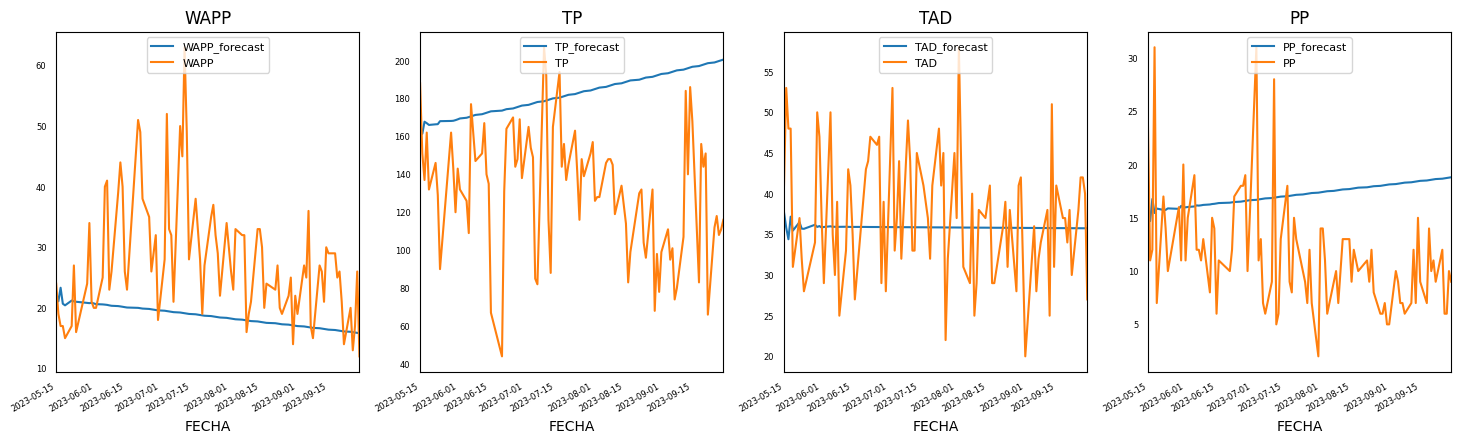

In [268]:
fig, axes = plt.subplots(nrows=1, ncols=4, dpi=100, figsize=(18,5))
for i, (col,ax) in enumerate(zip(data.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test_nodiff[col][-n_forecast:].plot(legend=True, ax=ax)
    ax.set_title(col)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.tick_params(labelsize=6, direction= 'out')
    ax.legend(fontsize="8",loc='upper center')
plt.show();

**Evaluar los pronósticos**

In [269]:
rmse_WAPP = math.sqrt(mean_squared_error(df_results['WAPP_forecast'],test['WAPP']))
print('Mean value of WAPP is : {}. Root Mean Squared Error is :{}'.format(mean(test_nodiff['WAPP']),rmse_WAPP))

rmse_TP = math.sqrt(mean_squared_error(df_results['TP_forecast'],test['TP']))
print('Mean value of TP is : {}. Root Mean Squared Error is :{}'.format(mean(test_nodiff['TP']),rmse_TP))

rmse_TAD = math.sqrt(mean_squared_error(df_results['TAD_forecast'],test['TAD']))
print('Mean value of TAD is : {}. Root Mean Squared Error is :{}'.format(mean(test_nodiff['TAD']),rmse_TAD))

rmse_PP = math.sqrt(mean_squared_error(df_results['PP_forecast'],test['PP']))
print('Mean value of PP is : {}. Root Mean Squared Error is :{}'.format(mean(test_nodiff['PP']),rmse_PP))

Mean value of WAPP is : 27.68421052631579. Root Mean Squared Error is :20.997220738989682
Mean value of TP is : 131.66315789473686. Root Mean Squared Error is :186.95260478139153
Mean value of TAD is : 37.33684210526316. Root Mean Squared Error is :37.36406258776455
Mean value of PP is : 11.357894736842105. Root Mean Squared Error is :18.61147785212784


---
## **12. En caso de presentar estacionalidad alguna de las series elegidas, se solicita determinar la representación más adecuada mediante algún modelo SARIMA y comparar los resultados con los modelos determinados en el trabajo anterior. (Opcional) Realizar la prueba de hipótesis de HEGY para testear la conjetura de raíz unitaria sobre las series elegidas.**

In [270]:
# Las series no presentan estacionalidad